### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

import pandas as pd 



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [3]:
#  Import and read the charity_data.csv. 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [5]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], 1)
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


C:\Users\hallt\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [6]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [7]:
application_df = application_df.drop(["STATUS", "SPECIAL_CONSIDERATIONS"], 1)
application_df.info()

C:\Users\hallt\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   APPLICATION_TYPE  34299 non-null  object
 1   AFFILIATION       34299 non-null  object
 2   CLASSIFICATION    34299 non-null  object
 3   USE_CASE          34299 non-null  object
 4   ORGANIZATION      34299 non-null  object
 5   INCOME_AMT        34299 non-null  object
 6   ASK_AMT           34299 non-null  int64 
 7   IS_SUCCESSFUL     34299 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 2.1+ MB


In [8]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df["APPLICATION_TYPE"].value_counts()       
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

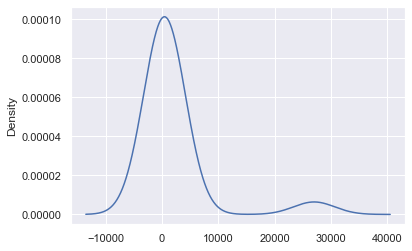

In [9]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [10]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df["APPLICATION_TYPE"] = application_df["APPLICATION_TYPE"].replace(app,"Other")
    
# Check to make sure binning was successful
application_df["APPLICATION_TYPE"].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df["CLASSIFICATION"].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

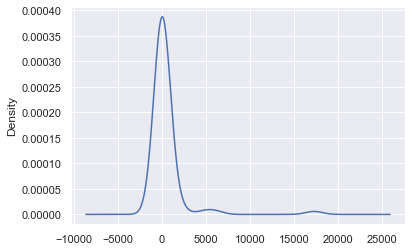

In [12]:
# # Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [13]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df["CLASSIFICATION"] = application_df["CLASSIFICATION"].replace(app,"Other")
    
# Check to make sure binning was successful
application_df["CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [14]:
application_df.nunique()

APPLICATION_TYPE       9
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [15]:
# Generate our categorical variable list
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [16]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)
# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\hallt\anaconda3\envs\pythondata\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Merge one-hot encoded features and drop the orginials
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\hallt\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [18]:
application_df.shape

(34299, 106)

In [19]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop(["IS_SUCCESSFUL"], 1).values

y = application_df["IS_SUCCESSFUL"].values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_tests = train_test_split(X, y, random_state=78)

C:\Users\hallt\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [20]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
# Split the preprocessed data into a training and testing dataset using train_test_split

X_train, X_test, y_train, y_tests = train_test_split(X, y, random_state=78)
X_train[:1]

array([[5.e+03, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e+00,
        0.e+00, 0.e+00, 1.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00, 0.e+00, 1.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e+00,
        1.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00]])

### Deliverable 2: Compile, Train and Evaluate the Model

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                8480      
                                                                 
 dense_1 (Dense)             (None, 50)                4050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 12,581
Trainable params: 12,581
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [24]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq= 5)

In [30]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks =[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 22s - loss: 0.6862 - accuracy: 0.5625
Epoch 1: saving model to checkpoints\weights.01.hdf5
  5/804 [..............................] - ETA: 16s - loss: 0.6925 - accuracy: 0.5250
Epoch 1: saving model to checkpoints\weights.01.hdf5
 13/804 [..............................] - ETA: 9s - loss: 0.6924 - accuracy: 0.5264 
Epoch 1: saving model to checkpoints\weights.01.hdf5
 15/804 [..............................] - ETA: 12s - loss: 0.6904 - accuracy: 0.5375
Epoch 1: saving model to checkpoints\weights.01.hdf5
 20/804 [..............................] - ETA: 13s - loss: 0.6913 - accuracy: 0.5328
Epoch 1: saving model to checkpoints\weights.01.hdf5
 27/804 [>.............................] - ETA: 10s - loss: 0.6919 - accuracy: 0.5289
Epoch 1: saving model to checkpoints\weights.01.hdf5
 30/804 [>.............................] - ETA: 12s - loss: 0.6914 - accuracy: 0.5323
Epoch 1: saving model to checkpoints\weights.01.hdf5
 35/804 [>.....

295/804 [==========>...................] - ETA: 8s - loss: 0.6913 - accuracy: 0.5319
Epoch 1: saving model to checkpoints\weights.01.hdf5
300/804 [==========>...................] - ETA: 8s - loss: 0.6912 - accuracy: 0.5326
Epoch 1: saving model to checkpoints\weights.01.hdf5
305/804 [==========>...................] - ETA: 8s - loss: 0.6912 - accuracy: 0.5327
Epoch 1: saving model to checkpoints\weights.01.hdf5
310/804 [==========>...................] - ETA: 8s - loss: 0.6913 - accuracy: 0.5320
Epoch 1: saving model to checkpoints\weights.01.hdf5
319/804 [==========>...................] - ETA: 8s - loss: 0.6913 - accuracy: 0.5319
Epoch 1: saving model to checkpoints\weights.01.hdf5
320/804 [==========>...................] - ETA: 8s - loss: 0.6913 - accuracy: 0.5322
Epoch 1: saving model to checkpoints\weights.01.hdf5
325/804 [===========>..................] - ETA: 8s - loss: 0.6911 - accuracy: 0.5332
Epoch 1: saving model to checkpoints\weights.01.hdf5
330/804 [===========>.............

594/804 [=====================>........] - ETA: 3s - loss: 0.6915 - accuracy: 0.5303
Epoch 1: saving model to checkpoints\weights.01.hdf5
595/804 [=====================>........] - ETA: 3s - loss: 0.6915 - accuracy: 0.5303
Epoch 1: saving model to checkpoints\weights.01.hdf5
600/804 [=====================>........] - ETA: 3s - loss: 0.6915 - accuracy: 0.5302
Epoch 1: saving model to checkpoints\weights.01.hdf5
605/804 [=====================>........] - ETA: 3s - loss: 0.6916 - accuracy: 0.5298
Epoch 1: saving model to checkpoints\weights.01.hdf5
610/804 [=====================>........] - ETA: 3s - loss: 0.6916 - accuracy: 0.5299
Epoch 1: saving model to checkpoints\weights.01.hdf5
618/804 [======================>.......] - ETA: 3s - loss: 0.6915 - accuracy: 0.5302
Epoch 1: saving model to checkpoints\weights.01.hdf5
620/804 [======================>.......] - ETA: 3s - loss: 0.6915 - accuracy: 0.5306
Epoch 1: saving model to checkpoints\weights.01.hdf5
625/804 [======================>..

 81/804 [==>...........................] - ETA: 11s - loss: 0.6918 - accuracy: 0.5312
Epoch 2: saving model to checkpoints\weights.02.hdf5
 86/804 [==>...........................] - ETA: 11s - loss: 0.6923 - accuracy: 0.5276
Epoch 2: saving model to checkpoints\weights.02.hdf5
 91/804 [==>...........................] - ETA: 11s - loss: 0.6922 - accuracy: 0.5282
Epoch 2: saving model to checkpoints\weights.02.hdf5
 96/804 [==>...........................] - ETA: 11s - loss: 0.6920 - accuracy: 0.5293
Epoch 2: saving model to checkpoints\weights.02.hdf5
101/804 [==>...........................] - ETA: 11s - loss: 0.6919 - accuracy: 0.5303
Epoch 2: saving model to checkpoints\weights.02.hdf5
107/804 [==>...........................] - ETA: 10s - loss: 0.6917 - accuracy: 0.5315
Epoch 2: saving model to checkpoints\weights.02.hdf5
111/804 [===>..........................] - ETA: 11s - loss: 0.6915 - accuracy: 0.5335
Epoch 2: saving model to checkpoints\weights.02.hdf5
116/804 [===>..............

376/804 [=============>................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5279
Epoch 2: saving model to checkpoints\weights.02.hdf5
381/804 [=============>................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5278
Epoch 2: saving model to checkpoints\weights.02.hdf5
386/804 [=============>................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5278
Epoch 2: saving model to checkpoints\weights.02.hdf5
391/804 [=============>................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5277
Epoch 2: saving model to checkpoints\weights.02.hdf5
396/804 [=============>................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5271
Epoch 2: saving model to checkpoints\weights.02.hdf5
401/804 [=============>................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5263
Epoch 2: saving model to checkpoints\weights.02.hdf5
406/804 [==============>...............] - ETA: 6s - loss: 0.6920 - accuracy: 0.5266
Epoch 2: saving model to checkpoints\weights.02.hdf5
411/804 [==============>..........

671/804 [========================>.....] - ETA: 2s - loss: 0.6915 - accuracy: 0.5304
Epoch 2: saving model to checkpoints\weights.02.hdf5
676/804 [========================>.....] - ETA: 2s - loss: 0.6914 - accuracy: 0.5307
Epoch 2: saving model to checkpoints\weights.02.hdf5
681/804 [========================>.....] - ETA: 2s - loss: 0.6914 - accuracy: 0.5308
Epoch 2: saving model to checkpoints\weights.02.hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5305
Epoch 2: saving model to checkpoints\weights.02.hdf5
691/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5308
Epoch 2: saving model to checkpoints\weights.02.hdf5
696/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5311
Epoch 2: saving model to checkpoints\weights.02.hdf5
701/804 [=========================>....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5311
Epoch 2: saving model to checkpoints\weights.02.hdf5
706/804 [=========================

157/804 [====>.........................] - ETA: 11s - loss: 0.6919 - accuracy: 0.5287
Epoch 3: saving model to checkpoints\weights.03.hdf5
162/804 [=====>........................] - ETA: 11s - loss: 0.6919 - accuracy: 0.5278
Epoch 3: saving model to checkpoints\weights.03.hdf5
167/804 [=====>........................] - ETA: 11s - loss: 0.6917 - accuracy: 0.5307
Epoch 3: saving model to checkpoints\weights.03.hdf5
172/804 [=====>........................] - ETA: 11s - loss: 0.6914 - accuracy: 0.5325
Epoch 3: saving model to checkpoints\weights.03.hdf5
177/804 [=====>........................] - ETA: 11s - loss: 0.6915 - accuracy: 0.5316
Epoch 3: saving model to checkpoints\weights.03.hdf5
182/804 [=====>........................] - ETA: 10s - loss: 0.6916 - accuracy: 0.5312
Epoch 3: saving model to checkpoints\weights.03.hdf5
187/804 [=====>........................] - ETA: 10s - loss: 0.6915 - accuracy: 0.5321
Epoch 3: saving model to checkpoints\weights.03.hdf5
194/804 [======>...........

452/804 [===============>..............] - ETA: 6s - loss: 0.6914 - accuracy: 0.5321
Epoch 3: saving model to checkpoints\weights.03.hdf5
457/804 [================>.............] - ETA: 6s - loss: 0.6914 - accuracy: 0.5324
Epoch 3: saving model to checkpoints\weights.03.hdf5
462/804 [================>.............] - ETA: 5s - loss: 0.6913 - accuracy: 0.5329
Epoch 3: saving model to checkpoints\weights.03.hdf5
467/804 [================>.............] - ETA: 5s - loss: 0.6914 - accuracy: 0.5322
Epoch 3: saving model to checkpoints\weights.03.hdf5
472/804 [================>.............] - ETA: 5s - loss: 0.6914 - accuracy: 0.5324
Epoch 3: saving model to checkpoints\weights.03.hdf5
477/804 [================>.............] - ETA: 5s - loss: 0.6914 - accuracy: 0.5322
Epoch 3: saving model to checkpoints\weights.03.hdf5
482/804 [================>.............] - ETA: 5s - loss: 0.6914 - accuracy: 0.5325
Epoch 3: saving model to checkpoints\weights.03.hdf5
487/804 [=================>.......

747/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5317
Epoch 3: saving model to checkpoints\weights.03.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5313
Epoch 3: saving model to checkpoints\weights.03.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5315
Epoch 3: saving model to checkpoints\weights.03.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5312
Epoch 3: saving model to checkpoints\weights.03.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5317
Epoch 3: saving model to checkpoints\weights.03.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5314
Epoch 3: saving model to checkpoints\weights.03.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5317
Epoch 3: saving model to checkpoints\weights.03.hdf5
782/804 [=========================

233/804 [=======>......................] - ETA: 9s - loss: 0.6920 - accuracy: 0.5283
Epoch 4: saving model to checkpoints\weights.04.hdf5
238/804 [=======>......................] - ETA: 9s - loss: 0.6919 - accuracy: 0.5288
Epoch 4: saving model to checkpoints\weights.04.hdf5
247/804 [========>.....................] - ETA: 8s - loss: 0.6921 - accuracy: 0.5271
Epoch 4: saving model to checkpoints\weights.04.hdf5
248/804 [========>.....................] - ETA: 9s - loss: 0.6921 - accuracy: 0.5275
Epoch 4: saving model to checkpoints\weights.04.hdf5
253/804 [========>.....................] - ETA: 8s - loss: 0.6921 - accuracy: 0.5272
Epoch 4: saving model to checkpoints\weights.04.hdf5
258/804 [========>.....................] - ETA: 8s - loss: 0.6921 - accuracy: 0.5265
Epoch 4: saving model to checkpoints\weights.04.hdf5
263/804 [========>.....................] - ETA: 8s - loss: 0.6921 - accuracy: 0.5270
Epoch 4: saving model to checkpoints\weights.04.hdf5
268/804 [=========>...............

528/804 [==================>...........] - ETA: 4s - loss: 0.6916 - accuracy: 0.5311
Epoch 4: saving model to checkpoints\weights.04.hdf5
533/804 [==================>...........] - ETA: 4s - loss: 0.6916 - accuracy: 0.5310
Epoch 4: saving model to checkpoints\weights.04.hdf5
538/804 [===================>..........] - ETA: 4s - loss: 0.6917 - accuracy: 0.5304
Epoch 4: saving model to checkpoints\weights.04.hdf5
543/804 [===================>..........] - ETA: 4s - loss: 0.6917 - accuracy: 0.5305
Epoch 4: saving model to checkpoints\weights.04.hdf5
548/804 [===================>..........] - ETA: 4s - loss: 0.6917 - accuracy: 0.5305
Epoch 4: saving model to checkpoints\weights.04.hdf5
553/804 [===================>..........] - ETA: 4s - loss: 0.6917 - accuracy: 0.5309
Epoch 4: saving model to checkpoints\weights.04.hdf5
559/804 [===================>..........] - ETA: 3s - loss: 0.6917 - accuracy: 0.5306
Epoch 4: saving model to checkpoints\weights.04.hdf5
563/804 [====================>....

 14/804 [..............................] - ETA: 13s - loss: 0.6912 - accuracy: 0.5402
Epoch 5: saving model to checkpoints\weights.05.hdf5
 19/804 [..............................] - ETA: 13s - loss: 0.6920 - accuracy: 0.5296
Epoch 5: saving model to checkpoints\weights.05.hdf5
 24/804 [..............................] - ETA: 13s - loss: 0.6909 - accuracy: 0.5404
Epoch 5: saving model to checkpoints\weights.05.hdf5
 29/804 [>.............................] - ETA: 12s - loss: 0.6907 - accuracy: 0.5409
Epoch 5: saving model to checkpoints\weights.05.hdf5
 34/804 [>.............................] - ETA: 13s - loss: 0.6909 - accuracy: 0.5386
Epoch 5: saving model to checkpoints\weights.05.hdf5
 39/804 [>.............................] - ETA: 12s - loss: 0.6918 - accuracy: 0.5312
Epoch 5: saving model to checkpoints\weights.05.hdf5
 44/804 [>.............................] - ETA: 12s - loss: 0.6915 - accuracy: 0.5327
Epoch 5: saving model to checkpoints\weights.05.hdf5
 49/804 [>.................

314/804 [==========>...................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5324
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
324/804 [===========>..................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5328
Epoch 5: saving model to checkpoints\weights.05.hdf5
329/804 [===========>..................] - ETA: 7s - loss: 0.6911 - accuracy: 0.5337
Epoch 5: saving model to checkpoints\weights.05.hdf5
335/804 [===========>..................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5331
Epoch 5: saving model to checkpoints\weights.05.hdf5
339/804 [===========>..................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5327
Epoch 5: saving model to checkpoints\weights.05.hdf5
344/804 [===========>..................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5325
Epoch 5: saving model to checkpoints\weights.05.hdf5
349/804 [============>.................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5328
Epoch 5: saving model to checkpoi

614/804 [=====================>........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5306
Epoch 5: saving model to checkpoints\weights.05.hdf5
619/804 [======================>.......] - ETA: 2s - loss: 0.6916 - accuracy: 0.5306
Epoch 5: saving model to checkpoints\weights.05.hdf5
627/804 [======================>.......] - ETA: 2s - loss: 0.6916 - accuracy: 0.5306
Epoch 5: saving model to checkpoints\weights.05.hdf5
629/804 [======================>.......] - ETA: 2s - loss: 0.6916 - accuracy: 0.5308
Epoch 5: saving model to checkpoints\weights.05.hdf5
634/804 [======================>.......] - ETA: 2s - loss: 0.6916 - accuracy: 0.5306
Epoch 5: saving model to checkpoints\weights.05.hdf5
639/804 [======================>.......] - ETA: 2s - loss: 0.6916 - accuracy: 0.5306
Epoch 5: saving model to checkpoints\weights.05.hdf5
644/804 [=======================>......] - ETA: 2s - loss: 0.6916 - accuracy: 0.5308
Epoch 5: saving model to checkpoints\weights.05.hdf5
652/804 [=======================>.

100/804 [==>...........................] - ETA: 11s - loss: 0.6920 - accuracy: 0.5278
Epoch 6: saving model to checkpoints\weights.06.hdf5
105/804 [==>...........................] - ETA: 11s - loss: 0.6922 - accuracy: 0.5253
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
115/804 [===>..........................] - ETA: 10s - loss: 0.6920 - accuracy: 0.5272
Epoch 6: saving model to checkpoints\weights.06.hdf5
120/804 [===>..........................] - ETA: 10s - loss: 0.6919 - accuracy: 0.5284
Epoch 6: saving model to checkpoints\weights.06.hdf5
125/804 [===>..........................] - ETA: 10s - loss: 0.6920 - accuracy: 0.5275
Epoch 6: saving model to checkpoints\weights.06.hdf5
130/804 [===>..........................] - ETA: 10s - loss: 0.6923 - accuracy: 0.5238
Epoch 6: saving model to checkpoints\weights.06.hdf5
135/804 [====>.........................] - ETA: 10s - loss: 0.6923 - accuracy: 0.5236
Epoch 6: saving model to c

400/804 [=============>................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5295
Epoch 6: saving model to checkpoints\weights.06.hdf5
405/804 [==============>...............] - ETA: 6s - loss: 0.6915 - accuracy: 0.5304
Epoch 6: saving model to checkpoints\weights.06.hdf5
410/804 [==============>...............] - ETA: 6s - loss: 0.6914 - accuracy: 0.5306
Epoch 6: saving model to checkpoints\weights.06.hdf5
415/804 [==============>...............] - ETA: 6s - loss: 0.6916 - accuracy: 0.5300
Epoch 6: saving model to checkpoints\weights.06.hdf5
420/804 [==============>...............] - ETA: 5s - loss: 0.6916 - accuracy: 0.5299
Epoch 6: saving model to checkpoints\weights.06.hdf5
425/804 [==============>...............] - ETA: 5s - loss: 0.6917 - accuracy: 0.5294
Epoch 6: saving model to checkpoints\weights.06.hdf5
430/804 [===============>..............] - ETA: 5s - loss: 0.6917 - accuracy: 0.5289
Epoch 6: saving model to checkpoints\weights.06.hdf5
439/804 [===============>.........

700/804 [=========================>....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5307
Epoch 6: saving model to checkpoints\weights.06.hdf5
705/804 [=========================>....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5311
Epoch 6: saving model to checkpoints\weights.06.hdf5
711/804 [=========================>....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5313
Epoch 6: saving model to checkpoints\weights.06.hdf5
715/804 [=========================>....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5312
Epoch 6: saving model to checkpoints\weights.06.hdf5
720/804 [=========================>....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5312
Epoch 6: saving model to checkpoints\weights.06.hdf5
725/804 [==========================>...] - ETA: 1s - loss: 0.6915 - accuracy: 0.5310
Epoch 6: saving model to checkpoints\weights.06.hdf5
730/804 [==========================>...] - ETA: 1s - loss: 0.6915 - accuracy: 0.5310
Epoch 6: saving model to checkpoints\weights.06.hdf5
735/804 [=========================

191/804 [======>.......................] - ETA: 11s - loss: 0.6916 - accuracy: 0.5317
Epoch 7: saving model to checkpoints\weights.07.hdf5
196/804 [======>.......................] - ETA: 11s - loss: 0.6919 - accuracy: 0.5289
Epoch 7: saving model to checkpoints\weights.07.hdf5
201/804 [======>.......................] - ETA: 11s - loss: 0.6919 - accuracy: 0.5285
Epoch 7: saving model to checkpoints\weights.07.hdf5
206/804 [======>.......................] - ETA: 11s - loss: 0.6918 - accuracy: 0.5306
Epoch 7: saving model to checkpoints\weights.07.hdf5
211/804 [======>.......................] - ETA: 11s - loss: 0.6919 - accuracy: 0.5298
Epoch 7: saving model to checkpoints\weights.07.hdf5
216/804 [=======>......................] - ETA: 11s - loss: 0.6918 - accuracy: 0.5305
Epoch 7: saving model to checkpoints\weights.07.hdf5
221/804 [=======>......................] - ETA: 11s - loss: 0.6918 - accuracy: 0.5303
Epoch 7: saving model to checkpoints\weights.07.hdf5
226/804 [=======>..........

486/804 [=================>............] - ETA: 6s - loss: 0.6915 - accuracy: 0.5327
Epoch 7: saving model to checkpoints\weights.07.hdf5
491/804 [=================>............] - ETA: 6s - loss: 0.6915 - accuracy: 0.5324
Epoch 7: saving model to checkpoints\weights.07.hdf5
496/804 [=================>............] - ETA: 5s - loss: 0.6914 - accuracy: 0.5328
Epoch 7: saving model to checkpoints\weights.07.hdf5
501/804 [=================>............] - ETA: 5s - loss: 0.6915 - accuracy: 0.5324
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
511/804 [==================>...........] - ETA: 5s - loss: 0.6914 - accuracy: 0.5328
Epoch 7: saving model to checkpoints\weights.07.hdf5
516/804 [==================>...........] - ETA: 5s - loss: 0.6915 - accuracy: 0.5323
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
526/804 [==================>...........] - ETA: 5s - loss: 0.691

791/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5322
Epoch 7: saving model to checkpoints\weights.07.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5321
Epoch 7: saving model to checkpoints\weights.07.hdf5
804/804 [==============================] - 14s 18ms/step - loss: 0.6914 - accuracy: 0.5321
Epoch 8/100
  1/804 [..............................] - ETA: 7s - loss: 0.6747 - accuracy: 0.6250
Epoch 8: saving model to checkpoints\weights.08.hdf5
  2/804 [..............................] - ETA: 59s - loss: 0.6887 - accuracy: 0.5469
Epoch 8: saving model to checkpoints\weights.08.hdf5
  8/804 [..............................] - ETA: 15s - loss: 0.6883 - accuracy: 0.5508
Epoch 8: saving model to checkpoints\weights.08.hdf5
 12/804 [..............................] - ETA: 16s - loss: 0.6906 - accuracy: 0.5365
Epoch 8: saving model to checkpoints\weights.08.hdf5
 17/804 [..............................] - ETA: 14s - loss: 0.6884

277/804 [=========>....................] - ETA: 8s - loss: 0.6909 - accuracy: 0.5358
Epoch 8: saving model to checkpoints\weights.08.hdf5
282/804 [=========>....................] - ETA: 8s - loss: 0.6910 - accuracy: 0.5351
Epoch 8: saving model to checkpoints\weights.08.hdf5
290/804 [=========>....................] - ETA: 8s - loss: 0.6909 - accuracy: 0.5361
Epoch 8: saving model to checkpoints\weights.08.hdf5
292/804 [=========>....................] - ETA: 8s - loss: 0.6908 - accuracy: 0.5364
Epoch 8: saving model to checkpoints\weights.08.hdf5
297/804 [==========>...................] - ETA: 8s - loss: 0.6908 - accuracy: 0.5366
Epoch 8: saving model to checkpoints\weights.08.hdf5
302/804 [==========>...................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5358
Epoch 8: saving model to checkpoints\weights.08.hdf5
307/804 [==========>...................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5350
Epoch 8: saving model to checkpoints\weights.08.hdf5
312/804 [==========>..............

572/804 [====================>.........] - ETA: 3s - loss: 0.6909 - accuracy: 0.5357
Epoch 8: saving model to checkpoints\weights.08.hdf5
577/804 [====================>.........] - ETA: 3s - loss: 0.6908 - accuracy: 0.5359
Epoch 8: saving model to checkpoints\weights.08.hdf5
582/804 [====================>.........] - ETA: 3s - loss: 0.6908 - accuracy: 0.5360
Epoch 8: saving model to checkpoints\weights.08.hdf5
587/804 [====================>.........] - ETA: 3s - loss: 0.6908 - accuracy: 0.5361
Epoch 8: saving model to checkpoints\weights.08.hdf5
594/804 [=====================>........] - ETA: 3s - loss: 0.6907 - accuracy: 0.5370
Epoch 8: saving model to checkpoints\weights.08.hdf5
597/804 [=====================>........] - ETA: 3s - loss: 0.6907 - accuracy: 0.5367
Epoch 8: saving model to checkpoints\weights.08.hdf5
602/804 [=====================>........] - ETA: 3s - loss: 0.6909 - accuracy: 0.5359
Epoch 8: saving model to checkpoints\weights.08.hdf5
607/804 [=====================>...

 63/804 [=>............................] - ETA: 12s - loss: 0.6922 - accuracy: 0.5243
Epoch 9: saving model to checkpoints\weights.09.hdf5
 72/804 [=>............................] - ETA: 11s - loss: 0.6924 - accuracy: 0.5217
Epoch 9: saving model to checkpoints\weights.09.hdf5
 73/804 [=>............................] - ETA: 11s - loss: 0.6924 - accuracy: 0.5218
Epoch 9: saving model to checkpoints\weights.09.hdf5
 78/804 [=>............................] - ETA: 11s - loss: 0.6923 - accuracy: 0.5228
Epoch 9: saving model to checkpoints\weights.09.hdf5
 83/804 [==>...........................] - ETA: 11s - loss: 0.6921 - accuracy: 0.5248
Epoch 9: saving model to checkpoints\weights.09.hdf5
 88/804 [==>...........................] - ETA: 11s - loss: 0.6921 - accuracy: 0.5249
Epoch 9: saving model to checkpoints\weights.09.hdf5
 96/804 [==>...........................] - ETA: 10s - loss: 0.6918 - accuracy: 0.5277
Epoch 9: saving model to checkpoints\weights.09.hdf5
 98/804 [==>...............

358/804 [============>.................] - ETA: 7s - loss: 0.6916 - accuracy: 0.5299
Epoch 9: saving model to checkpoints\weights.09.hdf5
366/804 [============>.................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5310
Epoch 9: saving model to checkpoints\weights.09.hdf5
368/804 [============>.................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5312
Epoch 9: saving model to checkpoints\weights.09.hdf5
373/804 [============>.................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5318
Epoch 9: saving model to checkpoints\weights.09.hdf5
378/804 [=============>................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5313
Epoch 9: saving model to checkpoints\weights.09.hdf5
383/804 [=============>................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5317
Epoch 9: saving model to checkpoints\weights.09.hdf5
391/804 [=============>................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5316
Epoch 9: saving model to checkpoints\weights.09.hdf5
393/804 [=============>...........

653/804 [=======================>......] - ETA: 2s - loss: 0.6915 - accuracy: 0.5305
Epoch 9: saving model to checkpoints\weights.09.hdf5
658/804 [=======================>......] - ETA: 2s - loss: 0.6916 - accuracy: 0.5303
Epoch 9: saving model to checkpoints\weights.09.hdf5
663/804 [=======================>......] - ETA: 2s - loss: 0.6915 - accuracy: 0.5309
Epoch 9: saving model to checkpoints\weights.09.hdf5
668/804 [=======================>......] - ETA: 2s - loss: 0.6916 - accuracy: 0.5304
Epoch 9: saving model to checkpoints\weights.09.hdf5
673/804 [========================>.....] - ETA: 2s - loss: 0.6916 - accuracy: 0.5300
Epoch 9: saving model to checkpoints\weights.09.hdf5
678/804 [========================>.....] - ETA: 2s - loss: 0.6916 - accuracy: 0.5300
Epoch 9: saving model to checkpoints\weights.09.hdf5
683/804 [========================>.....] - ETA: 2s - loss: 0.6916 - accuracy: 0.5303
Epoch 9: saving model to checkpoints\weights.09.hdf5
688/804 [========================>

139/804 [====>.........................] - ETA: 12s - loss: 0.6919 - accuracy: 0.5268
Epoch 10: saving model to checkpoints\weights.10.hdf5
148/804 [====>.........................] - ETA: 12s - loss: 0.6920 - accuracy: 0.5255
Epoch 10: saving model to checkpoints\weights.10.hdf5
149/804 [====>.........................] - ETA: 12s - loss: 0.6919 - accuracy: 0.5260
Epoch 10: saving model to checkpoints\weights.10.hdf5
154/804 [====>.........................] - ETA: 12s - loss: 0.6919 - accuracy: 0.5270
Epoch 10: saving model to checkpoints\weights.10.hdf5
159/804 [====>.........................] - ETA: 12s - loss: 0.6919 - accuracy: 0.5271
Epoch 10: saving model to checkpoints\weights.10.hdf5
164/804 [=====>........................] - ETA: 12s - loss: 0.6919 - accuracy: 0.5267
Epoch 10: saving model to checkpoints\weights.10.hdf5
172/804 [=====>........................] - ETA: 11s - loss: 0.6918 - accuracy: 0.5280
Epoch 10: saving model to checkpoints\weights.10.hdf5
174/804 [=====>.....

434/804 [===============>..............] - ETA: 6s - loss: 0.6916 - accuracy: 0.5292
Epoch 10: saving model to checkpoints\weights.10.hdf5
439/804 [===============>..............] - ETA: 6s - loss: 0.6917 - accuracy: 0.5289
Epoch 10: saving model to checkpoints\weights.10.hdf5
444/804 [===============>..............] - ETA: 6s - loss: 0.6916 - accuracy: 0.5295
Epoch 10: saving model to checkpoints\weights.10.hdf5
449/804 [===============>..............] - ETA: 6s - loss: 0.6916 - accuracy: 0.5292
Epoch 10: saving model to checkpoints\weights.10.hdf5
454/804 [===============>..............] - ETA: 6s - loss: 0.6917 - accuracy: 0.5291
Epoch 10: saving model to checkpoints\weights.10.hdf5
459/804 [================>.............] - ETA: 6s - loss: 0.6916 - accuracy: 0.5292
Epoch 10: saving model to checkpoints\weights.10.hdf5
464/804 [================>.............] - ETA: 6s - loss: 0.6916 - accuracy: 0.5296
Epoch 10: saving model to checkpoints\weights.10.hdf5
469/804 [================>.

729/804 [==========================>...] - ETA: 1s - loss: 0.6914 - accuracy: 0.5316
Epoch 10: saving model to checkpoints\weights.10.hdf5
734/804 [==========================>...] - ETA: 1s - loss: 0.6913 - accuracy: 0.5316
Epoch 10: saving model to checkpoints\weights.10.hdf5
739/804 [==========================>...] - ETA: 1s - loss: 0.6913 - accuracy: 0.5320
Epoch 10: saving model to checkpoints\weights.10.hdf5
744/804 [==========================>...] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 10: saving model to checkpoints\weights.10.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 10: saving model to checkpoints\weights.10.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 10: saving model to checkpoints\weights.10.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 10: saving model to checkpoints\weights.10.hdf5
764/804 [==================

215/804 [=======>......................] - ETA: 10s - loss: 0.6904 - accuracy: 0.5388
Epoch 11: saving model to checkpoints\weights.11.hdf5
220/804 [=======>......................] - ETA: 10s - loss: 0.6906 - accuracy: 0.5374
Epoch 11: saving model to checkpoints\weights.11.hdf5
229/804 [=======>......................] - ETA: 9s - loss: 0.6906 - accuracy: 0.5373 
Epoch 11: saving model to checkpoints\weights.11.hdf5
230/804 [=======>......................] - ETA: 9s - loss: 0.6906 - accuracy: 0.5372
Epoch 11: saving model to checkpoints\weights.11.hdf5
235/804 [=======>......................] - ETA: 9s - loss: 0.6906 - accuracy: 0.5371
Epoch 11: saving model to checkpoints\weights.11.hdf5
241/804 [=======>......................] - ETA: 9s - loss: 0.6907 - accuracy: 0.5366
Epoch 11: saving model to checkpoints\weights.11.hdf5
245/804 [========>.....................] - ETA: 9s - loss: 0.6907 - accuracy: 0.5365
Epoch 11: saving model to checkpoints\weights.11.hdf5
250/804 [========>......

510/804 [==================>...........] - ETA: 4s - loss: 0.6912 - accuracy: 0.5329
Epoch 11: saving model to checkpoints\weights.11.hdf5
519/804 [==================>...........] - ETA: 4s - loss: 0.6913 - accuracy: 0.5322
Epoch 11: saving model to checkpoints\weights.11.hdf5
520/804 [==================>...........] - ETA: 4s - loss: 0.6913 - accuracy: 0.5320
Epoch 11: saving model to checkpoints\weights.11.hdf5
525/804 [==================>...........] - ETA: 4s - loss: 0.6913 - accuracy: 0.5322
Epoch 11: saving model to checkpoints\weights.11.hdf5
530/804 [==================>...........] - ETA: 4s - loss: 0.6912 - accuracy: 0.5325
Epoch 11: saving model to checkpoints\weights.11.hdf5
535/804 [==================>...........] - ETA: 4s - loss: 0.6912 - accuracy: 0.5325
Epoch 11: saving model to checkpoints\weights.11.hdf5
540/804 [===================>..........] - ETA: 4s - loss: 0.6913 - accuracy: 0.5323
Epoch 11: saving model to checkpoints\weights.11.hdf5
545/804 [==================

  1/804 [..............................] - ETA: 1:05 - loss: 0.6914 - accuracy: 0.5312
Epoch 12: saving model to checkpoints\weights.12.hdf5
  6/804 [..............................] - ETA: 8s - loss: 0.6889 - accuracy: 0.5469  
Epoch 12: saving model to checkpoints\weights.12.hdf5
 11/804 [..............................] - ETA: 10s - loss: 0.6907 - accuracy: 0.5369
Epoch 12: saving model to checkpoints\weights.12.hdf5
 16/804 [..............................] - ETA: 11s - loss: 0.6921 - accuracy: 0.5293
Epoch 12: saving model to checkpoints\weights.12.hdf5
 23/804 [..............................] - ETA: 9s - loss: 0.6929 - accuracy: 0.5245 
Epoch 12: saving model to checkpoints\weights.12.hdf5
 26/804 [..............................] - ETA: 11s - loss: 0.6939 - accuracy: 0.5180
Epoch 12: saving model to checkpoints\weights.12.hdf5
 31/804 [>.............................] - ETA: 10s - loss: 0.6927 - accuracy: 0.5252
Epoch 12: saving model to checkpoints\weights.12.hdf5
 36/804 [>........

296/804 [==========>...................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5308
Epoch 12: saving model to checkpoints\weights.12.hdf5
301/804 [==========>...................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5307
Epoch 12: saving model to checkpoints\weights.12.hdf5
307/804 [==========>...................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5295
Epoch 12: saving model to checkpoints\weights.12.hdf5
311/804 [==========>...................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5293
Epoch 12: saving model to checkpoints\weights.12.hdf5
316/804 [==========>...................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5293
Epoch 12: saving model to checkpoints\weights.12.hdf5
321/804 [==========>...................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5308
Epoch 12: saving model to checkpoints\weights.12.hdf5
326/804 [===========>..................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5318
Epoch 12: saving model to checkpoints\weights.12.hdf5
332/804 [===========>......

601/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5324
Epoch 12: saving model to checkpoints\weights.12.hdf5
606/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5324
Epoch 12: saving model to checkpoints\weights.12.hdf5
611/804 [=====================>........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5329
Epoch 12: saving model to checkpoints\weights.12.hdf5
618/804 [======================>.......] - ETA: 2s - loss: 0.6912 - accuracy: 0.5330
Epoch 12: saving model to checkpoints\weights.12.hdf5
621/804 [======================>.......] - ETA: 2s - loss: 0.6912 - accuracy: 0.5328
Epoch 12: saving model to checkpoints\weights.12.hdf5
626/804 [======================>.......] - ETA: 2s - loss: 0.6912 - accuracy: 0.5328
Epoch 12: saving model to checkpoints\weights.12.hdf5
631/804 [======================>.......] - ETA: 2s - loss: 0.6912 - accuracy: 0.5332
Epoch 12: saving model to checkpoints\weights.12.hdf5
636/804 [==================

 92/804 [==>...........................] - ETA: 10s - loss: 0.6920 - accuracy: 0.5285
Epoch 13: saving model to checkpoints\weights.13.hdf5
 97/804 [==>...........................] - ETA: 10s - loss: 0.6921 - accuracy: 0.5274
Epoch 13: saving model to checkpoints\weights.13.hdf5
102/804 [==>...........................] - ETA: 10s - loss: 0.6919 - accuracy: 0.5288
Epoch 13: saving model to checkpoints\weights.13.hdf5
107/804 [==>...........................] - ETA: 9s - loss: 0.6918 - accuracy: 0.5292 
Epoch 13: saving model to checkpoints\weights.13.hdf5
112/804 [===>..........................] - ETA: 9s - loss: 0.6921 - accuracy: 0.5271
Epoch 13: saving model to checkpoints\weights.13.hdf5
117/804 [===>..........................] - ETA: 9s - loss: 0.6922 - accuracy: 0.5262
Epoch 13: saving model to checkpoints\weights.13.hdf5
123/804 [===>..........................] - ETA: 9s - loss: 0.6920 - accuracy: 0.5282
Epoch 13: saving model to checkpoints\weights.13.hdf5
127/804 [===>..........

387/804 [=============>................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5308
Epoch 13: saving model to checkpoints\weights.13.hdf5
392/804 [=============>................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5305
Epoch 13: saving model to checkpoints\weights.13.hdf5
397/804 [=============>................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5308
Epoch 13: saving model to checkpoints\weights.13.hdf5
402/804 [==============>...............] - ETA: 5s - loss: 0.6915 - accuracy: 0.5309
Epoch 13: saving model to checkpoints\weights.13.hdf5
407/804 [==============>...............] - ETA: 5s - loss: 0.6915 - accuracy: 0.5309
Epoch 13: saving model to checkpoints\weights.13.hdf5
412/804 [==============>...............] - ETA: 5s - loss: 0.6914 - accuracy: 0.5316
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
422/804 [==============>...............] - ETA: 5s - loss: 0.6914 - accuracy: 0.5317
Epoch 13: saving model to 

687/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5316
Epoch 13: saving model to checkpoints\weights.13.hdf5
695/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5315
Epoch 13: saving model to checkpoints\weights.13.hdf5
697/804 [=========================>....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5315
Epoch 13: saving model to checkpoints\weights.13.hdf5
702/804 [=========================>....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5319
Epoch 13: saving model to checkpoints\weights.13.hdf5
707/804 [=========================>....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5320
Epoch 13: saving model to checkpoints\weights.13.hdf5
712/804 [=========================>....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5317
Epoch 13: saving model to checkpoints\weights.13.hdf5
717/804 [=========================>....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5318
Epoch 13: saving model to checkpoints\weights.13.hdf5
722/804 [==================

183/804 [=====>........................] - ETA: 8s - loss: 0.6906 - accuracy: 0.5379
Epoch 14: saving model to checkpoints\weights.14.hdf5
188/804 [======>.......................] - ETA: 8s - loss: 0.6905 - accuracy: 0.5381
Epoch 14: saving model to checkpoints\weights.14.hdf5
193/804 [======>.......................] - ETA: 8s - loss: 0.6906 - accuracy: 0.5376
Epoch 14: saving model to checkpoints\weights.14.hdf5
198/804 [======>.......................] - ETA: 8s - loss: 0.6909 - accuracy: 0.5358
Epoch 14: saving model to checkpoints\weights.14.hdf5
203/804 [======>.......................] - ETA: 8s - loss: 0.6910 - accuracy: 0.5353
Epoch 14: saving model to checkpoints\weights.14.hdf5
208/804 [======>.......................] - ETA: 8s - loss: 0.6909 - accuracy: 0.5361
Epoch 14: saving model to checkpoints\weights.14.hdf5
214/804 [======>.......................] - ETA: 8s - loss: 0.6909 - accuracy: 0.5356
Epoch 14: saving model to checkpoints\weights.14.hdf5
218/804 [=======>..........

478/804 [================>.............] - ETA: 4s - loss: 0.6911 - accuracy: 0.5342
Epoch 14: saving model to checkpoints\weights.14.hdf5
483/804 [=================>............] - ETA: 4s - loss: 0.6912 - accuracy: 0.5338
Epoch 14: saving model to checkpoints\weights.14.hdf5
491/804 [=================>............] - ETA: 4s - loss: 0.6912 - accuracy: 0.5335
Epoch 14: saving model to checkpoints\weights.14.hdf5
493/804 [=================>............] - ETA: 4s - loss: 0.6912 - accuracy: 0.5337
Epoch 14: saving model to checkpoints\weights.14.hdf5
498/804 [=================>............] - ETA: 4s - loss: 0.6912 - accuracy: 0.5336
Epoch 14: saving model to checkpoints\weights.14.hdf5
503/804 [=================>............] - ETA: 4s - loss: 0.6911 - accuracy: 0.5340
Epoch 14: saving model to checkpoints\weights.14.hdf5
508/804 [=================>............] - ETA: 4s - loss: 0.6911 - accuracy: 0.5341
Epoch 14: saving model to checkpoints\weights.14.hdf5
514/804 [==================

773/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 14: saving model to checkpoints\weights.14.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5314
Epoch 14: saving model to checkpoints\weights.14.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5313
Epoch 14: saving model to checkpoints\weights.14.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5315
Epoch 14: saving model to checkpoints\weights.14.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5319
Epoch 14: saving model to checkpoints\weights.14.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 14: saving model to checkpoints\weights.14.hdf5
804/804 [==============================] - 11s 14ms/step - loss: 0.6914 - accuracy: 0.5321
Epoch 15/100
  1/804 [..............................] - ETA: 12s - loss: 0.

264/804 [========>.....................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5307
Epoch 15: saving model to checkpoints\weights.15.hdf5
272/804 [=========>....................] - ETA: 7s - loss: 0.6911 - accuracy: 0.5339
Epoch 15: saving model to checkpoints\weights.15.hdf5
274/804 [=========>....................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5343
Epoch 15: saving model to checkpoints\weights.15.hdf5
279/804 [=========>....................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5343
Epoch 15: saving model to checkpoints\weights.15.hdf5
284/804 [=========>....................] - ETA: 7s - loss: 0.6911 - accuracy: 0.5338
Epoch 15: saving model to checkpoints\weights.15.hdf5
289/804 [=========>....................] - ETA: 7s - loss: 0.6911 - accuracy: 0.5341
Epoch 15: saving model to checkpoints\weights.15.hdf5
294/804 [=========>....................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5349
Epoch 15: saving model to checkpoints\weights.15.hdf5
299/804 [==========>.......

559/804 [===================>..........] - ETA: 3s - loss: 0.6908 - accuracy: 0.5363
Epoch 15: saving model to checkpoints\weights.15.hdf5
564/804 [====================>.........] - ETA: 3s - loss: 0.6908 - accuracy: 0.5364
Epoch 15: saving model to checkpoints\weights.15.hdf5
573/804 [====================>.........] - ETA: 3s - loss: 0.6909 - accuracy: 0.5353
Epoch 15: saving model to checkpoints\weights.15.hdf5
574/804 [====================>.........] - ETA: 3s - loss: 0.6909 - accuracy: 0.5351
Epoch 15: saving model to checkpoints\weights.15.hdf5
579/804 [====================>.........] - ETA: 3s - loss: 0.6909 - accuracy: 0.5347
Epoch 15: saving model to checkpoints\weights.15.hdf5
584/804 [====================>.........] - ETA: 3s - loss: 0.6909 - accuracy: 0.5342
Epoch 15: saving model to checkpoints\weights.15.hdf5
589/804 [====================>.........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5336
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to 

 55/804 [=>............................] - ETA: 10s - loss: 0.6885 - accuracy: 0.5585
Epoch 16: saving model to checkpoints\weights.16.hdf5
 60/804 [=>............................] - ETA: 10s - loss: 0.6895 - accuracy: 0.5526
Epoch 16: saving model to checkpoints\weights.16.hdf5
 65/804 [=>............................] - ETA: 10s - loss: 0.6896 - accuracy: 0.5514
Epoch 16: saving model to checkpoints\weights.16.hdf5
 70/804 [=>............................] - ETA: 10s - loss: 0.6891 - accuracy: 0.5536
Epoch 16: saving model to checkpoints\weights.16.hdf5
 75/804 [=>............................] - ETA: 10s - loss: 0.6892 - accuracy: 0.5525
Epoch 16: saving model to checkpoints\weights.16.hdf5
 80/804 [=>............................] - ETA: 10s - loss: 0.6891 - accuracy: 0.5523
Epoch 16: saving model to checkpoints\weights.16.hdf5
 85/804 [==>...........................] - ETA: 10s - loss: 0.6892 - accuracy: 0.5515
Epoch 16: saving model to checkpoints\weights.16.hdf5
 93/804 [==>........

350/804 [============>.................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5361
Epoch 16: saving model to checkpoints\weights.16.hdf5
355/804 [============>.................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5352
Epoch 16: saving model to checkpoints\weights.16.hdf5
362/804 [============>.................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5347
Epoch 16: saving model to checkpoints\weights.16.hdf5
365/804 [============>.................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5348
Epoch 16: saving model to checkpoints\weights.16.hdf5
370/804 [============>.................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5341
Epoch 16: saving model to checkpoints\weights.16.hdf5
375/804 [============>.................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5334
Epoch 16: saving model to checkpoints\weights.16.hdf5
380/804 [=============>................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5342
Epoch 16: saving model to checkpoints\weights.16.hdf5
386/804 [=============>....

646/804 [=======================>......] - ETA: 2s - loss: 0.6912 - accuracy: 0.5331
Epoch 16: saving model to checkpoints\weights.16.hdf5
650/804 [=======================>......] - ETA: 2s - loss: 0.6912 - accuracy: 0.5330
Epoch 16: saving model to checkpoints\weights.16.hdf5
655/804 [=======================>......] - ETA: 2s - loss: 0.6913 - accuracy: 0.5324
Epoch 16: saving model to checkpoints\weights.16.hdf5
660/804 [=======================>......] - ETA: 2s - loss: 0.6913 - accuracy: 0.5328
Epoch 16: saving model to checkpoints\weights.16.hdf5
665/804 [=======================>......] - ETA: 2s - loss: 0.6912 - accuracy: 0.5331
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5331
Epoch 16: saving model to checkpoints\weights.16.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5324
Epoch 16: saving model to 

136/804 [====>.........................] - ETA: 9s - loss: 0.6901 - accuracy: 0.5407
Epoch 17: saving model to checkpoints\weights.17.hdf5
143/804 [====>.........................] - ETA: 9s - loss: 0.6905 - accuracy: 0.5389
Epoch 17: saving model to checkpoints\weights.17.hdf5
146/804 [====>.........................] - ETA: 9s - loss: 0.6907 - accuracy: 0.5377
Epoch 17: saving model to checkpoints\weights.17.hdf5
151/804 [====>.........................] - ETA: 9s - loss: 0.6910 - accuracy: 0.5362
Epoch 17: saving model to checkpoints\weights.17.hdf5
156/804 [====>.........................] - ETA: 9s - loss: 0.6908 - accuracy: 0.5369
Epoch 17: saving model to checkpoints\weights.17.hdf5
161/804 [=====>........................] - ETA: 9s - loss: 0.6907 - accuracy: 0.5378
Epoch 17: saving model to checkpoints\weights.17.hdf5
170/804 [=====>........................] - ETA: 8s - loss: 0.6906 - accuracy: 0.5384
Epoch 17: saving model to checkpoints\weights.17.hdf5
171/804 [=====>............

431/804 [===============>..............] - ETA: 5s - loss: 0.6917 - accuracy: 0.5281
Epoch 17: saving model to checkpoints\weights.17.hdf5
440/804 [===============>..............] - ETA: 5s - loss: 0.6917 - accuracy: 0.5279
Epoch 17: saving model to checkpoints\weights.17.hdf5
441/804 [===============>..............] - ETA: 5s - loss: 0.6917 - accuracy: 0.5281
Epoch 17: saving model to checkpoints\weights.17.hdf5
446/804 [===============>..............] - ETA: 5s - loss: 0.6917 - accuracy: 0.5287
Epoch 17: saving model to checkpoints\weights.17.hdf5
451/804 [===============>..............] - ETA: 5s - loss: 0.6917 - accuracy: 0.5277
Epoch 17: saving model to checkpoints\weights.17.hdf5
456/804 [================>.............] - ETA: 5s - loss: 0.6917 - accuracy: 0.5282
Epoch 17: saving model to checkpoints\weights.17.hdf5
461/804 [================>.............] - ETA: 4s - loss: 0.6917 - accuracy: 0.5284
Epoch 17: saving model to checkpoints\weights.17.hdf5
466/804 [================>.

726/804 [==========================>...] - ETA: 1s - loss: 0.6913 - accuracy: 0.5314
Epoch 17: saving model to checkpoints\weights.17.hdf5
732/804 [==========================>...] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 17: saving model to checkpoints\weights.17.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 17: saving model to checkpoints\weights.17.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 17: saving model to checkpoints\weights.17.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 17: saving model to checkpoints\weights.17.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 17: saving model to checkpoints\weights.17.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 17: saving model to checkpoints\weights.17.hdf5
761/804 [==================

217/804 [=======>......................] - ETA: 8s - loss: 0.6921 - accuracy: 0.5259
Epoch 18: saving model to checkpoints\weights.18.hdf5
222/804 [=======>......................] - ETA: 8s - loss: 0.6921 - accuracy: 0.5258
Epoch 18: saving model to checkpoints\weights.18.hdf5
231/804 [=======>......................] - ETA: 8s - loss: 0.6922 - accuracy: 0.5249
Epoch 18: saving model to checkpoints\weights.18.hdf5
232/804 [=======>......................] - ETA: 8s - loss: 0.6922 - accuracy: 0.5248
Epoch 18: saving model to checkpoints\weights.18.hdf5
237/804 [=======>......................] - ETA: 8s - loss: 0.6921 - accuracy: 0.5254
Epoch 18: saving model to checkpoints\weights.18.hdf5
242/804 [========>.....................] - ETA: 8s - loss: 0.6921 - accuracy: 0.5256
Epoch 18: saving model to checkpoints\weights.18.hdf5
247/804 [========>.....................] - ETA: 7s - loss: 0.6920 - accuracy: 0.5263
Epoch 18: saving model to checkpoints\weights.18.hdf5
252/804 [========>.........

515/804 [==================>...........] - ETA: 4s - loss: 0.6915 - accuracy: 0.5302
Epoch 18: saving model to checkpoints\weights.18.hdf5
517/804 [==================>...........] - ETA: 4s - loss: 0.6915 - accuracy: 0.5305
Epoch 18: saving model to checkpoints\weights.18.hdf5
522/804 [==================>...........] - ETA: 4s - loss: 0.6914 - accuracy: 0.5307
Epoch 18: saving model to checkpoints\weights.18.hdf5
527/804 [==================>...........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5312
Epoch 18: saving model to checkpoints\weights.18.hdf5
532/804 [==================>...........] - ETA: 3s - loss: 0.6913 - accuracy: 0.5315
Epoch 18: saving model to checkpoints\weights.18.hdf5
538/804 [===================>..........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5311
Epoch 18: saving model to checkpoints\weights.18.hdf5
542/804 [===================>..........] - ETA: 3s - loss: 0.6915 - accuracy: 0.5306
Epoch 18: saving model to checkpoints\weights.18.hdf5
547/804 [==================

  1/804 [..............................] - ETA: 3s - loss: 0.6953 - accuracy: 0.5000
Epoch 19: saving model to checkpoints\weights.19.hdf5
  7/804 [..............................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5268
Epoch 19: saving model to checkpoints\weights.19.hdf5
  8/804 [..............................] - ETA: 13s - loss: 0.6919 - accuracy: 0.5273
Epoch 19: saving model to checkpoints\weights.19.hdf5
 13/804 [..............................] - ETA: 12s - loss: 0.6922 - accuracy: 0.5240
Epoch 19: saving model to checkpoints\weights.19.hdf5
 18/804 [..............................] - ETA: 11s - loss: 0.6928 - accuracy: 0.5191
Epoch 19: saving model to checkpoints\weights.19.hdf5
 23/804 [..............................] - ETA: 12s - loss: 0.6927 - accuracy: 0.5204
Epoch 19: saving model to checkpoints\weights.19.hdf5
 29/804 [>.............................] - ETA: 10s - loss: 0.6930 - accuracy: 0.5172
Epoch 19: saving model to checkpoints\weights.19.hdf5
 33/804 [>............

298/804 [==========>...................] - ETA: 7s - loss: 0.6904 - accuracy: 0.5392
Epoch 19: saving model to checkpoints\weights.19.hdf5
305/804 [==========>...................] - ETA: 7s - loss: 0.6904 - accuracy: 0.5389
Epoch 19: saving model to checkpoints\weights.19.hdf5
308/804 [==========>...................] - ETA: 7s - loss: 0.6905 - accuracy: 0.5387
Epoch 19: saving model to checkpoints\weights.19.hdf5
313/804 [==========>...................] - ETA: 7s - loss: 0.6904 - accuracy: 0.5392
Epoch 19: saving model to checkpoints\weights.19.hdf5
320/804 [==========>...................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5388
Epoch 19: saving model to checkpoints\weights.19.hdf5
323/804 [===========>..................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5381
Epoch 19: saving model to checkpoints\weights.19.hdf5
328/804 [===========>..................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5388
Epoch 19: saving model to checkpoints\weights.19.hdf5
333/804 [===========>......

593/804 [=====================>........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5341
Epoch 19: saving model to checkpoints\weights.19.hdf5
598/804 [=====================>........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5338
Epoch 19: saving model to checkpoints\weights.19.hdf5
603/804 [=====================>........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5336
Epoch 19: saving model to checkpoints\weights.19.hdf5
608/804 [=====================>........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5337
Epoch 19: saving model to checkpoints\weights.19.hdf5
613/804 [=====================>........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5335
Epoch 19: saving model to checkpoints\weights.19.hdf5
618/804 [======================>.......] - ETA: 2s - loss: 0.6910 - accuracy: 0.5338
Epoch 19: saving model to checkpoints\weights.19.hdf5
623/804 [======================>.......] - ETA: 2s - loss: 0.6910 - accuracy: 0.5341
Epoch 19: saving model to checkpoints\weights.19.hdf5
631/804 [==================

 80/804 [=>............................] - ETA: 10s - loss: 0.6890 - accuracy: 0.5484
Epoch 20: saving model to checkpoints\weights.20.hdf5
 84/804 [==>...........................] - ETA: 10s - loss: 0.6890 - accuracy: 0.5484
Epoch 20: saving model to checkpoints\weights.20.hdf5
 89/804 [==>...........................] - ETA: 10s - loss: 0.6893 - accuracy: 0.5463
Epoch 20: saving model to checkpoints\weights.20.hdf5
 94/804 [==>...........................] - ETA: 10s - loss: 0.6899 - accuracy: 0.5432
Epoch 20: saving model to checkpoints\weights.20.hdf5
 99/804 [==>...........................] - ETA: 10s - loss: 0.6898 - accuracy: 0.5436
Epoch 20: saving model to checkpoints\weights.20.hdf5
104/804 [==>...........................] - ETA: 10s - loss: 0.6896 - accuracy: 0.5448
Epoch 20: saving model to checkpoints\weights.20.hdf5
109/804 [===>..........................] - ETA: 10s - loss: 0.6897 - accuracy: 0.5439
Epoch 20: saving model to checkpoints\weights.20.hdf5
114/804 [===>.......

379/804 [=============>................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5315
Epoch 20: saving model to checkpoints\weights.20.hdf5
384/804 [=============>................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5313
Epoch 20: saving model to checkpoints\weights.20.hdf5
391/804 [=============>................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5308
Epoch 20: saving model to checkpoints\weights.20.hdf5
394/804 [=============>................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5307
Epoch 20: saving model to checkpoints\weights.20.hdf5
399/804 [=============>................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5314
Epoch 20: saving model to checkpoints\weights.20.hdf5
404/804 [==============>...............] - ETA: 5s - loss: 0.6913 - accuracy: 0.5315
Epoch 20: saving model to checkpoints\weights.20.hdf5
409/804 [==============>...............] - ETA: 5s - loss: 0.6912 - accuracy: 0.5317
Epoch 20: saving model to checkpoints\weights.20.hdf5
418/804 [==============>...

674/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5309
Epoch 20: saving model to checkpoints\weights.20.hdf5
679/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5307
Epoch 20: saving model to checkpoints\weights.20.hdf5
687/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5315
Epoch 20: saving model to checkpoints\weights.20.hdf5
689/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5310
Epoch 20: saving model to checkpoints\weights.20.hdf5
694/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5310
Epoch 20: saving model to checkpoints\weights.20.hdf5
699/804 [=========================>....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5311
Epoch 20: saving model to checkpoints\weights.20.hdf5
704/804 [=========================>....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 20: saving model to checkpoints\weights.20.hdf5
713/804 [==================

160/804 [====>.........................] - ETA: 9s - loss: 0.6917 - accuracy: 0.5295
Epoch 21: saving model to checkpoints\weights.21.hdf5
165/804 [=====>........................] - ETA: 9s - loss: 0.6915 - accuracy: 0.5311
Epoch 21: saving model to checkpoints\weights.21.hdf5
170/804 [=====>........................] - ETA: 9s - loss: 0.6915 - accuracy: 0.5309
Epoch 21: saving model to checkpoints\weights.21.hdf5
179/804 [=====>........................] - ETA: 8s - loss: 0.6913 - accuracy: 0.5326
Epoch 21: saving model to checkpoints\weights.21.hdf5
180/804 [=====>........................] - ETA: 8s - loss: 0.6912 - accuracy: 0.5330
Epoch 21: saving model to checkpoints\weights.21.hdf5
185/804 [=====>........................] - ETA: 8s - loss: 0.6909 - accuracy: 0.5348
Epoch 21: saving model to checkpoints\weights.21.hdf5
190/804 [======>.......................] - ETA: 8s - loss: 0.6907 - accuracy: 0.5359
Epoch 21: saving model to checkpoints\weights.21.hdf5
195/804 [======>...........

455/804 [===============>..............] - ETA: 5s - loss: 0.6914 - accuracy: 0.5319
Epoch 21: saving model to checkpoints\weights.21.hdf5
460/804 [================>.............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5322
Epoch 21: saving model to checkpoints\weights.21.hdf5
465/804 [================>.............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5320
Epoch 21: saving model to checkpoints\weights.21.hdf5
470/804 [================>.............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5319
Epoch 21: saving model to checkpoints\weights.21.hdf5
475/804 [================>.............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5320
Epoch 21: saving model to checkpoints\weights.21.hdf5
480/804 [================>.............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5316
Epoch 21: saving model to checkpoints\weights.21.hdf5
488/804 [=================>............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5315
Epoch 21: saving model to checkpoints\weights.21.hdf5
490/804 [=================>

750/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5308
Epoch 21: saving model to checkpoints\weights.21.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5313
Epoch 21: saving model to checkpoints\weights.21.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5313
Epoch 21: saving model to checkpoints\weights.21.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5312
Epoch 21: saving model to checkpoints\weights.21.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5317
Epoch 21: saving model to checkpoints\weights.21.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5317
Epoch 21: saving model to checkpoints\weights.21.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5319
Epoch 21: saving model to checkpoints\weights.21.hdf5
785/804 [==================

241/804 [=======>......................] - ETA: 8s - loss: 0.6917 - accuracy: 0.5276
Epoch 22: saving model to checkpoints\weights.22.hdf5
246/804 [========>.....................] - ETA: 8s - loss: 0.6918 - accuracy: 0.5273
Epoch 22: saving model to checkpoints\weights.22.hdf5
253/804 [========>.....................] - ETA: 7s - loss: 0.6916 - accuracy: 0.5283
Epoch 22: saving model to checkpoints\weights.22.hdf5
256/804 [========>.....................] - ETA: 7s - loss: 0.6916 - accuracy: 0.5286
Epoch 22: saving model to checkpoints\weights.22.hdf5
261/804 [========>.....................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5291
Epoch 22: saving model to checkpoints\weights.22.hdf5
266/804 [========>.....................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5300
Epoch 22: saving model to checkpoints\weights.22.hdf5
271/804 [=========>....................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5302
Epoch 22: saving model to checkpoints\weights.22.hdf5
279/804 [=========>........

536/804 [===================>..........] - ETA: 3s - loss: 0.6913 - accuracy: 0.5308
Epoch 22: saving model to checkpoints\weights.22.hdf5
541/804 [===================>..........] - ETA: 3s - loss: 0.6913 - accuracy: 0.5311
Epoch 22: saving model to checkpoints\weights.22.hdf5
550/804 [===================>..........] - ETA: 3s - loss: 0.6912 - accuracy: 0.5319
Epoch 22: saving model to checkpoints\weights.22.hdf5
551/804 [===================>..........] - ETA: 3s - loss: 0.6912 - accuracy: 0.5317
Epoch 22: saving model to checkpoints\weights.22.hdf5
556/804 [===================>..........] - ETA: 3s - loss: 0.6912 - accuracy: 0.5321
Epoch 22: saving model to checkpoints\weights.22.hdf5
562/804 [===================>..........] - ETA: 3s - loss: 0.6912 - accuracy: 0.5320
Epoch 22: saving model to checkpoints\weights.22.hdf5
566/804 [====================>.........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5324
Epoch 22: saving model to checkpoints\weights.22.hdf5
571/804 [==================

 25/804 [..............................] - ETA: 11s - loss: 0.6915 - accuracy: 0.5300
Epoch 23: saving model to checkpoints\weights.23.hdf5
 27/804 [>.............................] - ETA: 12s - loss: 0.6908 - accuracy: 0.5359
Epoch 23: saving model to checkpoints\weights.23.hdf5
 32/804 [>.............................] - ETA: 12s - loss: 0.6904 - accuracy: 0.5391
Epoch 23: saving model to checkpoints\weights.23.hdf5
 37/804 [>.............................] - ETA: 11s - loss: 0.6912 - accuracy: 0.5329
Epoch 23: saving model to checkpoints\weights.23.hdf5
 42/804 [>.............................] - ETA: 11s - loss: 0.6904 - accuracy: 0.5387
Epoch 23: saving model to checkpoints\weights.23.hdf5
 47/804 [>.............................] - ETA: 11s - loss: 0.6908 - accuracy: 0.5359
Epoch 23: saving model to checkpoints\weights.23.hdf5
 52/804 [>.............................] - ETA: 11s - loss: 0.6911 - accuracy: 0.5337
Epoch 23: saving model to checkpoints\weights.23.hdf5
 57/804 [=>.........

318/804 [==========>...................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5337
Epoch 23: saving model to checkpoints\weights.23.hdf5
322/804 [===========>..................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5339
Epoch 23: saving model to checkpoints\weights.23.hdf5
327/804 [===========>..................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5347
Epoch 23: saving model to checkpoints\weights.23.hdf5
332/804 [===========>..................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5352
Epoch 23: saving model to checkpoints\weights.23.hdf5
337/804 [===========>..................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5371
Epoch 23: saving model to checkpoints\weights.23.hdf5
346/804 [===========>..................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5363
Epoch 23: saving model to checkpoints\weights.23.hdf5
347/804 [===========>..................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5362
Epoch 23: saving model to checkpoints\weights.23.hdf5
352/804 [============>.....

612/804 [=====================>........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5314
Epoch 23: saving model to checkpoints\weights.23.hdf5
617/804 [======================>.......] - ETA: 2s - loss: 0.6915 - accuracy: 0.5315
Epoch 23: saving model to checkpoints\weights.23.hdf5
622/804 [======================>.......] - ETA: 2s - loss: 0.6915 - accuracy: 0.5314
Epoch 23: saving model to checkpoints\weights.23.hdf5
627/804 [======================>.......] - ETA: 2s - loss: 0.6915 - accuracy: 0.5312
Epoch 23: saving model to checkpoints\weights.23.hdf5
632/804 [======================>.......] - ETA: 2s - loss: 0.6915 - accuracy: 0.5309
Epoch 23: saving model to checkpoints\weights.23.hdf5
637/804 [======================>.......] - ETA: 2s - loss: 0.6915 - accuracy: 0.5314
Epoch 23: saving model to checkpoints\weights.23.hdf5
645/804 [=======================>......] - ETA: 2s - loss: 0.6914 - accuracy: 0.5319
Epoch 23: saving model to checkpoints\weights.23.hdf5
647/804 [==================

 98/804 [==>...........................] - ETA: 12s - loss: 0.6918 - accuracy: 0.5277
Epoch 24: saving model to checkpoints\weights.24.hdf5
103/804 [==>...........................] - ETA: 12s - loss: 0.6919 - accuracy: 0.5273
Epoch 24: saving model to checkpoints\weights.24.hdf5
108/804 [===>..........................] - ETA: 12s - loss: 0.6922 - accuracy: 0.5246
Epoch 24: saving model to checkpoints\weights.24.hdf5
113/804 [===>..........................] - ETA: 12s - loss: 0.6920 - accuracy: 0.5257
Epoch 24: saving model to checkpoints\weights.24.hdf5
118/804 [===>..........................] - ETA: 12s - loss: 0.6919 - accuracy: 0.5267
Epoch 24: saving model to checkpoints\weights.24.hdf5
123/804 [===>..........................] - ETA: 12s - loss: 0.6918 - accuracy: 0.5282
Epoch 24: saving model to checkpoints\weights.24.hdf5
128/804 [===>..........................] - ETA: 12s - loss: 0.6917 - accuracy: 0.5286
Epoch 24: saving model to checkpoints\weights.24.hdf5
133/804 [===>.......

403/804 [==============>...............] - ETA: 6s - loss: 0.6917 - accuracy: 0.5288
Epoch 24: saving model to checkpoints\weights.24.hdf5
408/804 [==============>...............] - ETA: 6s - loss: 0.6916 - accuracy: 0.5295
Epoch 24: saving model to checkpoints\weights.24.hdf5
413/804 [==============>...............] - ETA: 6s - loss: 0.6916 - accuracy: 0.5293
Epoch 24: saving model to checkpoints\weights.24.hdf5
418/804 [==============>...............] - ETA: 5s - loss: 0.6915 - accuracy: 0.5303
Epoch 24: saving model to checkpoints\weights.24.hdf5
423/804 [==============>...............] - ETA: 5s - loss: 0.6916 - accuracy: 0.5297
Epoch 24: saving model to checkpoints\weights.24.hdf5
428/804 [==============>...............] - ETA: 5s - loss: 0.6915 - accuracy: 0.5300
Epoch 24: saving model to checkpoints\weights.24.hdf5
433/804 [===============>..............] - ETA: 5s - loss: 0.6914 - accuracy: 0.5307
Epoch 24: saving model to checkpoints\weights.24.hdf5
438/804 [===============>..

703/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5324
Epoch 24: saving model to checkpoints\weights.24.hdf5
708/804 [=========================>....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5319
Epoch 24: saving model to checkpoints\weights.24.hdf5
715/804 [=========================>....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 24: saving model to checkpoints\weights.24.hdf5
718/804 [=========================>....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5320
Epoch 24: saving model to checkpoints\weights.24.hdf5
723/804 [=========================>....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5320
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
733/804 [==========================>...] - ETA: 1s - loss: 0.6913 - accuracy: 0.5321
Epoch 24: saving model to checkpoints\weights.24.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 24: saving model to 

199/804 [======>.......................] - ETA: 8s - loss: 0.6911 - accuracy: 0.5334
Epoch 25: saving model to checkpoints\weights.25.hdf5
204/804 [======>.......................] - ETA: 8s - loss: 0.6910 - accuracy: 0.5339
Epoch 25: saving model to checkpoints\weights.25.hdf5
210/804 [======>.......................] - ETA: 8s - loss: 0.6911 - accuracy: 0.5333
Epoch 25: saving model to checkpoints\weights.25.hdf5
214/804 [======>.......................] - ETA: 8s - loss: 0.6911 - accuracy: 0.5334
Epoch 25: saving model to checkpoints\weights.25.hdf5
219/804 [=======>......................] - ETA: 8s - loss: 0.6911 - accuracy: 0.5332
Epoch 25: saving model to checkpoints\weights.25.hdf5
224/804 [=======>......................] - ETA: 8s - loss: 0.6909 - accuracy: 0.5349
Epoch 25: saving model to checkpoints\weights.25.hdf5
229/804 [=======>......................] - ETA: 8s - loss: 0.6906 - accuracy: 0.5367
Epoch 25: saving model to checkpoints\weights.25.hdf5
235/804 [=======>..........

495/804 [=================>............] - ETA: 4s - loss: 0.6912 - accuracy: 0.5323
Epoch 25: saving model to checkpoints\weights.25.hdf5
499/804 [=================>............] - ETA: 4s - loss: 0.6912 - accuracy: 0.5322
Epoch 25: saving model to checkpoints\weights.25.hdf5
504/804 [=================>............] - ETA: 4s - loss: 0.6913 - accuracy: 0.5317
Epoch 25: saving model to checkpoints\weights.25.hdf5
510/804 [==================>...........] - ETA: 4s - loss: 0.6913 - accuracy: 0.5317
Epoch 25: saving model to checkpoints\weights.25.hdf5
514/804 [==================>...........] - ETA: 4s - loss: 0.6913 - accuracy: 0.5316
Epoch 25: saving model to checkpoints\weights.25.hdf5
519/804 [==================>...........] - ETA: 4s - loss: 0.6913 - accuracy: 0.5317
Epoch 25: saving model to checkpoints\weights.25.hdf5
524/804 [==================>...........] - ETA: 3s - loss: 0.6913 - accuracy: 0.5318
Epoch 25: saving model to checkpoints\weights.25.hdf5
529/804 [==================

794/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 25: saving model to checkpoints\weights.25.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 25: saving model to checkpoints\weights.25.hdf5
804/804 [==============================] - 11s 14ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 26/100
  1/804 [..............................] - ETA: 15s - loss: 0.7021 - accuracy: 0.4688
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
 10/804 [..............................] - ETA: 9s - loss: 0.6986 - accuracy: 0.4875 
Epoch 26: saving model to checkpoints\weights.26.hdf5
 15/804 [..............................] - ETA: 11s - loss: 0.6965 - accuracy: 0.5000
Epoch 26: saving model to checkpoints\weights.26.hdf5
 22/804 [..............................] - ETA: 9s - loss: 0.6956 - accuracy: 0.5043 
Epoch 26: saving model to checkpoints\weights.26.hdf5
 25

285/804 [=========>....................] - ETA: 7s - loss: 0.6911 - accuracy: 0.5337
Epoch 26: saving model to checkpoints\weights.26.hdf5
290/804 [=========>....................] - ETA: 7s - loss: 0.6911 - accuracy: 0.5335
Epoch 26: saving model to checkpoints\weights.26.hdf5
298/804 [==========>...................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5349
Epoch 26: saving model to checkpoints\weights.26.hdf5
300/804 [==========>...................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5351
Epoch 26: saving model to checkpoints\weights.26.hdf5
305/804 [==========>...................] - ETA: 7s - loss: 0.6911 - accuracy: 0.5338
Epoch 26: saving model to checkpoints\weights.26.hdf5
310/804 [==========>...................] - ETA: 7s - loss: 0.6911 - accuracy: 0.5338
Epoch 26: saving model to checkpoints\weights.26.hdf5
315/804 [==========>...................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5327
Epoch 26: saving model to checkpoints\weights.26.hdf5
320/804 [==========>.......

580/804 [====================>.........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5341
Epoch 26: saving model to checkpoints\weights.26.hdf5
586/804 [====================>.........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5341
Epoch 26: saving model to checkpoints\weights.26.hdf5
590/804 [=====================>........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5346
Epoch 26: saving model to checkpoints\weights.26.hdf5
595/804 [=====================>........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5345
Epoch 26: saving model to checkpoints\weights.26.hdf5
600/804 [=====================>........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5342
Epoch 26: saving model to checkpoints\weights.26.hdf5
605/804 [=====================>........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5346
Epoch 26: saving model to checkpoints\weights.26.hdf5
614/804 [=====================>........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5342
Epoch 26: saving model to checkpoints\weights.26.hdf5
615/804 [==================

 71/804 [=>............................] - ETA: 10s - loss: 0.6903 - accuracy: 0.5396
Epoch 27: saving model to checkpoints\weights.27.hdf5
 76/804 [=>............................] - ETA: 10s - loss: 0.6896 - accuracy: 0.5444
Epoch 27: saving model to checkpoints\weights.27.hdf5
 81/804 [==>...........................] - ETA: 10s - loss: 0.6897 - accuracy: 0.5436
Epoch 27: saving model to checkpoints\weights.27.hdf5
 86/804 [==>...........................] - ETA: 10s - loss: 0.6900 - accuracy: 0.5414
Epoch 27: saving model to checkpoints\weights.27.hdf5
 92/804 [==>...........................] - ETA: 10s - loss: 0.6898 - accuracy: 0.5428
Epoch 27: saving model to checkpoints\weights.27.hdf5
 96/804 [==>...........................] - ETA: 10s - loss: 0.6904 - accuracy: 0.5391
Epoch 27: saving model to checkpoints\weights.27.hdf5
101/804 [==>...........................] - ETA: 10s - loss: 0.6907 - accuracy: 0.5371
Epoch 27: saving model to checkpoints\weights.27.hdf5
108/804 [===>.......

366/804 [============>.................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5368
Epoch 27: saving model to checkpoints\weights.27.hdf5
371/804 [============>.................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5368
Epoch 27: saving model to checkpoints\weights.27.hdf5
378/804 [=============>................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5365
Epoch 27: saving model to checkpoints\weights.27.hdf5
381/804 [=============>................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5363
Epoch 27: saving model to checkpoints\weights.27.hdf5
386/804 [=============>................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5359
Epoch 27: saving model to checkpoints\weights.27.hdf5
391/804 [=============>................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5366
Epoch 27: saving model to checkpoints\weights.27.hdf5
396/804 [=============>................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5369
Epoch 27: saving model to checkpoints\weights.27.hdf5
405/804 [==============>...

666/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5327
Epoch 27: saving model to checkpoints\weights.27.hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5324
Epoch 27: saving model to checkpoints\weights.27.hdf5
676/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5324
Epoch 27: saving model to checkpoints\weights.27.hdf5
681/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5321
Epoch 27: saving model to checkpoints\weights.27.hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5319
Epoch 27: saving model to checkpoints\weights.27.hdf5
691/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5316
Epoch 27: saving model to checkpoints\weights.27.hdf5
697/804 [=========================>....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5314
Epoch 27: saving model to checkpoints\weights.27.hdf5
701/804 [==================

152/804 [====>.........................] - ETA: 9s - loss: 0.6911 - accuracy: 0.5337
Epoch 28: saving model to checkpoints\weights.28.hdf5
158/804 [====>.........................] - ETA: 9s - loss: 0.6908 - accuracy: 0.5354
Epoch 28: saving model to checkpoints\weights.28.hdf5
162/804 [=====>........................] - ETA: 9s - loss: 0.6909 - accuracy: 0.5347
Epoch 28: saving model to checkpoints\weights.28.hdf5
167/804 [=====>........................] - ETA: 9s - loss: 0.6906 - accuracy: 0.5367
Epoch 28: saving model to checkpoints\weights.28.hdf5
172/804 [=====>........................] - ETA: 9s - loss: 0.6908 - accuracy: 0.5356
Epoch 28: saving model to checkpoints\weights.28.hdf5
177/804 [=====>........................] - ETA: 9s - loss: 0.6907 - accuracy: 0.5364
Epoch 28: saving model to checkpoints\weights.28.hdf5
186/804 [=====>........................] - ETA: 8s - loss: 0.6909 - accuracy: 0.5349
Epoch 28: saving model to checkpoints\weights.28.hdf5
187/804 [=====>............

453/804 [===============>..............] - ETA: 4s - loss: 0.6907 - accuracy: 0.5357
Epoch 28: saving model to checkpoints\weights.28.hdf5
457/804 [================>.............] - ETA: 4s - loss: 0.6908 - accuracy: 0.5355
Epoch 28: saving model to checkpoints\weights.28.hdf5
462/804 [================>.............] - ETA: 4s - loss: 0.6907 - accuracy: 0.5357
Epoch 28: saving model to checkpoints\weights.28.hdf5
467/804 [================>.............] - ETA: 4s - loss: 0.6907 - accuracy: 0.5357
Epoch 28: saving model to checkpoints\weights.28.hdf5
472/804 [================>.............] - ETA: 4s - loss: 0.6908 - accuracy: 0.5356
Epoch 28: saving model to checkpoints\weights.28.hdf5
481/804 [================>.............] - ETA: 4s - loss: 0.6908 - accuracy: 0.5356
Epoch 28: saving model to checkpoints\weights.28.hdf5
482/804 [================>.............] - ETA: 4s - loss: 0.6908 - accuracy: 0.5354
Epoch 28: saving model to checkpoints\weights.28.hdf5
487/804 [=================>

747/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 28: saving model to checkpoints\weights.28.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 28: saving model to checkpoints\weights.28.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 28: saving model to checkpoints\weights.28.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 28: saving model to checkpoints\weights.28.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 28: saving model to checkpoints\weights.28.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 28: saving model to 

238/804 [=======>......................] - ETA: 8s - loss: 0.6913 - accuracy: 0.5326
Epoch 29: saving model to checkpoints\weights.29.hdf5
243/804 [========>.....................] - ETA: 8s - loss: 0.6913 - accuracy: 0.5322
Epoch 29: saving model to checkpoints\weights.29.hdf5
248/804 [========>.....................] - ETA: 8s - loss: 0.6915 - accuracy: 0.5307
Epoch 29: saving model to checkpoints\weights.29.hdf5
253/804 [========>.....................] - ETA: 8s - loss: 0.6913 - accuracy: 0.5320
Epoch 29: saving model to checkpoints\weights.29.hdf5
258/804 [========>.....................] - ETA: 8s - loss: 0.6914 - accuracy: 0.5316
Epoch 29: saving model to checkpoints\weights.29.hdf5
265/804 [========>.....................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5323
Epoch 29: saving model to checkpoints\weights.29.hdf5
268/804 [=========>....................] - ETA: 8s - loss: 0.6913 - accuracy: 0.5325
Epoch 29: saving model to checkpoints\weights.29.hdf5
273/804 [=========>........

533/804 [==================>...........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5339
Epoch 29: saving model to checkpoints\weights.29.hdf5
538/804 [===================>..........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5342
Epoch 29: saving model to checkpoints\weights.29.hdf5
543/804 [===================>..........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5337
Epoch 29: saving model to checkpoints\weights.29.hdf5
549/804 [===================>..........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5336
Epoch 29: saving model to checkpoints\weights.29.hdf5
553/804 [===================>..........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5338
Epoch 29: saving model to checkpoints\weights.29.hdf5
558/804 [===================>..........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5334
Epoch 29: saving model to checkpoints\weights.29.hdf5
563/804 [====================>.........] - ETA: 3s - loss: 0.6912 - accuracy: 0.5330
Epoch 29: saving model to checkpoints\weights.29.hdf5
568/804 [==================

 24/804 [..............................] - ETA: 12s - loss: 0.6876 - accuracy: 0.5638
Epoch 30: saving model to checkpoints\weights.30.hdf5
 32/804 [>.............................] - ETA: 10s - loss: 0.6895 - accuracy: 0.5498
Epoch 30: saving model to checkpoints\weights.30.hdf5
 34/804 [>.............................] - ETA: 11s - loss: 0.6899 - accuracy: 0.5469
Epoch 30: saving model to checkpoints\weights.30.hdf5
 39/804 [>.............................] - ETA: 11s - loss: 0.6893 - accuracy: 0.5497
Epoch 30: saving model to checkpoints\weights.30.hdf5
 44/804 [>.............................] - ETA: 11s - loss: 0.6897 - accuracy: 0.5469
Epoch 30: saving model to checkpoints\weights.30.hdf5
 49/804 [>.............................] - ETA: 11s - loss: 0.6899 - accuracy: 0.5446
Epoch 30: saving model to checkpoints\weights.30.hdf5
 58/804 [=>............................] - ETA: 10s - loss: 0.6897 - accuracy: 0.5458
Epoch 30: saving model to checkpoints\weights.30.hdf5
 59/804 [=>.........

319/804 [==========>...................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5353
Epoch 30: saving model to checkpoints\weights.30.hdf5
324/804 [===========>..................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5355
Epoch 30: saving model to checkpoints\weights.30.hdf5
329/804 [===========>..................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5354
Epoch 30: saving model to checkpoints\weights.30.hdf5
334/804 [===========>..................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5346
Epoch 30: saving model to checkpoints\weights.30.hdf5
339/804 [===========>..................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5341
Epoch 30: saving model to checkpoints\weights.30.hdf5
344/804 [===========>..................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5337
Epoch 30: saving model to checkpoints\weights.30.hdf5
350/804 [============>.................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5344
Epoch 30: saving model to checkpoints\weights.30.hdf5
354/804 [============>.....

614/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5325
Epoch 30: saving model to checkpoints\weights.30.hdf5
619/804 [======================>.......] - ETA: 2s - loss: 0.6913 - accuracy: 0.5324
Epoch 30: saving model to checkpoints\weights.30.hdf5
628/804 [======================>.......] - ETA: 2s - loss: 0.6912 - accuracy: 0.5328
Epoch 30: saving model to checkpoints\weights.30.hdf5
629/804 [======================>.......] - ETA: 2s - loss: 0.6912 - accuracy: 0.5330
Epoch 30: saving model to checkpoints\weights.30.hdf5
634/804 [======================>.......] - ETA: 2s - loss: 0.6911 - accuracy: 0.5333
Epoch 30: saving model to checkpoints\weights.30.hdf5
639/804 [======================>.......] - ETA: 2s - loss: 0.6911 - accuracy: 0.5332
Epoch 30: saving model to checkpoints\weights.30.hdf5
644/804 [=======================>......] - ETA: 2s - loss: 0.6912 - accuracy: 0.5332
Epoch 30: saving model to checkpoints\weights.30.hdf5
652/804 [==================

108/804 [===>..........................] - ETA: 9s - loss: 0.6914 - accuracy: 0.5336 
Epoch 31: saving model to checkpoints\weights.31.hdf5
110/804 [===>..........................] - ETA: 10s - loss: 0.6912 - accuracy: 0.5344
Epoch 31: saving model to checkpoints\weights.31.hdf5
115/804 [===>..........................] - ETA: 10s - loss: 0.6914 - accuracy: 0.5332
Epoch 31: saving model to checkpoints\weights.31.hdf5
120/804 [===>..........................] - ETA: 9s - loss: 0.6918 - accuracy: 0.5302 
Epoch 31: saving model to checkpoints\weights.31.hdf5
125/804 [===>..........................] - ETA: 9s - loss: 0.6919 - accuracy: 0.5290
Epoch 31: saving model to checkpoints\weights.31.hdf5
130/804 [===>..........................] - ETA: 9s - loss: 0.6918 - accuracy: 0.5298
Epoch 31: saving model to checkpoints\weights.31.hdf5
135/804 [====>.........................] - ETA: 9s - loss: 0.6915 - accuracy: 0.5324
Epoch 31: saving model to checkpoints\weights.31.hdf5
140/804 [====>.........

400/804 [=============>................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5354
Epoch 31: saving model to checkpoints\weights.31.hdf5
405/804 [==============>...............] - ETA: 5s - loss: 0.6910 - accuracy: 0.5350
Epoch 31: saving model to checkpoints\weights.31.hdf5
410/804 [==============>...............] - ETA: 5s - loss: 0.6911 - accuracy: 0.5343
Epoch 31: saving model to checkpoints\weights.31.hdf5
416/804 [==============>...............] - ETA: 5s - loss: 0.6912 - accuracy: 0.5338
Epoch 31: saving model to checkpoints\weights.31.hdf5
420/804 [==============>...............] - ETA: 5s - loss: 0.6913 - accuracy: 0.5327
Epoch 31: saving model to checkpoints\weights.31.hdf5
425/804 [==============>...............] - ETA: 5s - loss: 0.6913 - accuracy: 0.5324
Epoch 31: saving model to checkpoints\weights.31.hdf5
432/804 [===============>..............] - ETA: 5s - loss: 0.6914 - accuracy: 0.5318
Epoch 31: saving model to checkpoints\weights.31.hdf5
435/804 [===============>..

699/804 [=========================>....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5311
Epoch 31: saving model to checkpoints\weights.31.hdf5
700/804 [=========================>....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5311
Epoch 31: saving model to checkpoints\weights.31.hdf5
708/804 [=========================>....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5312
Epoch 31: saving model to checkpoints\weights.31.hdf5
710/804 [=========================>....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5313
Epoch 31: saving model to checkpoints\weights.31.hdf5
715/804 [=========================>....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5313
Epoch 31: saving model to checkpoints\weights.31.hdf5
720/804 [=========================>....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5312
Epoch 31: saving model to checkpoints\weights.31.hdf5
725/804 [==========================>...] - ETA: 1s - loss: 0.6915 - accuracy: 0.5314
Epoch 31: saving model to checkpoints\weights.31.hdf5
730/804 [==================

196/804 [======>.......................] - ETA: 8s - loss: 0.6915 - accuracy: 0.5309
Epoch 32: saving model to checkpoints\weights.32.hdf5
202/804 [======>.......................] - ETA: 8s - loss: 0.6915 - accuracy: 0.5312
Epoch 32: saving model to checkpoints\weights.32.hdf5
206/804 [======>.......................] - ETA: 8s - loss: 0.6914 - accuracy: 0.5316
Epoch 32: saving model to checkpoints\weights.32.hdf5
211/804 [======>.......................] - ETA: 8s - loss: 0.6912 - accuracy: 0.5333
Epoch 32: saving model to checkpoints\weights.32.hdf5
218/804 [=======>......................] - ETA: 8s - loss: 0.6911 - accuracy: 0.5337
Epoch 32: saving model to checkpoints\weights.32.hdf5
221/804 [=======>......................] - ETA: 8s - loss: 0.6911 - accuracy: 0.5341
Epoch 32: saving model to checkpoints\weights.32.hdf5
226/804 [=======>......................] - ETA: 8s - loss: 0.6910 - accuracy: 0.5343
Epoch 32: saving model to checkpoints\weights.32.hdf5
231/804 [=======>..........

502/804 [=================>............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5320
Epoch 32: saving model to checkpoints\weights.32.hdf5
506/804 [=================>............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5320
Epoch 32: saving model to checkpoints\weights.32.hdf5
511/804 [==================>...........] - ETA: 4s - loss: 0.6914 - accuracy: 0.5321
Epoch 32: saving model to checkpoints\weights.32.hdf5
516/804 [==================>...........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5319
Epoch 32: saving model to checkpoints\weights.32.hdf5
521/804 [==================>...........] - ETA: 3s - loss: 0.6915 - accuracy: 0.5314
Epoch 32: saving model to checkpoints\weights.32.hdf5
526/804 [==================>...........] - ETA: 3s - loss: 0.6915 - accuracy: 0.5310
Epoch 32: saving model to checkpoints\weights.32.hdf5
531/804 [==================>...........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5317
Epoch 32: saving model to checkpoints\weights.32.hdf5
536/804 [==================


Epoch 33: saving model to checkpoints\weights.33.hdf5
  7/804 [..............................] - ETA: 16s - loss: 0.6926 - accuracy: 0.5223
Epoch 33: saving model to checkpoints\weights.33.hdf5
 12/804 [..............................] - ETA: 14s - loss: 0.6950 - accuracy: 0.5026
Epoch 33: saving model to checkpoints\weights.33.hdf5
 19/804 [..............................] - ETA: 11s - loss: 0.6936 - accuracy: 0.5132
Epoch 33: saving model to checkpoints\weights.33.hdf5
 22/804 [..............................] - ETA: 13s - loss: 0.6925 - accuracy: 0.5227
Epoch 33: saving model to checkpoints\weights.33.hdf5
 27/804 [>.............................] - ETA: 13s - loss: 0.6923 - accuracy: 0.5243
Epoch 33: saving model to checkpoints\weights.33.hdf5
 32/804 [>.............................] - ETA: 12s - loss: 0.6926 - accuracy: 0.5215
Epoch 33: saving model to checkpoints\weights.33.hdf5
 37/804 [>.............................] - ETA: 12s - loss: 0.6920 - accuracy: 0.5262
Epoch 33: saving mo

301/804 [==========>...................] - ETA: 8s - loss: 0.6911 - accuracy: 0.5332
Epoch 33: saving model to checkpoints\weights.33.hdf5
302/804 [==========>...................] - ETA: 8s - loss: 0.6911 - accuracy: 0.5329
Epoch 33: saving model to checkpoints\weights.33.hdf5
307/804 [==========>...................] - ETA: 8s - loss: 0.6911 - accuracy: 0.5328
Epoch 33: saving model to checkpoints\weights.33.hdf5
313/804 [==========>...................] - ETA: 8s - loss: 0.6912 - accuracy: 0.5320
Epoch 33: saving model to checkpoints\weights.33.hdf5
317/804 [==========>...................] - ETA: 8s - loss: 0.6913 - accuracy: 0.5312
Epoch 33: saving model to checkpoints\weights.33.hdf5
322/804 [===========>..................] - ETA: 8s - loss: 0.6913 - accuracy: 0.5311
Epoch 33: saving model to checkpoints\weights.33.hdf5
327/804 [===========>..................] - ETA: 8s - loss: 0.6913 - accuracy: 0.5312
Epoch 33: saving model to checkpoints\weights.33.hdf5
332/804 [===========>......

592/804 [=====================>........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5333
Epoch 33: saving model to checkpoints\weights.33.hdf5
597/804 [=====================>........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5335
Epoch 33: saving model to checkpoints\weights.33.hdf5
605/804 [=====================>........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5336
Epoch 33: saving model to checkpoints\weights.33.hdf5
607/804 [=====================>........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5335
Epoch 33: saving model to checkpoints\weights.33.hdf5
612/804 [=====================>........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5330
Epoch 33: saving model to checkpoints\weights.33.hdf5
617/804 [======================>.......] - ETA: 3s - loss: 0.6911 - accuracy: 0.5330
Epoch 33: saving model to checkpoints\weights.33.hdf5
622/804 [======================>.......] - ETA: 3s - loss: 0.6910 - accuracy: 0.5334
Epoch 33: saving model to checkpoints\weights.33.hdf5
627/804 [==================

 83/804 [==>...........................] - ETA: 12s - loss: 0.6921 - accuracy: 0.5264
Epoch 34: saving model to checkpoints\weights.34.hdf5
 88/804 [==>...........................] - ETA: 12s - loss: 0.6915 - accuracy: 0.5305
Epoch 34: saving model to checkpoints\weights.34.hdf5
 93/804 [==>...........................] - ETA: 12s - loss: 0.6914 - accuracy: 0.5312
Epoch 34: saving model to checkpoints\weights.34.hdf5
 98/804 [==>...........................] - ETA: 12s - loss: 0.6913 - accuracy: 0.5319
Epoch 34: saving model to checkpoints\weights.34.hdf5
104/804 [==>...........................] - ETA: 12s - loss: 0.6913 - accuracy: 0.5316
Epoch 34: saving model to checkpoints\weights.34.hdf5
108/804 [===>..........................] - ETA: 12s - loss: 0.6911 - accuracy: 0.5330
Epoch 34: saving model to checkpoints\weights.34.hdf5
113/804 [===>..........................] - ETA: 12s - loss: 0.6915 - accuracy: 0.5310
Epoch 34: saving model to checkpoints\weights.34.hdf5
118/804 [===>.......

378/804 [=============>................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5330
Epoch 34: saving model to checkpoints\weights.34.hdf5
383/804 [=============>................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5315
Epoch 34: saving model to checkpoints\weights.34.hdf5
388/804 [=============>................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5311
Epoch 34: saving model to checkpoints\weights.34.hdf5
393/804 [=============>................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5308
Epoch 34: saving model to checkpoints\weights.34.hdf5
400/804 [=============>................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5305
Epoch 34: saving model to checkpoints\weights.34.hdf5
403/804 [==============>...............] - ETA: 7s - loss: 0.6916 - accuracy: 0.5299
Epoch 34: saving model to checkpoints\weights.34.hdf5
408/804 [==============>...............] - ETA: 7s - loss: 0.6916 - accuracy: 0.5301
Epoch 34: saving model to checkpoints\weights.34.hdf5
413/804 [==============>...

673/804 [========================>.....] - ETA: 2s - loss: 0.6913 - accuracy: 0.5320
Epoch 34: saving model to checkpoints\weights.34.hdf5
678/804 [========================>.....] - ETA: 2s - loss: 0.6914 - accuracy: 0.5318
Epoch 34: saving model to checkpoints\weights.34.hdf5
684/804 [========================>.....] - ETA: 2s - loss: 0.6914 - accuracy: 0.5317
Epoch 34: saving model to checkpoints\weights.34.hdf5
688/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5317
Epoch 34: saving model to checkpoints\weights.34.hdf5
693/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5314
Epoch 34: saving model to checkpoints\weights.34.hdf5
698/804 [=========================>....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5317
Epoch 34: saving model to checkpoints\weights.34.hdf5
703/804 [=========================>....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5321
Epoch 34: saving model to checkpoints\weights.34.hdf5
708/804 [==================

159/804 [====>.........................] - ETA: 10s - loss: 0.6923 - accuracy: 0.5234
Epoch 35: saving model to checkpoints\weights.35.hdf5
164/804 [=====>........................] - ETA: 10s - loss: 0.6923 - accuracy: 0.5227
Epoch 35: saving model to checkpoints\weights.35.hdf5
169/804 [=====>........................] - ETA: 10s - loss: 0.6923 - accuracy: 0.5224
Epoch 35: saving model to checkpoints\weights.35.hdf5
174/804 [=====>........................] - ETA: 10s - loss: 0.6923 - accuracy: 0.5235
Epoch 35: saving model to checkpoints\weights.35.hdf5
179/804 [=====>........................] - ETA: 10s - loss: 0.6922 - accuracy: 0.5253
Epoch 35: saving model to checkpoints\weights.35.hdf5
187/804 [=====>........................] - ETA: 9s - loss: 0.6921 - accuracy: 0.5262 
Epoch 35: saving model to checkpoints\weights.35.hdf5
189/804 [======>.......................] - ETA: 9s - loss: 0.6920 - accuracy: 0.5268
Epoch 35: saving model to checkpoints\weights.35.hdf5
194/804 [======>.....

454/804 [===============>..............] - ETA: 5s - loss: 0.6918 - accuracy: 0.5284
Epoch 35: saving model to checkpoints\weights.35.hdf5
459/804 [================>.............] - ETA: 5s - loss: 0.6918 - accuracy: 0.5287
Epoch 35: saving model to checkpoints\weights.35.hdf5
467/804 [================>.............] - ETA: 5s - loss: 0.6918 - accuracy: 0.5282
Epoch 35: saving model to checkpoints\weights.35.hdf5
469/804 [================>.............] - ETA: 5s - loss: 0.6918 - accuracy: 0.5284
Epoch 35: saving model to checkpoints\weights.35.hdf5
474/804 [================>.............] - ETA: 5s - loss: 0.6918 - accuracy: 0.5282
Epoch 35: saving model to checkpoints\weights.35.hdf5
479/804 [================>.............] - ETA: 5s - loss: 0.6918 - accuracy: 0.5280
Epoch 35: saving model to checkpoints\weights.35.hdf5
484/804 [=================>............] - ETA: 5s - loss: 0.6919 - accuracy: 0.5274
Epoch 35: saving model to checkpoints\weights.35.hdf5
493/804 [=================>

749/804 [==========================>...] - ETA: 0s - loss: 0.6917 - accuracy: 0.5294
Epoch 35: saving model to checkpoints\weights.35.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5298
Epoch 35: saving model to checkpoints\weights.35.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5300
Epoch 35: saving model to checkpoints\weights.35.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5304
Epoch 35: saving model to checkpoints\weights.35.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5307
Epoch 35: saving model to checkpoints\weights.35.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5311
Epoch 35: saving model to checkpoints\weights.35.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 35: saving model to checkpoints\weights.35.hdf5
784/804 [==================

235/804 [=======>......................] - ETA: 9s - loss: 0.6912 - accuracy: 0.5330
Epoch 36: saving model to checkpoints\weights.36.hdf5
240/804 [=======>......................] - ETA: 9s - loss: 0.6912 - accuracy: 0.5332
Epoch 36: saving model to checkpoints\weights.36.hdf5
245/804 [========>.....................] - ETA: 8s - loss: 0.6911 - accuracy: 0.5335
Epoch 36: saving model to checkpoints\weights.36.hdf5
250/804 [========>.....................] - ETA: 8s - loss: 0.6909 - accuracy: 0.5346
Epoch 36: saving model to checkpoints\weights.36.hdf5
257/804 [========>.....................] - ETA: 8s - loss: 0.6910 - accuracy: 0.5344
Epoch 36: saving model to checkpoints\weights.36.hdf5
260/804 [========>.....................] - ETA: 8s - loss: 0.6911 - accuracy: 0.5337
Epoch 36: saving model to checkpoints\weights.36.hdf5
265/804 [========>.....................] - ETA: 8s - loss: 0.6911 - accuracy: 0.5337
Epoch 36: saving model to checkpoints\weights.36.hdf5
270/804 [=========>........

530/804 [==================>...........] - ETA: 4s - loss: 0.6914 - accuracy: 0.5315
Epoch 36: saving model to checkpoints\weights.36.hdf5
535/804 [==================>...........] - ETA: 4s - loss: 0.6915 - accuracy: 0.5311
Epoch 36: saving model to checkpoints\weights.36.hdf5
542/804 [===================>..........] - ETA: 4s - loss: 0.6914 - accuracy: 0.5318
Epoch 36: saving model to checkpoints\weights.36.hdf5
545/804 [===================>..........] - ETA: 4s - loss: 0.6915 - accuracy: 0.5314
Epoch 36: saving model to checkpoints\weights.36.hdf5
550/804 [===================>..........] - ETA: 4s - loss: 0.6915 - accuracy: 0.5313
Epoch 36: saving model to checkpoints\weights.36.hdf5
555/804 [===================>..........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5319
Epoch 36: saving model to checkpoints\weights.36.hdf5
560/804 [===================>..........] - ETA: 3s - loss: 0.6913 - accuracy: 0.5322
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to 

 21/804 [..............................] - ETA: 12s - loss: 0.6911 - accuracy: 0.5327
Epoch 37: saving model to checkpoints\weights.37.hdf5
 26/804 [..............................] - ETA: 12s - loss: 0.6894 - accuracy: 0.5469
Epoch 37: saving model to checkpoints\weights.37.hdf5
 31/804 [>.............................] - ETA: 11s - loss: 0.6899 - accuracy: 0.5423
Epoch 37: saving model to checkpoints\weights.37.hdf5
 36/804 [>.............................] - ETA: 12s - loss: 0.6903 - accuracy: 0.5391
Epoch 37: saving model to checkpoints\weights.37.hdf5
 41/804 [>.............................] - ETA: 11s - loss: 0.6916 - accuracy: 0.5297
Epoch 37: saving model to checkpoints\weights.37.hdf5
 46/804 [>.............................] - ETA: 12s - loss: 0.6918 - accuracy: 0.5279
Epoch 37: saving model to checkpoints\weights.37.hdf5
 51/804 [>.............................] - ETA: 12s - loss: 0.6918 - accuracy: 0.5276
Epoch 37: saving model to checkpoints\weights.37.hdf5
 56/804 [=>.........

316/804 [==========>...................] - ETA: 7s - loss: 0.6916 - accuracy: 0.5297
Epoch 37: saving model to checkpoints\weights.37.hdf5
321/804 [==========>...................] - ETA: 7s - loss: 0.6916 - accuracy: 0.5294
Epoch 37: saving model to checkpoints\weights.37.hdf5
326/804 [===========>..................] - ETA: 7s - loss: 0.6916 - accuracy: 0.5295
Epoch 37: saving model to checkpoints\weights.37.hdf5
331/804 [===========>..................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5306
Epoch 37: saving model to checkpoints\weights.37.hdf5
336/804 [===========>..................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5311
Epoch 37: saving model to checkpoints\weights.37.hdf5
341/804 [===========>..................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5312
Epoch 37: saving model to checkpoints\weights.37.hdf5
346/804 [===========>..................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5318
Epoch 37: saving model to checkpoints\weights.37.hdf5
351/804 [============>.....

611/804 [=====================>........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5311
Epoch 37: saving model to checkpoints\weights.37.hdf5
620/804 [======================>.......] - ETA: 2s - loss: 0.6914 - accuracy: 0.5314
Epoch 37: saving model to checkpoints\weights.37.hdf5
621/804 [======================>.......] - ETA: 2s - loss: 0.6914 - accuracy: 0.5316
Epoch 37: saving model to checkpoints\weights.37.hdf5
626/804 [======================>.......] - ETA: 2s - loss: 0.6913 - accuracy: 0.5318
Epoch 37: saving model to checkpoints\weights.37.hdf5
632/804 [======================>.......] - ETA: 2s - loss: 0.6914 - accuracy: 0.5314
Epoch 37: saving model to checkpoints\weights.37.hdf5
636/804 [======================>.......] - ETA: 2s - loss: 0.6913 - accuracy: 0.5317
Epoch 37: saving model to checkpoints\weights.37.hdf5
641/804 [======================>.......] - ETA: 2s - loss: 0.6914 - accuracy: 0.5316
Epoch 37: saving model to checkpoints\weights.37.hdf5
646/804 [==================

107/804 [==>...........................] - ETA: 10s - loss: 0.6926 - accuracy: 0.5216
Epoch 38: saving model to checkpoints\weights.38.hdf5
115/804 [===>..........................] - ETA: 10s - loss: 0.6923 - accuracy: 0.5242
Epoch 38: saving model to checkpoints\weights.38.hdf5
117/804 [===>..........................] - ETA: 10s - loss: 0.6923 - accuracy: 0.5243
Epoch 38: saving model to checkpoints\weights.38.hdf5
122/804 [===>..........................] - ETA: 10s - loss: 0.6924 - accuracy: 0.5236
Epoch 38: saving model to checkpoints\weights.38.hdf5
127/804 [===>..........................] - ETA: 10s - loss: 0.6921 - accuracy: 0.5261
Epoch 38: saving model to checkpoints\weights.38.hdf5
132/804 [===>..........................] - ETA: 10s - loss: 0.6919 - accuracy: 0.5270
Epoch 38: saving model to checkpoints\weights.38.hdf5
137/804 [====>.........................] - ETA: 10s - loss: 0.6918 - accuracy: 0.5281
Epoch 38: saving model to checkpoints\weights.38.hdf5
142/804 [====>......

409/804 [==============>...............] - ETA: 6s - loss: 0.6913 - accuracy: 0.5318
Epoch 38: saving model to checkpoints\weights.38.hdf5
412/804 [==============>...............] - ETA: 6s - loss: 0.6913 - accuracy: 0.5318
Epoch 38: saving model to checkpoints\weights.38.hdf5
417/804 [==============>...............] - ETA: 5s - loss: 0.6913 - accuracy: 0.5318
Epoch 38: saving model to checkpoints\weights.38.hdf5
422/804 [==============>...............] - ETA: 5s - loss: 0.6913 - accuracy: 0.5320
Epoch 38: saving model to checkpoints\weights.38.hdf5
427/804 [==============>...............] - ETA: 5s - loss: 0.6914 - accuracy: 0.5317
Epoch 38: saving model to checkpoints\weights.38.hdf5
432/804 [===============>..............] - ETA: 5s - loss: 0.6913 - accuracy: 0.5320
Epoch 38: saving model to checkpoints\weights.38.hdf5
437/804 [===============>..............] - ETA: 5s - loss: 0.6914 - accuracy: 0.5314
Epoch 38: saving model to checkpoints\weights.38.hdf5
442/804 [===============>..

703/804 [=========================>....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 38: saving model to checkpoints\weights.38.hdf5
707/804 [=========================>....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5342
Epoch 38: saving model to checkpoints\weights.38.hdf5
712/804 [=========================>....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5334
Epoch 38: saving model to checkpoints\weights.38.hdf5
717/804 [=========================>....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5331
Epoch 38: saving model to checkpoints\weights.38.hdf5
722/804 [=========================>....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5332
Epoch 38: saving model to checkpoints\weights.38.hdf5
727/804 [==========================>...] - ETA: 1s - loss: 0.6911 - accuracy: 0.5332
Epoch 38: saving model to checkpoints\weights.38.hdf5
732/804 [==========================>...] - ETA: 1s - loss: 0.6912 - accuracy: 0.5328
Epoch 38: saving model to checkpoints\weights.38.hdf5
737/804 [==================

198/804 [======>.......................] - ETA: 9s - loss: 0.6917 - accuracy: 0.5279
Epoch 39: saving model to checkpoints\weights.39.hdf5
205/804 [======>.......................] - ETA: 9s - loss: 0.6919 - accuracy: 0.5262
Epoch 39: saving model to checkpoints\weights.39.hdf5
208/804 [======>.......................] - ETA: 9s - loss: 0.6919 - accuracy: 0.5261
Epoch 39: saving model to checkpoints\weights.39.hdf5
213/804 [======>.......................] - ETA: 9s - loss: 0.6918 - accuracy: 0.5280
Epoch 39: saving model to checkpoints\weights.39.hdf5
218/804 [=======>......................] - ETA: 9s - loss: 0.6917 - accuracy: 0.5285
Epoch 39: saving model to checkpoints\weights.39.hdf5
223/804 [=======>......................] - ETA: 9s - loss: 0.6918 - accuracy: 0.5282
Epoch 39: saving model to checkpoints\weights.39.hdf5
228/804 [=======>......................] - ETA: 9s - loss: 0.6917 - accuracy: 0.5284
Epoch 39: saving model to checkpoints\weights.39.hdf5
233/804 [=======>..........

493/804 [=================>............] - ETA: 4s - loss: 0.6911 - accuracy: 0.5332
Epoch 39: saving model to checkpoints\weights.39.hdf5
501/804 [=================>............] - ETA: 4s - loss: 0.6912 - accuracy: 0.5328
Epoch 39: saving model to checkpoints\weights.39.hdf5
503/804 [=================>............] - ETA: 4s - loss: 0.6912 - accuracy: 0.5331
Epoch 39: saving model to checkpoints\weights.39.hdf5
508/804 [=================>............] - ETA: 4s - loss: 0.6913 - accuracy: 0.5325
Epoch 39: saving model to checkpoints\weights.39.hdf5
513/804 [==================>...........] - ETA: 4s - loss: 0.6914 - accuracy: 0.5319
Epoch 39: saving model to checkpoints\weights.39.hdf5
518/804 [==================>...........] - ETA: 4s - loss: 0.6913 - accuracy: 0.5324
Epoch 39: saving model to checkpoints\weights.39.hdf5
523/804 [==================>...........] - ETA: 4s - loss: 0.6912 - accuracy: 0.5333
Epoch 39: saving model to checkpoints\weights.39.hdf5
528/804 [==================

788/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 39: saving model to checkpoints\weights.39.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 39: saving model to checkpoints\weights.39.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 39: saving model to checkpoints\weights.39.hdf5
804/804 [==============================] - 12s 15ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 40/100
  1/804 [..............................] - ETA: 2s - loss: 0.6945 - accuracy: 0.5000
Epoch 40: saving model to checkpoints\weights.40.hdf5
  4/804 [..............................] - ETA: 20s - loss: 0.6888 - accuracy: 0.5547
Epoch 40: saving model to checkpoints\weights.40.hdf5
  9/804 [..............................] - ETA: 17s - loss: 0.6922 - accuracy: 0.5243
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
 19/8

274/804 [=========>....................] - ETA: 8s - loss: 0.6919 - accuracy: 0.5269
Epoch 40: saving model to checkpoints\weights.40.hdf5
279/804 [=========>....................] - ETA: 8s - loss: 0.6919 - accuracy: 0.5267
Epoch 40: saving model to checkpoints\weights.40.hdf5
284/804 [=========>....................] - ETA: 7s - loss: 0.6918 - accuracy: 0.5272
Epoch 40: saving model to checkpoints\weights.40.hdf5
289/804 [=========>....................] - ETA: 7s - loss: 0.6917 - accuracy: 0.5281
Epoch 40: saving model to checkpoints\weights.40.hdf5
294/804 [=========>....................] - ETA: 7s - loss: 0.6917 - accuracy: 0.5283
Epoch 40: saving model to checkpoints\weights.40.hdf5
299/804 [==========>...................] - ETA: 7s - loss: 0.6917 - accuracy: 0.5279
Epoch 40: saving model to checkpoints\weights.40.hdf5
304/804 [==========>...................] - ETA: 7s - loss: 0.6917 - accuracy: 0.5281
Epoch 40: saving model to checkpoints\weights.40.hdf5
309/804 [==========>.......

569/804 [====================>.........] - ETA: 3s - loss: 0.6916 - accuracy: 0.5295
Epoch 40: saving model to checkpoints\weights.40.hdf5
576/804 [====================>.........] - ETA: 3s - loss: 0.6916 - accuracy: 0.5297
Epoch 40: saving model to checkpoints\weights.40.hdf5
579/804 [====================>.........] - ETA: 3s - loss: 0.6916 - accuracy: 0.5297
Epoch 40: saving model to checkpoints\weights.40.hdf5
584/804 [====================>.........] - ETA: 3s - loss: 0.6916 - accuracy: 0.5294
Epoch 40: saving model to checkpoints\weights.40.hdf5
589/804 [====================>.........] - ETA: 3s - loss: 0.6916 - accuracy: 0.5300
Epoch 40: saving model to checkpoints\weights.40.hdf5
594/804 [=====================>........] - ETA: 3s - loss: 0.6916 - accuracy: 0.5294
Epoch 40: saving model to checkpoints\weights.40.hdf5
602/804 [=====================>........] - ETA: 3s - loss: 0.6916 - accuracy: 0.5296
Epoch 40: saving model to checkpoints\weights.40.hdf5
604/804 [==================

 55/804 [=>............................] - ETA: 13s - loss: 0.6928 - accuracy: 0.5188
Epoch 41: saving model to checkpoints\weights.41.hdf5
 60/804 [=>............................] - ETA: 12s - loss: 0.6924 - accuracy: 0.5229
Epoch 41: saving model to checkpoints\weights.41.hdf5
 65/804 [=>............................] - ETA: 12s - loss: 0.6920 - accuracy: 0.5269
Epoch 41: saving model to checkpoints\weights.41.hdf5
 70/804 [=>............................] - ETA: 12s - loss: 0.6921 - accuracy: 0.5259
Epoch 41: saving model to checkpoints\weights.41.hdf5
 77/804 [=>............................] - ETA: 12s - loss: 0.6922 - accuracy: 0.5244
Epoch 41: saving model to checkpoints\weights.41.hdf5
 80/804 [=>............................] - ETA: 12s - loss: 0.6922 - accuracy: 0.5246
Epoch 41: saving model to checkpoints\weights.41.hdf5
 85/804 [==>...........................] - ETA: 12s - loss: 0.6918 - accuracy: 0.5276
Epoch 41: saving model to checkpoints\weights.41.hdf5
 90/804 [==>........

350/804 [============>.................] - ETA: 7s - loss: 0.6917 - accuracy: 0.5289
Epoch 41: saving model to checkpoints\weights.41.hdf5
355/804 [============>.................] - ETA: 7s - loss: 0.6918 - accuracy: 0.5283
Epoch 41: saving model to checkpoints\weights.41.hdf5
360/804 [============>.................] - ETA: 7s - loss: 0.6917 - accuracy: 0.5292
Epoch 41: saving model to checkpoints\weights.41.hdf5
365/804 [============>.................] - ETA: 7s - loss: 0.6916 - accuracy: 0.5300
Epoch 41: saving model to checkpoints\weights.41.hdf5
370/804 [============>.................] - ETA: 7s - loss: 0.6917 - accuracy: 0.5297
Epoch 41: saving model to checkpoints\weights.41.hdf5
378/804 [=============>................] - ETA: 7s - loss: 0.6916 - accuracy: 0.5303
Epoch 41: saving model to checkpoints\weights.41.hdf5
380/804 [=============>................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5308
Epoch 41: saving model to checkpoints\weights.41.hdf5
385/804 [=============>....

645/804 [=======================>......] - ETA: 2s - loss: 0.6914 - accuracy: 0.5312
Epoch 41: saving model to checkpoints\weights.41.hdf5
653/804 [=======================>......] - ETA: 2s - loss: 0.6914 - accuracy: 0.5310
Epoch 41: saving model to checkpoints\weights.41.hdf5
655/804 [=======================>......] - ETA: 2s - loss: 0.6914 - accuracy: 0.5311
Epoch 41: saving model to checkpoints\weights.41.hdf5
660/804 [=======================>......] - ETA: 2s - loss: 0.6915 - accuracy: 0.5306
Epoch 41: saving model to checkpoints\weights.41.hdf5
665/804 [=======================>......] - ETA: 2s - loss: 0.6914 - accuracy: 0.5312
Epoch 41: saving model to checkpoints\weights.41.hdf5
670/804 [========================>.....] - ETA: 2s - loss: 0.6914 - accuracy: 0.5311
Epoch 41: saving model to checkpoints\weights.41.hdf5
675/804 [========================>.....] - ETA: 2s - loss: 0.6914 - accuracy: 0.5310
Epoch 41: saving model to checkpoints\weights.41.hdf5
680/804 [==================

137/804 [====>.........................] - ETA: 10s - loss: 0.6915 - accuracy: 0.5317
Epoch 42: saving model to checkpoints\weights.42.hdf5
141/804 [====>.........................] - ETA: 10s - loss: 0.6916 - accuracy: 0.5306
Epoch 42: saving model to checkpoints\weights.42.hdf5
146/804 [====>.........................] - ETA: 10s - loss: 0.6914 - accuracy: 0.5323
Epoch 42: saving model to checkpoints\weights.42.hdf5
151/804 [====>.........................] - ETA: 10s - loss: 0.6914 - accuracy: 0.5323
Epoch 42: saving model to checkpoints\weights.42.hdf5
156/804 [====>.........................] - ETA: 10s - loss: 0.6914 - accuracy: 0.5317
Epoch 42: saving model to checkpoints\weights.42.hdf5
161/804 [=====>........................] - ETA: 10s - loss: 0.6914 - accuracy: 0.5316
Epoch 42: saving model to checkpoints\weights.42.hdf5
166/804 [=====>........................] - ETA: 10s - loss: 0.6915 - accuracy: 0.5307
Epoch 42: saving model to checkpoints\weights.42.hdf5
171/804 [=====>.....

441/804 [===============>..............] - ETA: 5s - loss: 0.6915 - accuracy: 0.5312
Epoch 42: saving model to checkpoints\weights.42.hdf5
450/804 [===============>..............] - ETA: 5s - loss: 0.6915 - accuracy: 0.5312
Epoch 42: saving model to checkpoints\weights.42.hdf5
451/804 [===============>..............] - ETA: 5s - loss: 0.6914 - accuracy: 0.5316
Epoch 42: saving model to checkpoints\weights.42.hdf5
456/804 [================>.............] - ETA: 5s - loss: 0.6915 - accuracy: 0.5312
Epoch 42: saving model to checkpoints\weights.42.hdf5
462/804 [================>.............] - ETA: 5s - loss: 0.6915 - accuracy: 0.5310
Epoch 42: saving model to checkpoints\weights.42.hdf5
466/804 [================>.............] - ETA: 5s - loss: 0.6915 - accuracy: 0.5312
Epoch 42: saving model to checkpoints\weights.42.hdf5
471/804 [================>.............] - ETA: 5s - loss: 0.6915 - accuracy: 0.5309
Epoch 42: saving model to checkpoints\weights.42.hdf5
476/804 [================>.

746/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5316
Epoch 42: saving model to checkpoints\weights.42.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5319
Epoch 42: saving model to checkpoints\weights.42.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 42: saving model to checkpoints\weights.42.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324
Epoch 42: saving model to checkpoints\weights.42.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 42: saving model to checkpoints\weights.42.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 42: saving model to checkpoints\weights.42.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 42: saving model to checkpoints\weights.42.hdf5
781/804 [==================

242/804 [========>.....................] - ETA: 8s - loss: 0.6913 - accuracy: 0.5316
Epoch 43: saving model to checkpoints\weights.43.hdf5
247/804 [========>.....................] - ETA: 8s - loss: 0.6912 - accuracy: 0.5328
Epoch 43: saving model to checkpoints\weights.43.hdf5
252/804 [========>.....................] - ETA: 8s - loss: 0.6913 - accuracy: 0.5317
Epoch 43: saving model to checkpoints\weights.43.hdf5
257/804 [========>.....................] - ETA: 8s - loss: 0.6914 - accuracy: 0.5308
Epoch 43: saving model to checkpoints\weights.43.hdf5
265/804 [========>.....................] - ETA: 8s - loss: 0.6913 - accuracy: 0.5314
Epoch 43: saving model to checkpoints\weights.43.hdf5
267/804 [========>.....................] - ETA: 8s - loss: 0.6913 - accuracy: 0.5316
Epoch 43: saving model to checkpoints\weights.43.hdf5
272/804 [=========>....................] - ETA: 8s - loss: 0.6913 - accuracy: 0.5317
Epoch 43: saving model to checkpoints\weights.43.hdf5
277/804 [=========>........

537/804 [===================>..........] - ETA: 4s - loss: 0.6905 - accuracy: 0.5370
Epoch 43: saving model to checkpoints\weights.43.hdf5
542/804 [===================>..........] - ETA: 4s - loss: 0.6906 - accuracy: 0.5367
Epoch 43: saving model to checkpoints\weights.43.hdf5
547/804 [===================>..........] - ETA: 4s - loss: 0.6906 - accuracy: 0.5366
Epoch 43: saving model to checkpoints\weights.43.hdf5
552/804 [===================>..........] - ETA: 4s - loss: 0.6906 - accuracy: 0.5366
Epoch 43: saving model to checkpoints\weights.43.hdf5
557/804 [===================>..........] - ETA: 4s - loss: 0.6906 - accuracy: 0.5365
Epoch 43: saving model to checkpoints\weights.43.hdf5
562/804 [===================>..........] - ETA: 4s - loss: 0.6907 - accuracy: 0.5360
Epoch 43: saving model to checkpoints\weights.43.hdf5
567/804 [====================>.........] - ETA: 4s - loss: 0.6908 - accuracy: 0.5355
Epoch 43: saving model to checkpoints\weights.43.hdf5
576/804 [==================

 33/804 [>.............................] - ETA: 12s - loss: 0.6902 - accuracy: 0.5445
Epoch 44: saving model to checkpoints\weights.44.hdf5
 38/804 [>.............................] - ETA: 13s - loss: 0.6910 - accuracy: 0.5370
Epoch 44: saving model to checkpoints\weights.44.hdf5
 43/804 [>.............................] - ETA: 12s - loss: 0.6906 - accuracy: 0.5400
Epoch 44: saving model to checkpoints\weights.44.hdf5
 48/804 [>.............................] - ETA: 12s - loss: 0.6911 - accuracy: 0.5352
Epoch 44: saving model to checkpoints\weights.44.hdf5
 53/804 [>.............................] - ETA: 12s - loss: 0.6907 - accuracy: 0.5383
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
 63/804 [=>............................] - ETA: 11s - loss: 0.6912 - accuracy: 0.5337
Epoch 44: saving model to checkpoints\weights.44.hdf5
 68/804 [=>............................] - ETA: 11s - loss: 0.6910 - accuracy: 0.5358
Epoch 44: saving mo

328/804 [===========>..................] - ETA: 7s - loss: 0.6916 - accuracy: 0.5296
Epoch 44: saving model to checkpoints\weights.44.hdf5
333/804 [===========>..................] - ETA: 7s - loss: 0.6916 - accuracy: 0.5291
Epoch 44: saving model to checkpoints\weights.44.hdf5
338/804 [===========>..................] - ETA: 7s - loss: 0.6916 - accuracy: 0.5289
Epoch 44: saving model to checkpoints\weights.44.hdf5
344/804 [===========>..................] - ETA: 7s - loss: 0.6917 - accuracy: 0.5284
Epoch 44: saving model to checkpoints\weights.44.hdf5
348/804 [===========>..................] - ETA: 7s - loss: 0.6917 - accuracy: 0.5288
Epoch 44: saving model to checkpoints\weights.44.hdf5
353/804 [============>.................] - ETA: 7s - loss: 0.6917 - accuracy: 0.5285
Epoch 44: saving model to checkpoints\weights.44.hdf5
358/804 [============>.................] - ETA: 7s - loss: 0.6917 - accuracy: 0.5291
Epoch 44: saving model to checkpoints\weights.44.hdf5
363/804 [============>.....

623/804 [======================>.......] - ETA: 3s - loss: 0.6911 - accuracy: 0.5334
Epoch 44: saving model to checkpoints\weights.44.hdf5
628/804 [======================>.......] - ETA: 2s - loss: 0.6911 - accuracy: 0.5333
Epoch 44: saving model to checkpoints\weights.44.hdf5
633/804 [======================>.......] - ETA: 2s - loss: 0.6911 - accuracy: 0.5334
Epoch 44: saving model to checkpoints\weights.44.hdf5
641/804 [======================>.......] - ETA: 2s - loss: 0.6910 - accuracy: 0.5336
Epoch 44: saving model to checkpoints\weights.44.hdf5
643/804 [======================>.......] - ETA: 2s - loss: 0.6910 - accuracy: 0.5338
Epoch 44: saving model to checkpoints\weights.44.hdf5
648/804 [=======================>......] - ETA: 2s - loss: 0.6911 - accuracy: 0.5331
Epoch 44: saving model to checkpoints\weights.44.hdf5
653/804 [=======================>......] - ETA: 2s - loss: 0.6911 - accuracy: 0.5332
Epoch 44: saving model to checkpoints\weights.44.hdf5
658/804 [==================

109/804 [===>..........................] - ETA: 11s - loss: 0.6905 - accuracy: 0.5381
Epoch 45: saving model to checkpoints\weights.45.hdf5
114/804 [===>..........................] - ETA: 11s - loss: 0.6907 - accuracy: 0.5373
Epoch 45: saving model to checkpoints\weights.45.hdf5
119/804 [===>..........................] - ETA: 11s - loss: 0.6907 - accuracy: 0.5370
Epoch 45: saving model to checkpoints\weights.45.hdf5
124/804 [===>..........................] - ETA: 10s - loss: 0.6905 - accuracy: 0.5381
Epoch 45: saving model to checkpoints\weights.45.hdf5
129/804 [===>..........................] - ETA: 10s - loss: 0.6902 - accuracy: 0.5402
Epoch 45: saving model to checkpoints\weights.45.hdf5
134/804 [====>.........................] - ETA: 10s - loss: 0.6906 - accuracy: 0.5375
Epoch 45: saving model to checkpoints\weights.45.hdf5
139/804 [====>.........................] - ETA: 10s - loss: 0.6908 - accuracy: 0.5364
Epoch 45: saving model to checkpoints\weights.45.hdf5
144/804 [====>......

409/804 [==============>...............] - ETA: 6s - loss: 0.6912 - accuracy: 0.5326
Epoch 45: saving model to checkpoints\weights.45.hdf5
414/804 [==============>...............] - ETA: 6s - loss: 0.6911 - accuracy: 0.5334
Epoch 45: saving model to checkpoints\weights.45.hdf5
419/804 [==============>...............] - ETA: 6s - loss: 0.6912 - accuracy: 0.5330
Epoch 45: saving model to checkpoints\weights.45.hdf5
424/804 [==============>...............] - ETA: 6s - loss: 0.6912 - accuracy: 0.5325
Epoch 45: saving model to checkpoints\weights.45.hdf5
432/804 [===============>..............] - ETA: 5s - loss: 0.6912 - accuracy: 0.5327
Epoch 45: saving model to checkpoints\weights.45.hdf5
434/804 [===============>..............] - ETA: 5s - loss: 0.6912 - accuracy: 0.5327
Epoch 45: saving model to checkpoints\weights.45.hdf5
439/804 [===============>..............] - ETA: 5s - loss: 0.6911 - accuracy: 0.5333
Epoch 45: saving model to checkpoints\weights.45.hdf5
444/804 [===============>..

704/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 45: saving model to checkpoints\weights.45.hdf5
709/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5324
Epoch 45: saving model to checkpoints\weights.45.hdf5
714/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 45: saving model to checkpoints\weights.45.hdf5
719/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 45: saving model to checkpoints\weights.45.hdf5
727/804 [==========================>...] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 45: saving model to checkpoints\weights.45.hdf5
729/804 [==========================>...] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 45: saving model to checkpoints\weights.45.hdf5
734/804 [==========================>...] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 45: saving model to checkpoints\weights.45.hdf5
739/804 [==================

193/804 [======>.......................] - ETA: 9s - loss: 0.6906 - accuracy: 0.5372
Epoch 46: saving model to checkpoints\weights.46.hdf5
195/804 [======>.......................] - ETA: 9s - loss: 0.6906 - accuracy: 0.5377
Epoch 46: saving model to checkpoints\weights.46.hdf5
200/804 [======>.......................] - ETA: 9s - loss: 0.6908 - accuracy: 0.5359
Epoch 46: saving model to checkpoints\weights.46.hdf5
205/804 [======>.......................] - ETA: 9s - loss: 0.6907 - accuracy: 0.5366
Epoch 46: saving model to checkpoints\weights.46.hdf5
210/804 [======>.......................] - ETA: 9s - loss: 0.6908 - accuracy: 0.5360
Epoch 46: saving model to checkpoints\weights.46.hdf5
218/804 [=======>......................] - ETA: 9s - loss: 0.6908 - accuracy: 0.5356
Epoch 46: saving model to checkpoints\weights.46.hdf5
220/804 [=======>......................] - ETA: 9s - loss: 0.6908 - accuracy: 0.5359
Epoch 46: saving model to checkpoints\weights.46.hdf5
225/804 [=======>..........

485/804 [=================>............] - ETA: 5s - loss: 0.6913 - accuracy: 0.5318
Epoch 46: saving model to checkpoints\weights.46.hdf5
492/804 [=================>............] - ETA: 4s - loss: 0.6913 - accuracy: 0.5317
Epoch 46: saving model to checkpoints\weights.46.hdf5
495/804 [=================>............] - ETA: 4s - loss: 0.6913 - accuracy: 0.5319
Epoch 46: saving model to checkpoints\weights.46.hdf5
500/804 [=================>............] - ETA: 4s - loss: 0.6913 - accuracy: 0.5320
Epoch 46: saving model to checkpoints\weights.46.hdf5
505/804 [=================>............] - ETA: 4s - loss: 0.6911 - accuracy: 0.5329
Epoch 46: saving model to checkpoints\weights.46.hdf5
510/804 [==================>...........] - ETA: 4s - loss: 0.6912 - accuracy: 0.5325
Epoch 46: saving model to checkpoints\weights.46.hdf5
515/804 [==================>...........] - ETA: 4s - loss: 0.6912 - accuracy: 0.5325
Epoch 46: saving model to checkpoints\weights.46.hdf5
520/804 [==================

780/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5310
Epoch 46: saving model to checkpoints\weights.46.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 46: saving model to checkpoints\weights.46.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 46: saving model to checkpoints\weights.46.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 46: saving model to checkpoints\weights.46.hdf5
804/804 [==============================] - 13s 16ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 47/100

Epoch 47: saving model to checkpoints\weights.47.hdf5
  1/804 [..............................] - ETA: 58s - loss: 0.6818 - accuracy: 0.5938
Epoch 47: saving model to checkpoints\weights.47.hdf5
  6/804 [..............................] - ETA: 17s - loss: 0.6829 - accuracy: 0.5833
Epoch 47: saving model to checkpoints\weights.47.hdf5
 15/8

266/804 [========>.....................] - ETA: 8s - loss: 0.6914 - accuracy: 0.5330
Epoch 47: saving model to checkpoints\weights.47.hdf5
274/804 [=========>....................] - ETA: 8s - loss: 0.6914 - accuracy: 0.5325
Epoch 47: saving model to checkpoints\weights.47.hdf5
276/804 [=========>....................] - ETA: 8s - loss: 0.6915 - accuracy: 0.5317
Epoch 47: saving model to checkpoints\weights.47.hdf5
281/804 [=========>....................] - ETA: 8s - loss: 0.6915 - accuracy: 0.5319
Epoch 47: saving model to checkpoints\weights.47.hdf5
287/804 [=========>....................] - ETA: 8s - loss: 0.6917 - accuracy: 0.5307
Epoch 47: saving model to checkpoints\weights.47.hdf5
291/804 [=========>....................] - ETA: 8s - loss: 0.6917 - accuracy: 0.5307
Epoch 47: saving model to checkpoints\weights.47.hdf5
296/804 [==========>...................] - ETA: 8s - loss: 0.6915 - accuracy: 0.5317
Epoch 47: saving model to checkpoints\weights.47.hdf5
301/804 [==========>.......

561/804 [===================>..........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5319
Epoch 47: saving model to checkpoints\weights.47.hdf5
566/804 [====================>.........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5319
Epoch 47: saving model to checkpoints\weights.47.hdf5
571/804 [====================>.........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5323
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
581/804 [====================>.........] - ETA: 3s - loss: 0.6913 - accuracy: 0.5326
Epoch 47: saving model to checkpoints\weights.47.hdf5
586/804 [====================>.........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5324
Epoch 47: saving model to checkpoints\weights.47.hdf5
591/804 [=====================>........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5323
Epoch 47: saving model to checkpoints\weights.47.hdf5
596/804 [=====================>........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5322
Epoch 47: saving model to 

 52/804 [>.............................] - ETA: 12s - loss: 0.6922 - accuracy: 0.5252
Epoch 48: saving model to checkpoints\weights.48.hdf5
 57/804 [=>............................] - ETA: 12s - loss: 0.6916 - accuracy: 0.5302
Epoch 48: saving model to checkpoints\weights.48.hdf5
 62/804 [=>............................] - ETA: 12s - loss: 0.6915 - accuracy: 0.5307
Epoch 48: saving model to checkpoints\weights.48.hdf5
 67/804 [=>............................] - ETA: 12s - loss: 0.6910 - accuracy: 0.5340
Epoch 48: saving model to checkpoints\weights.48.hdf5
 73/804 [=>............................] - ETA: 11s - loss: 0.6912 - accuracy: 0.5325
Epoch 48: saving model to checkpoints\weights.48.hdf5
 77/804 [=>............................] - ETA: 12s - loss: 0.6920 - accuracy: 0.5272
Epoch 48: saving model to checkpoints\weights.48.hdf5
 82/804 [==>...........................] - ETA: 11s - loss: 0.6919 - accuracy: 0.5278
Epoch 48: saving model to checkpoints\weights.48.hdf5
 87/804 [==>........

347/804 [===========>..................] - ETA: 7s - loss: 0.6907 - accuracy: 0.5362
Epoch 48: saving model to checkpoints\weights.48.hdf5
352/804 [============>.................] - ETA: 7s - loss: 0.6907 - accuracy: 0.5358
Epoch 48: saving model to checkpoints\weights.48.hdf5
357/804 [============>.................] - ETA: 7s - loss: 0.6908 - accuracy: 0.5353
Epoch 48: saving model to checkpoints\weights.48.hdf5
362/804 [============>.................] - ETA: 7s - loss: 0.6908 - accuracy: 0.5350
Epoch 48: saving model to checkpoints\weights.48.hdf5
369/804 [============>.................] - ETA: 7s - loss: 0.6908 - accuracy: 0.5356
Epoch 48: saving model to checkpoints\weights.48.hdf5
372/804 [============>.................] - ETA: 7s - loss: 0.6908 - accuracy: 0.5356
Epoch 48: saving model to checkpoints\weights.48.hdf5
377/804 [=============>................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5353
Epoch 48: saving model to checkpoints\weights.48.hdf5
382/804 [=============>....

642/804 [======================>.......] - ETA: 2s - loss: 0.6911 - accuracy: 0.5332
Epoch 48: saving model to checkpoints\weights.48.hdf5
648/804 [=======================>......] - ETA: 2s - loss: 0.6911 - accuracy: 0.5329
Epoch 48: saving model to checkpoints\weights.48.hdf5
652/804 [=======================>......] - ETA: 2s - loss: 0.6910 - accuracy: 0.5336
Epoch 48: saving model to checkpoints\weights.48.hdf5
657/804 [=======================>......] - ETA: 2s - loss: 0.6911 - accuracy: 0.5330
Epoch 48: saving model to checkpoints\weights.48.hdf5
662/804 [=======================>......] - ETA: 2s - loss: 0.6911 - accuracy: 0.5328
Epoch 48: saving model to checkpoints\weights.48.hdf5
667/804 [=======================>......] - ETA: 2s - loss: 0.6911 - accuracy: 0.5329
Epoch 48: saving model to checkpoints\weights.48.hdf5
676/804 [========================>.....] - ETA: 2s - loss: 0.6912 - accuracy: 0.5325
Epoch 48: saving model to checkpoints\weights.48.hdf5
677/804 [==================

128/804 [===>..........................] - ETA: 11s - loss: 0.6919 - accuracy: 0.5271
Epoch 49: saving model to checkpoints\weights.49.hdf5
133/804 [===>..........................] - ETA: 11s - loss: 0.6920 - accuracy: 0.5266
Epoch 49: saving model to checkpoints\weights.49.hdf5
138/804 [====>.........................] - ETA: 10s - loss: 0.6919 - accuracy: 0.5276
Epoch 49: saving model to checkpoints\weights.49.hdf5
143/804 [====>.........................] - ETA: 10s - loss: 0.6922 - accuracy: 0.5245
Epoch 49: saving model to checkpoints\weights.49.hdf5
148/804 [====>.........................] - ETA: 10s - loss: 0.6924 - accuracy: 0.5222
Epoch 49: saving model to checkpoints\weights.49.hdf5
153/804 [====>.........................] - ETA: 10s - loss: 0.6923 - accuracy: 0.5233
Epoch 49: saving model to checkpoints\weights.49.hdf5
158/804 [====>.........................] - ETA: 10s - loss: 0.6924 - accuracy: 0.5227
Epoch 49: saving model to checkpoints\weights.49.hdf5
164/804 [=====>.....

423/804 [==============>...............] - ETA: 6s - loss: 0.6914 - accuracy: 0.5310
Epoch 49: saving model to checkpoints\weights.49.hdf5
428/804 [==============>...............] - ETA: 6s - loss: 0.6913 - accuracy: 0.5314
Epoch 49: saving model to checkpoints\weights.49.hdf5
433/804 [===============>..............] - ETA: 5s - loss: 0.6913 - accuracy: 0.5316
Epoch 49: saving model to checkpoints\weights.49.hdf5
438/804 [===============>..............] - ETA: 5s - loss: 0.6913 - accuracy: 0.5314
Epoch 49: saving model to checkpoints\weights.49.hdf5
443/804 [===============>..............] - ETA: 5s - loss: 0.6914 - accuracy: 0.5306
Epoch 49: saving model to checkpoints\weights.49.hdf5
451/804 [===============>..............] - ETA: 5s - loss: 0.6912 - accuracy: 0.5318
Epoch 49: saving model to checkpoints\weights.49.hdf5
453/804 [===============>..............] - ETA: 5s - loss: 0.6912 - accuracy: 0.5319
Epoch 49: saving model to checkpoints\weights.49.hdf5
458/804 [================>.

718/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 49: saving model to checkpoints\weights.49.hdf5
723/804 [=========================>....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5316
Epoch 49: saving model to checkpoints\weights.49.hdf5
728/804 [==========================>...] - ETA: 1s - loss: 0.6913 - accuracy: 0.5317
Epoch 49: saving model to checkpoints\weights.49.hdf5
736/804 [==========================>...] - ETA: 1s - loss: 0.6914 - accuracy: 0.5311
Epoch 49: saving model to checkpoints\weights.49.hdf5
738/804 [==========================>...] - ETA: 1s - loss: 0.6913 - accuracy: 0.5313
Epoch 49: saving model to checkpoints\weights.49.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 49: saving model to checkpoints\weights.49.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 49: saving model to checkpoints\weights.49.hdf5
753/804 [==================

204/804 [======>.......................] - ETA: 9s - loss: 0.6916 - accuracy: 0.5293
Epoch 50: saving model to checkpoints\weights.50.hdf5
209/804 [======>.......................] - ETA: 9s - loss: 0.6916 - accuracy: 0.5290
Epoch 50: saving model to checkpoints\weights.50.hdf5
215/804 [=======>......................] - ETA: 9s - loss: 0.6917 - accuracy: 0.5279
Epoch 50: saving model to checkpoints\weights.50.hdf5
219/804 [=======>......................] - ETA: 9s - loss: 0.6916 - accuracy: 0.5290
Epoch 50: saving model to checkpoints\weights.50.hdf5
224/804 [=======>......................] - ETA: 9s - loss: 0.6916 - accuracy: 0.5294
Epoch 50: saving model to checkpoints\weights.50.hdf5
229/804 [=======>......................] - ETA: 9s - loss: 0.6916 - accuracy: 0.5293
Epoch 50: saving model to checkpoints\weights.50.hdf5
234/804 [=======>......................] - ETA: 8s - loss: 0.6916 - accuracy: 0.5291
Epoch 50: saving model to checkpoints\weights.50.hdf5
239/804 [=======>..........

499/804 [=================>............] - ETA: 4s - loss: 0.6911 - accuracy: 0.5336
Epoch 50: saving model to checkpoints\weights.50.hdf5
504/804 [=================>............] - ETA: 4s - loss: 0.6911 - accuracy: 0.5334
Epoch 50: saving model to checkpoints\weights.50.hdf5
512/804 [==================>...........] - ETA: 4s - loss: 0.6911 - accuracy: 0.5332
Epoch 50: saving model to checkpoints\weights.50.hdf5
514/804 [==================>...........] - ETA: 4s - loss: 0.6911 - accuracy: 0.5332
Epoch 50: saving model to checkpoints\weights.50.hdf5
519/804 [==================>...........] - ETA: 4s - loss: 0.6911 - accuracy: 0.5334
Epoch 50: saving model to checkpoints\weights.50.hdf5
524/804 [==================>...........] - ETA: 4s - loss: 0.6911 - accuracy: 0.5330
Epoch 50: saving model to checkpoints\weights.50.hdf5
529/804 [==================>...........] - ETA: 4s - loss: 0.6912 - accuracy: 0.5325
Epoch 50: saving model to checkpoints\weights.50.hdf5
538/804 [==================

794/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 50: saving model to checkpoints\weights.50.hdf5
801/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 50: saving model to checkpoints\weights.50.hdf5
804/804 [==============================] - 13s 16ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 51/100
  1/804 [..............................] - ETA: 7s - loss: 0.6702 - accuracy: 0.6562
Epoch 51: saving model to checkpoints\weights.51.hdf5
  5/804 [..............................] - ETA: 10s - loss: 0.6958 - accuracy: 0.5063
Epoch 51: saving model to checkpoints\weights.51.hdf5
 10/804 [..............................] - ETA: 12s - loss: 0.6979 - accuracy: 0.4938
Epoch 51: saving model to checkpoints\weights.51.hdf5
 15/804 [..............................] - ETA: 13s - loss: 0.6976 - accuracy: 0.4938
Epoch 51: saving model to checkpoints\weights.51.hdf5
 20/804 [..............................] - ETA: 12s - loss:

280/804 [=========>....................] - ETA: 8s - loss: 0.6919 - accuracy: 0.5270
Epoch 51: saving model to checkpoints\weights.51.hdf5
285/804 [=========>....................] - ETA: 8s - loss: 0.6919 - accuracy: 0.5270
Epoch 51: saving model to checkpoints\weights.51.hdf5
290/804 [=========>....................] - ETA: 8s - loss: 0.6920 - accuracy: 0.5267
Epoch 51: saving model to checkpoints\weights.51.hdf5
295/804 [==========>...................] - ETA: 8s - loss: 0.6919 - accuracy: 0.5272
Epoch 51: saving model to checkpoints\weights.51.hdf5
304/804 [==========>...................] - ETA: 7s - loss: 0.6919 - accuracy: 0.5278
Epoch 51: saving model to checkpoints\weights.51.hdf5
305/804 [==========>...................] - ETA: 7s - loss: 0.6919 - accuracy: 0.5277
Epoch 51: saving model to checkpoints\weights.51.hdf5
310/804 [==========>...................] - ETA: 7s - loss: 0.6918 - accuracy: 0.5286
Epoch 51: saving model to checkpoints\weights.51.hdf5
315/804 [==========>.......

575/804 [====================>.........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5339
Epoch 51: saving model to checkpoints\weights.51.hdf5
584/804 [====================>.........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5336
Epoch 51: saving model to checkpoints\weights.51.hdf5
585/804 [====================>.........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5338
Epoch 51: saving model to checkpoints\weights.51.hdf5
590/804 [=====================>........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5337
Epoch 51: saving model to checkpoints\weights.51.hdf5
595/804 [=====================>........] - ETA: 3s - loss: 0.6912 - accuracy: 0.5329
Epoch 51: saving model to checkpoints\weights.51.hdf5
600/804 [=====================>........] - ETA: 3s - loss: 0.6913 - accuracy: 0.5326
Epoch 51: saving model to checkpoints\weights.51.hdf5
609/804 [=====================>........] - ETA: 3s - loss: 0.6913 - accuracy: 0.5320
Epoch 51: saving model to checkpoints\weights.51.hdf5
610/804 [==================

 66/804 [=>............................] - ETA: 11s - loss: 0.6909 - accuracy: 0.5379
Epoch 52: saving model to checkpoints\weights.52.hdf5
 75/804 [=>............................] - ETA: 10s - loss: 0.6916 - accuracy: 0.5317
Epoch 52: saving model to checkpoints\weights.52.hdf5
 76/804 [=>............................] - ETA: 11s - loss: 0.6915 - accuracy: 0.5321
Epoch 52: saving model to checkpoints\weights.52.hdf5
 81/804 [==>...........................] - ETA: 11s - loss: 0.6917 - accuracy: 0.5301
Epoch 52: saving model to checkpoints\weights.52.hdf5
 86/804 [==>...........................] - ETA: 10s - loss: 0.6915 - accuracy: 0.5320
Epoch 52: saving model to checkpoints\weights.52.hdf5
 91/804 [==>...........................] - ETA: 11s - loss: 0.6917 - accuracy: 0.5299
Epoch 52: saving model to checkpoints\weights.52.hdf5
 96/804 [==>...........................] - ETA: 10s - loss: 0.6918 - accuracy: 0.5286
Epoch 52: saving model to checkpoints\weights.52.hdf5
101/804 [==>........

361/804 [============>.................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5336
Epoch 52: saving model to checkpoints\weights.52.hdf5
366/804 [============>.................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5335
Epoch 52: saving model to checkpoints\weights.52.hdf5
371/804 [============>.................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5341
Epoch 52: saving model to checkpoints\weights.52.hdf5
376/804 [=============>................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5339
Epoch 52: saving model to checkpoints\weights.52.hdf5
382/804 [=============>................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5341
Epoch 52: saving model to checkpoints\weights.52.hdf5
386/804 [=============>................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5345
Epoch 52: saving model to checkpoints\weights.52.hdf5
391/804 [=============>................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5343
Epoch 52: saving model to checkpoints\weights.52.hdf5
396/804 [=============>....

656/804 [=======================>......] - ETA: 2s - loss: 0.6913 - accuracy: 0.5316
Epoch 52: saving model to checkpoints\weights.52.hdf5
661/804 [=======================>......] - ETA: 2s - loss: 0.6913 - accuracy: 0.5315
Epoch 52: saving model to checkpoints\weights.52.hdf5
666/804 [=======================>......] - ETA: 2s - loss: 0.6913 - accuracy: 0.5317
Epoch 52: saving model to checkpoints\weights.52.hdf5
671/804 [========================>.....] - ETA: 2s - loss: 0.6914 - accuracy: 0.5312
Epoch 52: saving model to checkpoints\weights.52.hdf5
676/804 [========================>.....] - ETA: 2s - loss: 0.6914 - accuracy: 0.5311
Epoch 52: saving model to checkpoints\weights.52.hdf5
681/804 [========================>.....] - ETA: 2s - loss: 0.6914 - accuracy: 0.5313
Epoch 52: saving model to checkpoints\weights.52.hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5310
Epoch 52: saving model to checkpoints\weights.52.hdf5
691/804 [==================

142/804 [====>.........................] - ETA: 10s - loss: 0.6908 - accuracy: 0.5361
Epoch 53: saving model to checkpoints\weights.53.hdf5
147/804 [====>.........................] - ETA: 10s - loss: 0.6912 - accuracy: 0.5334
Epoch 53: saving model to checkpoints\weights.53.hdf5
152/804 [====>.........................] - ETA: 10s - loss: 0.6914 - accuracy: 0.5323
Epoch 53: saving model to checkpoints\weights.53.hdf5
157/804 [====>.........................] - ETA: 10s - loss: 0.6915 - accuracy: 0.5309
Epoch 53: saving model to checkpoints\weights.53.hdf5
162/804 [=====>........................] - ETA: 10s - loss: 0.6915 - accuracy: 0.5307
Epoch 53: saving model to checkpoints\weights.53.hdf5
170/804 [=====>........................] - ETA: 9s - loss: 0.6915 - accuracy: 0.5309 
Epoch 53: saving model to checkpoints\weights.53.hdf5
172/804 [=====>........................] - ETA: 10s - loss: 0.6915 - accuracy: 0.5314
Epoch 53: saving model to checkpoints\weights.53.hdf5
177/804 [=====>.....

437/804 [===============>..............] - ETA: 5s - loss: 0.6918 - accuracy: 0.5279
Epoch 53: saving model to checkpoints\weights.53.hdf5
442/804 [===============>..............] - ETA: 5s - loss: 0.6917 - accuracy: 0.5284
Epoch 53: saving model to checkpoints\weights.53.hdf5
447/804 [===============>..............] - ETA: 5s - loss: 0.6917 - accuracy: 0.5286
Epoch 53: saving model to checkpoints\weights.53.hdf5
455/804 [===============>..............] - ETA: 5s - loss: 0.6917 - accuracy: 0.5284
Epoch 53: saving model to checkpoints\weights.53.hdf5
457/804 [================>.............] - ETA: 5s - loss: 0.6917 - accuracy: 0.5287
Epoch 53: saving model to checkpoints\weights.53.hdf5
462/804 [================>.............] - ETA: 5s - loss: 0.6917 - accuracy: 0.5285
Epoch 53: saving model to checkpoints\weights.53.hdf5
467/804 [================>.............] - ETA: 5s - loss: 0.6917 - accuracy: 0.5289
Epoch 53: saving model to checkpoints\weights.53.hdf5
472/804 [================>.

732/804 [==========================>...] - ETA: 1s - loss: 0.6913 - accuracy: 0.5314
Epoch 53: saving model to checkpoints\weights.53.hdf5
737/804 [==========================>...] - ETA: 1s - loss: 0.6913 - accuracy: 0.5313
Epoch 53: saving model to checkpoints\weights.53.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 53: saving model to checkpoints\weights.53.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 53: saving model to checkpoints\weights.53.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 53: saving model to checkpoints\weights.53.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 53: saving model to checkpoints\weights.53.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 53: saving model to checkpoints\weights.53.hdf5
767/804 [==================

218/804 [=======>......................] - ETA: 9s - loss: 0.6919 - accuracy: 0.5274
Epoch 54: saving model to checkpoints\weights.54.hdf5
223/804 [=======>......................] - ETA: 9s - loss: 0.6919 - accuracy: 0.5272
Epoch 54: saving model to checkpoints\weights.54.hdf5
228/804 [=======>......................] - ETA: 9s - loss: 0.6920 - accuracy: 0.5259
Epoch 54: saving model to checkpoints\weights.54.hdf5
233/804 [=======>......................] - ETA: 9s - loss: 0.6919 - accuracy: 0.5267
Epoch 54: saving model to checkpoints\weights.54.hdf5
238/804 [=======>......................] - ETA: 8s - loss: 0.6918 - accuracy: 0.5277
Epoch 54: saving model to checkpoints\weights.54.hdf5
243/804 [========>.....................] - ETA: 8s - loss: 0.6917 - accuracy: 0.5288
Epoch 54: saving model to checkpoints\weights.54.hdf5
248/804 [========>.....................] - ETA: 8s - loss: 0.6917 - accuracy: 0.5291
Epoch 54: saving model to checkpoints\weights.54.hdf5
254/804 [========>.........

513/804 [==================>...........] - ETA: 4s - loss: 0.6912 - accuracy: 0.5328
Epoch 54: saving model to checkpoints\weights.54.hdf5
518/804 [==================>...........] - ETA: 4s - loss: 0.6912 - accuracy: 0.5332
Epoch 54: saving model to checkpoints\weights.54.hdf5
523/804 [==================>...........] - ETA: 4s - loss: 0.6911 - accuracy: 0.5334
Epoch 54: saving model to checkpoints\weights.54.hdf5
528/804 [==================>...........] - ETA: 4s - loss: 0.6911 - accuracy: 0.5340
Epoch 54: saving model to checkpoints\weights.54.hdf5
533/804 [==================>...........] - ETA: 4s - loss: 0.6910 - accuracy: 0.5342
Epoch 54: saving model to checkpoints\weights.54.hdf5
538/804 [===================>..........] - ETA: 4s - loss: 0.6910 - accuracy: 0.5342
Epoch 54: saving model to checkpoints\weights.54.hdf5
543/804 [===================>..........] - ETA: 4s - loss: 0.6911 - accuracy: 0.5339
Epoch 54: saving model to checkpoints\weights.54.hdf5
548/804 [==================

  1/804 [..............................] - ETA: 12s - loss: 0.7141 - accuracy: 0.3750
Epoch 55: saving model to checkpoints\weights.55.hdf5
  4/804 [..............................] - ETA: 27s - loss: 0.6947 - accuracy: 0.5078
Epoch 55: saving model to checkpoints\weights.55.hdf5
  9/804 [..............................] - ETA: 18s - loss: 0.6929 - accuracy: 0.5208
Epoch 55: saving model to checkpoints\weights.55.hdf5
 14/804 [..............................] - ETA: 15s - loss: 0.6939 - accuracy: 0.5134
Epoch 55: saving model to checkpoints\weights.55.hdf5
 19/804 [..............................] - ETA: 16s - loss: 0.6916 - accuracy: 0.5296
Epoch 55: saving model to checkpoints\weights.55.hdf5
 24/804 [..............................] - ETA: 14s - loss: 0.6891 - accuracy: 0.5469
Epoch 55: saving model to checkpoints\weights.55.hdf5
 29/804 [>.............................] - ETA: 14s - loss: 0.6890 - accuracy: 0.5474
Epoch 55: saving model to checkpoints\weights.55.hdf5
 34/804 [>..........

294/804 [=========>....................] - ETA: 8s - loss: 0.6906 - accuracy: 0.5383
Epoch 55: saving model to checkpoints\weights.55.hdf5
299/804 [==========>...................] - ETA: 8s - loss: 0.6907 - accuracy: 0.5378
Epoch 55: saving model to checkpoints\weights.55.hdf5
304/804 [==========>...................] - ETA: 8s - loss: 0.6908 - accuracy: 0.5371
Epoch 55: saving model to checkpoints\weights.55.hdf5
309/804 [==========>...................] - ETA: 7s - loss: 0.6908 - accuracy: 0.5367
Epoch 55: saving model to checkpoints\weights.55.hdf5
317/804 [==========>...................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5361
Epoch 55: saving model to checkpoints\weights.55.hdf5
319/804 [==========>...................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5361
Epoch 55: saving model to checkpoints\weights.55.hdf5
324/804 [===========>..................] - ETA: 7s - loss: 0.6907 - accuracy: 0.5374
Epoch 55: saving model to checkpoints\weights.55.hdf5
329/804 [===========>......

589/804 [====================>.........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5345
Epoch 55: saving model to checkpoints\weights.55.hdf5
594/804 [=====================>........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5341
Epoch 55: saving model to checkpoints\weights.55.hdf5
602/804 [=====================>........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5346
Epoch 55: saving model to checkpoints\weights.55.hdf5
604/804 [=====================>........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5349
Epoch 55: saving model to checkpoints\weights.55.hdf5
609/804 [=====================>........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5350
Epoch 55: saving model to checkpoints\weights.55.hdf5
614/804 [=====================>........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5351
Epoch 55: saving model to checkpoints\weights.55.hdf5
619/804 [======================>.......] - ETA: 2s - loss: 0.6909 - accuracy: 0.5354
Epoch 55: saving model to checkpoints\weights.55.hdf5
624/804 [==================

 80/804 [=>............................] - ETA: 11s - loss: 0.6905 - accuracy: 0.5379
Epoch 56: saving model to checkpoints\weights.56.hdf5
 85/804 [==>...........................] - ETA: 12s - loss: 0.6906 - accuracy: 0.5375
Epoch 56: saving model to checkpoints\weights.56.hdf5
 92/804 [==>...........................] - ETA: 11s - loss: 0.6910 - accuracy: 0.5343
Epoch 56: saving model to checkpoints\weights.56.hdf5
 95/804 [==>...........................] - ETA: 11s - loss: 0.6914 - accuracy: 0.5312
Epoch 56: saving model to checkpoints\weights.56.hdf5
100/804 [==>...........................] - ETA: 11s - loss: 0.6916 - accuracy: 0.5300
Epoch 56: saving model to checkpoints\weights.56.hdf5
105/804 [==>...........................] - ETA: 11s - loss: 0.6915 - accuracy: 0.5301
Epoch 56: saving model to checkpoints\weights.56.hdf5
110/804 [===>..........................] - ETA: 11s - loss: 0.6917 - accuracy: 0.5290
Epoch 56: saving model to checkpoints\weights.56.hdf5
118/804 [===>.......

375/804 [============>.................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5278
Epoch 56: saving model to checkpoints\weights.56.hdf5
380/804 [=============>................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5277
Epoch 56: saving model to checkpoints\weights.56.hdf5
389/804 [=============>................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5268
Epoch 56: saving model to checkpoints\weights.56.hdf5
390/804 [=============>................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5272
Epoch 56: saving model to checkpoints\weights.56.hdf5
395/804 [=============>................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5276
Epoch 56: saving model to checkpoints\weights.56.hdf5
400/804 [=============>................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5274
Epoch 56: saving model to checkpoints\weights.56.hdf5
405/804 [==============>...............] - ETA: 6s - loss: 0.6919 - accuracy: 0.5273
Epoch 56: saving model to checkpoints\weights.56.hdf5
410/804 [==============>...

670/804 [========================>.....] - ETA: 2s - loss: 0.6914 - accuracy: 0.5310
Epoch 56: saving model to checkpoints\weights.56.hdf5
675/804 [========================>.....] - ETA: 2s - loss: 0.6914 - accuracy: 0.5313
Epoch 56: saving model to checkpoints\weights.56.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5310
Epoch 56: saving model to checkpoints\weights.56.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5314
Epoch 56: saving model to checkpoints\weights.56.hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5315
Epoch 56: saving model to checkpoints\weights.56.hdf5
695/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5319
Epoch 56: saving model to checkpoints\weights.56.hdf5
700/804 [=========================>....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5317
Epoch 56: saving model to checkpoints\weights.56.hdf5
705/804 [==================

156/804 [====>.........................] - ETA: 10s - loss: 0.6903 - accuracy: 0.5399
Epoch 57: saving model to checkpoints\weights.57.hdf5
161/804 [=====>........................] - ETA: 10s - loss: 0.6904 - accuracy: 0.5390
Epoch 57: saving model to checkpoints\weights.57.hdf5
166/804 [=====>........................] - ETA: 10s - loss: 0.6907 - accuracy: 0.5371
Epoch 57: saving model to checkpoints\weights.57.hdf5
171/804 [=====>........................] - ETA: 10s - loss: 0.6910 - accuracy: 0.5347
Epoch 57: saving model to checkpoints\weights.57.hdf5
176/804 [=====>........................] - ETA: 10s - loss: 0.6910 - accuracy: 0.5348
Epoch 57: saving model to checkpoints\weights.57.hdf5
181/804 [=====>........................] - ETA: 9s - loss: 0.6911 - accuracy: 0.5333 
Epoch 57: saving model to checkpoints\weights.57.hdf5
186/804 [=====>........................] - ETA: 9s - loss: 0.6912 - accuracy: 0.5323
Epoch 57: saving model to checkpoints\weights.57.hdf5
191/804 [======>.....

456/804 [================>.............] - ETA: 5s - loss: 0.6911 - accuracy: 0.5337
Epoch 57: saving model to checkpoints\weights.57.hdf5
461/804 [================>.............] - ETA: 5s - loss: 0.6911 - accuracy: 0.5335
Epoch 57: saving model to checkpoints\weights.57.hdf5
468/804 [================>.............] - ETA: 5s - loss: 0.6912 - accuracy: 0.5332
Epoch 57: saving model to checkpoints\weights.57.hdf5
471/804 [================>.............] - ETA: 5s - loss: 0.6912 - accuracy: 0.5330
Epoch 57: saving model to checkpoints\weights.57.hdf5
476/804 [================>.............] - ETA: 5s - loss: 0.6913 - accuracy: 0.5324
Epoch 57: saving model to checkpoints\weights.57.hdf5
483/804 [=================>............] - ETA: 5s - loss: 0.6913 - accuracy: 0.5322
Epoch 57: saving model to checkpoints\weights.57.hdf5
486/804 [=================>............] - ETA: 5s - loss: 0.6913 - accuracy: 0.5325
Epoch 57: saving model to checkpoints\weights.57.hdf5
491/804 [=================>

751/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5320
Epoch 57: saving model to checkpoints\weights.57.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 57: saving model to checkpoints\weights.57.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 57: saving model to checkpoints\weights.57.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5319
Epoch 57: saving model to checkpoints\weights.57.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 57: saving model to checkpoints\weights.57.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 57: saving model to checkpoints\weights.57.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 57: saving model to checkpoints\weights.57.hdf5
786/804 [==================

237/804 [=======>......................] - ETA: 9s - loss: 0.6922 - accuracy: 0.5247
Epoch 58: saving model to checkpoints\weights.58.hdf5
242/804 [========>.....................] - ETA: 9s - loss: 0.6921 - accuracy: 0.5251
Epoch 58: saving model to checkpoints\weights.58.hdf5
249/804 [========>.....................] - ETA: 8s - loss: 0.6921 - accuracy: 0.5256
Epoch 58: saving model to checkpoints\weights.58.hdf5
252/804 [========>.....................] - ETA: 8s - loss: 0.6920 - accuracy: 0.5267
Epoch 58: saving model to checkpoints\weights.58.hdf5
257/804 [========>.....................] - ETA: 8s - loss: 0.6920 - accuracy: 0.5265
Epoch 58: saving model to checkpoints\weights.58.hdf5
262/804 [========>.....................] - ETA: 8s - loss: 0.6919 - accuracy: 0.5274
Epoch 58: saving model to checkpoints\weights.58.hdf5
267/804 [========>.....................] - ETA: 8s - loss: 0.6919 - accuracy: 0.5268
Epoch 58: saving model to checkpoints\weights.58.hdf5
272/804 [=========>........

532/804 [==================>...........] - ETA: 4s - loss: 0.6915 - accuracy: 0.5303
Epoch 58: saving model to checkpoints\weights.58.hdf5
537/804 [===================>..........] - ETA: 4s - loss: 0.6915 - accuracy: 0.5303
Epoch 58: saving model to checkpoints\weights.58.hdf5
545/804 [===================>..........] - ETA: 4s - loss: 0.6916 - accuracy: 0.5299
Epoch 58: saving model to checkpoints\weights.58.hdf5
547/804 [===================>..........] - ETA: 4s - loss: 0.6916 - accuracy: 0.5298
Epoch 58: saving model to checkpoints\weights.58.hdf5
552/804 [===================>..........] - ETA: 4s - loss: 0.6916 - accuracy: 0.5296
Epoch 58: saving model to checkpoints\weights.58.hdf5
557/804 [===================>..........] - ETA: 3s - loss: 0.6916 - accuracy: 0.5292
Epoch 58: saving model to checkpoints\weights.58.hdf5
562/804 [===================>..........] - ETA: 3s - loss: 0.6917 - accuracy: 0.5291
Epoch 58: saving model to checkpoints\weights.58.hdf5
571/804 [==================

 23/804 [..............................] - ETA: 14s - loss: 0.6883 - accuracy: 0.5503
Epoch 59: saving model to checkpoints\weights.59.hdf5
 29/804 [>.............................] - ETA: 12s - loss: 0.6888 - accuracy: 0.5474
Epoch 59: saving model to checkpoints\weights.59.hdf5
 33/804 [>.............................] - ETA: 13s - loss: 0.6893 - accuracy: 0.5445
Epoch 59: saving model to checkpoints\weights.59.hdf5
 38/804 [>.............................] - ETA: 13s - loss: 0.6917 - accuracy: 0.5312
Epoch 59: saving model to checkpoints\weights.59.hdf5
 43/804 [>.............................] - ETA: 13s - loss: 0.6903 - accuracy: 0.5392
Epoch 59: saving model to checkpoints\weights.59.hdf5
 48/804 [>.............................] - ETA: 13s - loss: 0.6900 - accuracy: 0.5410
Epoch 59: saving model to checkpoints\weights.59.hdf5
 57/804 [=>............................] - ETA: 11s - loss: 0.6906 - accuracy: 0.5373
Epoch 59: saving model to checkpoints\weights.59.hdf5
 58/804 [=>.........

318/804 [==========>...................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5301
Epoch 59: saving model to checkpoints\weights.59.hdf5
323/804 [===========>..................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5300
Epoch 59: saving model to checkpoints\weights.59.hdf5
328/804 [===========>..................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5305
Epoch 59: saving model to checkpoints\weights.59.hdf5
333/804 [===========>..................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5310
Epoch 59: saving model to checkpoints\weights.59.hdf5
338/804 [===========>..................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5308
Epoch 59: saving model to checkpoints\weights.59.hdf5
343/804 [===========>..................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5321
Epoch 59: saving model to checkpoints\weights.59.hdf5
348/804 [===========>..................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5321
Epoch 59: saving model to checkpoints\weights.59.hdf5
353/804 [============>.....

613/804 [=====================>........] - ETA: 3s - loss: 0.6917 - accuracy: 0.5285
Epoch 59: saving model to checkpoints\weights.59.hdf5
618/804 [======================>.......] - ETA: 3s - loss: 0.6917 - accuracy: 0.5286
Epoch 59: saving model to checkpoints\weights.59.hdf5
623/804 [======================>.......] - ETA: 2s - loss: 0.6917 - accuracy: 0.5285
Epoch 59: saving model to checkpoints\weights.59.hdf5
629/804 [======================>.......] - ETA: 2s - loss: 0.6917 - accuracy: 0.5283
Epoch 59: saving model to checkpoints\weights.59.hdf5
633/804 [======================>.......] - ETA: 2s - loss: 0.6917 - accuracy: 0.5286
Epoch 59: saving model to checkpoints\weights.59.hdf5
638/804 [======================>.......] - ETA: 2s - loss: 0.6917 - accuracy: 0.5288
Epoch 59: saving model to checkpoints\weights.59.hdf5
643/804 [======================>.......] - ETA: 2s - loss: 0.6917 - accuracy: 0.5285
Epoch 59: saving model to checkpoints\weights.59.hdf5
648/804 [==================

 99/804 [==>...........................] - ETA: 11s - loss: 0.6919 - accuracy: 0.5262
Epoch 60: saving model to checkpoints\weights.60.hdf5
104/804 [==>...........................] - ETA: 11s - loss: 0.6919 - accuracy: 0.5261
Epoch 60: saving model to checkpoints\weights.60.hdf5
109/804 [===>..........................] - ETA: 11s - loss: 0.6920 - accuracy: 0.5258
Epoch 60: saving model to checkpoints\weights.60.hdf5
115/804 [===>..........................] - ETA: 11s - loss: 0.6920 - accuracy: 0.5250
Epoch 60: saving model to checkpoints\weights.60.hdf5
119/804 [===>..........................] - ETA: 11s - loss: 0.6922 - accuracy: 0.5234
Epoch 60: saving model to checkpoints\weights.60.hdf5
124/804 [===>..........................] - ETA: 11s - loss: 0.6921 - accuracy: 0.5239
Epoch 60: saving model to checkpoints\weights.60.hdf5
129/804 [===>..........................] - ETA: 10s - loss: 0.6920 - accuracy: 0.5257
Epoch 60: saving model to checkpoints\weights.60.hdf5
134/804 [====>......

397/804 [=============>................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5305
Epoch 60: saving model to checkpoints\weights.60.hdf5
399/804 [=============>................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5313
Epoch 60: saving model to checkpoints\weights.60.hdf5
404/804 [==============>...............] - ETA: 6s - loss: 0.6913 - accuracy: 0.5319
Epoch 60: saving model to checkpoints\weights.60.hdf5
409/804 [==============>...............] - ETA: 6s - loss: 0.6913 - accuracy: 0.5319
Epoch 60: saving model to checkpoints\weights.60.hdf5
414/804 [==============>...............] - ETA: 6s - loss: 0.6913 - accuracy: 0.5321
Epoch 60: saving model to checkpoints\weights.60.hdf5
420/804 [==============>...............] - ETA: 6s - loss: 0.6913 - accuracy: 0.5316
Epoch 60: saving model to checkpoints\weights.60.hdf5
424/804 [==============>...............] - ETA: 6s - loss: 0.6912 - accuracy: 0.5326
Epoch 60: saving model to checkpoints\weights.60.hdf5
429/804 [===============>..

689/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5319
Epoch 60: saving model to checkpoints\weights.60.hdf5
694/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5317
Epoch 60: saving model to checkpoints\weights.60.hdf5
699/804 [=========================>....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5314
Epoch 60: saving model to checkpoints\weights.60.hdf5
704/804 [=========================>....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5314
Epoch 60: saving model to checkpoints\weights.60.hdf5
709/804 [=========================>....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5313
Epoch 60: saving model to checkpoints\weights.60.hdf5
715/804 [=========================>....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5315
Epoch 60: saving model to checkpoints\weights.60.hdf5
719/804 [=========================>....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5314
Epoch 60: saving model to checkpoints\weights.60.hdf5
724/804 [==================

175/804 [=====>........................] - ETA: 10s - loss: 0.6917 - accuracy: 0.5284
Epoch 61: saving model to checkpoints\weights.61.hdf5
180/804 [=====>........................] - ETA: 10s - loss: 0.6916 - accuracy: 0.5293
Epoch 61: saving model to checkpoints\weights.61.hdf5
185/804 [=====>........................] - ETA: 10s - loss: 0.6914 - accuracy: 0.5307
Epoch 61: saving model to checkpoints\weights.61.hdf5
192/804 [======>.......................] - ETA: 9s - loss: 0.6917 - accuracy: 0.5285 
Epoch 61: saving model to checkpoints\weights.61.hdf5
195/804 [======>.......................] - ETA: 9s - loss: 0.6915 - accuracy: 0.5296
Epoch 61: saving model to checkpoints\weights.61.hdf5
200/804 [======>.......................] - ETA: 9s - loss: 0.6913 - accuracy: 0.5314
Epoch 61: saving model to checkpoints\weights.61.hdf5
205/804 [======>.......................] - ETA: 9s - loss: 0.6914 - accuracy: 0.5309
Epoch 61: saving model to checkpoints\weights.61.hdf5
210/804 [======>.......

475/804 [================>.............] - ETA: 5s - loss: 0.6913 - accuracy: 0.5320
Epoch 61: saving model to checkpoints\weights.61.hdf5
480/804 [================>.............] - ETA: 5s - loss: 0.6912 - accuracy: 0.5321
Epoch 61: saving model to checkpoints\weights.61.hdf5
485/804 [=================>............] - ETA: 5s - loss: 0.6913 - accuracy: 0.5320
Epoch 61: saving model to checkpoints\weights.61.hdf5
490/804 [=================>............] - ETA: 5s - loss: 0.6913 - accuracy: 0.5319
Epoch 61: saving model to checkpoints\weights.61.hdf5
495/804 [=================>............] - ETA: 4s - loss: 0.6913 - accuracy: 0.5318
Epoch 61: saving model to checkpoints\weights.61.hdf5
500/804 [=================>............] - ETA: 4s - loss: 0.6913 - accuracy: 0.5314
Epoch 61: saving model to checkpoints\weights.61.hdf5
505/804 [=================>............] - ETA: 4s - loss: 0.6913 - accuracy: 0.5313
Epoch 61: saving model to checkpoints\weights.61.hdf5
510/804 [==================

770/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 61: saving model to checkpoints\weights.61.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 61: saving model to checkpoints\weights.61.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 61: saving model to checkpoints\weights.61.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 61: saving model to checkpoints\weights.61.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 61: saving model to checkpoints\weights.61.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 61: saving model to checkpoints\weights.61.hdf5
804/804 [==============================] - 13s 16ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 62/100

Epoch 62: saving model to checkpoints\weights.62.hdf5
  1/804

261/804 [========>.....................] - ETA: 8s - loss: 0.6912 - accuracy: 0.5310
Epoch 62: saving model to checkpoints\weights.62.hdf5
267/804 [========>.....................] - ETA: 8s - loss: 0.6911 - accuracy: 0.5318
Epoch 62: saving model to checkpoints\weights.62.hdf5
271/804 [=========>....................] - ETA: 8s - loss: 0.6912 - accuracy: 0.5312
Epoch 62: saving model to checkpoints\weights.62.hdf5
276/804 [=========>....................] - ETA: 8s - loss: 0.6911 - accuracy: 0.5318
Epoch 62: saving model to checkpoints\weights.62.hdf5
281/804 [=========>....................] - ETA: 8s - loss: 0.6909 - accuracy: 0.5329
Epoch 62: saving model to checkpoints\weights.62.hdf5
286/804 [=========>....................] - ETA: 8s - loss: 0.6908 - accuracy: 0.5337
Epoch 62: saving model to checkpoints\weights.62.hdf5
291/804 [=========>....................] - ETA: 8s - loss: 0.6910 - accuracy: 0.5328
Epoch 62: saving model to checkpoints\weights.62.hdf5
296/804 [==========>.......

556/804 [===================>..........] - ETA: 4s - loss: 0.6913 - accuracy: 0.5311
Epoch 62: saving model to checkpoints\weights.62.hdf5
561/804 [===================>..........] - ETA: 3s - loss: 0.6913 - accuracy: 0.5311
Epoch 62: saving model to checkpoints\weights.62.hdf5
566/804 [====================>.........] - ETA: 3s - loss: 0.6913 - accuracy: 0.5312
Epoch 62: saving model to checkpoints\weights.62.hdf5
571/804 [====================>.........] - ETA: 3s - loss: 0.6913 - accuracy: 0.5310
Epoch 62: saving model to checkpoints\weights.62.hdf5
577/804 [====================>.........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5306
Epoch 62: saving model to checkpoints\weights.62.hdf5
581/804 [====================>.........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5303
Epoch 62: saving model to checkpoints\weights.62.hdf5
586/804 [====================>.........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5305
Epoch 62: saving model to checkpoints\weights.62.hdf5
591/804 [==================

 42/804 [>.............................] - ETA: 12s - loss: 0.6924 - accuracy: 0.5238
Epoch 63: saving model to checkpoints\weights.63.hdf5
 47/804 [>.............................] - ETA: 12s - loss: 0.6922 - accuracy: 0.5253
Epoch 63: saving model to checkpoints\weights.63.hdf5
 52/804 [>.............................] - ETA: 13s - loss: 0.6914 - accuracy: 0.5312
Epoch 63: saving model to checkpoints\weights.63.hdf5
 61/804 [=>............................] - ETA: 11s - loss: 0.6914 - accuracy: 0.5312
Epoch 63: saving model to checkpoints\weights.63.hdf5
 62/804 [=>............................] - ETA: 12s - loss: 0.6915 - accuracy: 0.5307
Epoch 63: saving model to checkpoints\weights.63.hdf5
 67/804 [=>............................] - ETA: 12s - loss: 0.6917 - accuracy: 0.5289
Epoch 63: saving model to checkpoints\weights.63.hdf5
 72/804 [=>............................] - ETA: 12s - loss: 0.6919 - accuracy: 0.5269
Epoch 63: saving model to checkpoints\weights.63.hdf5
 77/804 [=>.........

337/804 [===========>..................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5324
Epoch 63: saving model to checkpoints\weights.63.hdf5
342/804 [===========>..................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5326
Epoch 63: saving model to checkpoints\weights.63.hdf5
347/804 [===========>..................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5314
Epoch 63: saving model to checkpoints\weights.63.hdf5
352/804 [============>.................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5336
Epoch 63: saving model to checkpoints\weights.63.hdf5
357/804 [============>.................] - ETA: 7s - loss: 0.6911 - accuracy: 0.5331
Epoch 63: saving model to checkpoints\weights.63.hdf5
362/804 [============>.................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5322
Epoch 63: saving model to checkpoints\weights.63.hdf5
367/804 [============>.................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5323
Epoch 63: saving model to checkpoints\weights.63.hdf5
372/804 [============>.....

632/804 [======================>.......] - ETA: 2s - loss: 0.6911 - accuracy: 0.5334
Epoch 63: saving model to checkpoints\weights.63.hdf5
637/804 [======================>.......] - ETA: 2s - loss: 0.6911 - accuracy: 0.5337
Epoch 63: saving model to checkpoints\weights.63.hdf5
642/804 [======================>.......] - ETA: 2s - loss: 0.6911 - accuracy: 0.5333
Epoch 63: saving model to checkpoints\weights.63.hdf5
647/804 [=======================>......] - ETA: 2s - loss: 0.6912 - accuracy: 0.5329
Epoch 63: saving model to checkpoints\weights.63.hdf5
655/804 [=======================>......] - ETA: 2s - loss: 0.6911 - accuracy: 0.5332
Epoch 63: saving model to checkpoints\weights.63.hdf5
657/804 [=======================>......] - ETA: 2s - loss: 0.6912 - accuracy: 0.5332
Epoch 63: saving model to checkpoints\weights.63.hdf5
662/804 [=======================>......] - ETA: 2s - loss: 0.6912 - accuracy: 0.5330
Epoch 63: saving model to checkpoints\weights.63.hdf5
667/804 [==================

123/804 [===>..........................] - ETA: 11s - loss: 0.6912 - accuracy: 0.5346
Epoch 64: saving model to checkpoints\weights.64.hdf5
128/804 [===>..........................] - ETA: 11s - loss: 0.6915 - accuracy: 0.5322
Epoch 64: saving model to checkpoints\weights.64.hdf5
135/804 [====>.........................] - ETA: 10s - loss: 0.6912 - accuracy: 0.5347
Epoch 64: saving model to checkpoints\weights.64.hdf5
138/804 [====>.........................] - ETA: 10s - loss: 0.6910 - accuracy: 0.5360
Epoch 64: saving model to checkpoints\weights.64.hdf5
143/804 [====>.........................] - ETA: 10s - loss: 0.6910 - accuracy: 0.5365
Epoch 64: saving model to checkpoints\weights.64.hdf5
148/804 [====>.........................] - ETA: 10s - loss: 0.6910 - accuracy: 0.5363
Epoch 64: saving model to checkpoints\weights.64.hdf5
153/804 [====>.........................] - ETA: 10s - loss: 0.6912 - accuracy: 0.5347
Epoch 64: saving model to checkpoints\weights.64.hdf5
162/804 [=====>.....

418/804 [==============>...............] - ETA: 6s - loss: 0.6912 - accuracy: 0.5332
Epoch 64: saving model to checkpoints\weights.64.hdf5
423/804 [==============>...............] - ETA: 6s - loss: 0.6911 - accuracy: 0.5339
Epoch 64: saving model to checkpoints\weights.64.hdf5
428/804 [==============>...............] - ETA: 6s - loss: 0.6910 - accuracy: 0.5348
Epoch 64: saving model to checkpoints\weights.64.hdf5
433/804 [===============>..............] - ETA: 6s - loss: 0.6911 - accuracy: 0.5340
Epoch 64: saving model to checkpoints\weights.64.hdf5
438/804 [===============>..............] - ETA: 6s - loss: 0.6910 - accuracy: 0.5344
Epoch 64: saving model to checkpoints\weights.64.hdf5
443/804 [===============>..............] - ETA: 6s - loss: 0.6910 - accuracy: 0.5346
Epoch 64: saving model to checkpoints\weights.64.hdf5
448/804 [===============>..............] - ETA: 6s - loss: 0.6911 - accuracy: 0.5342
Epoch 64: saving model to checkpoints\weights.64.hdf5
453/804 [===============>..

717/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5333
Epoch 64: saving model to checkpoints\weights.64.hdf5
718/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5333
Epoch 64: saving model to checkpoints\weights.64.hdf5
723/804 [=========================>....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5336
Epoch 64: saving model to checkpoints\weights.64.hdf5
729/804 [==========================>...] - ETA: 1s - loss: 0.6912 - accuracy: 0.5334
Epoch 64: saving model to checkpoints\weights.64.hdf5
733/804 [==========================>...] - ETA: 1s - loss: 0.6911 - accuracy: 0.5337
Epoch 64: saving model to checkpoints\weights.64.hdf5
738/804 [==========================>...] - ETA: 1s - loss: 0.6911 - accuracy: 0.5337
Epoch 64: saving model to checkpoints\weights.64.hdf5
743/804 [==========================>...] - ETA: 1s - loss: 0.6910 - accuracy: 0.5341
Epoch 64: saving model to checkpoints\weights.64.hdf5
748/804 [==================

203/804 [======>.......................] - ETA: 9s - loss: 0.6913 - accuracy: 0.5325 
Epoch 65: saving model to checkpoints\weights.65.hdf5
204/804 [======>.......................] - ETA: 9s - loss: 0.6913 - accuracy: 0.5326
Epoch 65: saving model to checkpoints\weights.65.hdf5
209/804 [======>.......................] - ETA: 9s - loss: 0.6912 - accuracy: 0.5335
Epoch 65: saving model to checkpoints\weights.65.hdf5
216/804 [=======>......................] - ETA: 9s - loss: 0.6911 - accuracy: 0.5339
Epoch 65: saving model to checkpoints\weights.65.hdf5
219/804 [=======>......................] - ETA: 9s - loss: 0.6910 - accuracy: 0.5348
Epoch 65: saving model to checkpoints\weights.65.hdf5
224/804 [=======>......................] - ETA: 9s - loss: 0.6908 - accuracy: 0.5364
Epoch 65: saving model to checkpoints\weights.65.hdf5
229/804 [=======>......................] - ETA: 9s - loss: 0.6910 - accuracy: 0.5347
Epoch 65: saving model to checkpoints\weights.65.hdf5
234/804 [=======>.........

494/804 [=================>............] - ETA: 5s - loss: 0.6913 - accuracy: 0.5324
Epoch 65: saving model to checkpoints\weights.65.hdf5
499/804 [=================>............] - ETA: 5s - loss: 0.6912 - accuracy: 0.5328
Epoch 65: saving model to checkpoints\weights.65.hdf5
504/804 [=================>............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5318
Epoch 65: saving model to checkpoints\weights.65.hdf5
509/804 [=================>............] - ETA: 4s - loss: 0.6913 - accuracy: 0.5322
Epoch 65: saving model to checkpoints\weights.65.hdf5
514/804 [==================>...........] - ETA: 4s - loss: 0.6913 - accuracy: 0.5323
Epoch 65: saving model to checkpoints\weights.65.hdf5
520/804 [==================>...........] - ETA: 4s - loss: 0.6913 - accuracy: 0.5321
Epoch 65: saving model to checkpoints\weights.65.hdf5
524/804 [==================>...........] - ETA: 4s - loss: 0.6914 - accuracy: 0.5316
Epoch 65: saving model to checkpoints\weights.65.hdf5
529/804 [==================

794/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 65: saving model to checkpoints\weights.65.hdf5
802/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 65: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 13s 16ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 66/100
  1/804 [..............................] - ETA: 13s - loss: 0.6948 - accuracy: 0.5000
Epoch 66: saving model to checkpoints\weights.66.hdf5
  5/804 [..............................] - ETA: 12s - loss: 0.6984 - accuracy: 0.4688
Epoch 66: saving model to checkpoints\weights.66.hdf5
 10/804 [..............................] - ETA: 12s - loss: 0.6955 - accuracy: 0.4938
Epoch 66: saving model to checkpoints\weights.66.hdf5
 15/804 [..............................] - ETA: 13s - loss: 0.6935 - accuracy: 0.5125
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
 25

289/804 [=========>....................] - ETA: 8s - loss: 0.6909 - accuracy: 0.5333
Epoch 66: saving model to checkpoints\weights.66.hdf5
290/804 [=========>....................] - ETA: 8s - loss: 0.6910 - accuracy: 0.5328
Epoch 66: saving model to checkpoints\weights.66.hdf5
295/804 [==========>...................] - ETA: 8s - loss: 0.6911 - accuracy: 0.5325
Epoch 66: saving model to checkpoints\weights.66.hdf5
300/804 [==========>...................] - ETA: 8s - loss: 0.6910 - accuracy: 0.5328
Epoch 66: saving model to checkpoints\weights.66.hdf5
305/804 [==========>...................] - ETA: 8s - loss: 0.6910 - accuracy: 0.5330
Epoch 66: saving model to checkpoints\weights.66.hdf5
312/804 [==========>...................] - ETA: 8s - loss: 0.6911 - accuracy: 0.5328
Epoch 66: saving model to checkpoints\weights.66.hdf5
315/804 [==========>...................] - ETA: 8s - loss: 0.6909 - accuracy: 0.5337
Epoch 66: saving model to checkpoints\weights.66.hdf5
320/804 [==========>.......

580/804 [====================>.........] - ETA: 3s - loss: 0.6906 - accuracy: 0.5359
Epoch 66: saving model to checkpoints\weights.66.hdf5
585/804 [====================>.........] - ETA: 3s - loss: 0.6906 - accuracy: 0.5361
Epoch 66: saving model to checkpoints\weights.66.hdf5
590/804 [=====================>........] - ETA: 3s - loss: 0.6907 - accuracy: 0.5359
Epoch 66: saving model to checkpoints\weights.66.hdf5
595/804 [=====================>........] - ETA: 3s - loss: 0.6907 - accuracy: 0.5356
Epoch 66: saving model to checkpoints\weights.66.hdf5
600/804 [=====================>........] - ETA: 3s - loss: 0.6907 - accuracy: 0.5356
Epoch 66: saving model to checkpoints\weights.66.hdf5
605/804 [=====================>........] - ETA: 3s - loss: 0.6907 - accuracy: 0.5353
Epoch 66: saving model to checkpoints\weights.66.hdf5
610/804 [=====================>........] - ETA: 3s - loss: 0.6907 - accuracy: 0.5358
Epoch 66: saving model to checkpoints\weights.66.hdf5
615/804 [==================

 73/804 [=>............................] - ETA: 11s - loss: 0.6923 - accuracy: 0.5235
Epoch 67: saving model to checkpoints\weights.67.hdf5
 76/804 [=>............................] - ETA: 11s - loss: 0.6924 - accuracy: 0.5226
Epoch 67: saving model to checkpoints\weights.67.hdf5
 81/804 [==>...........................] - ETA: 11s - loss: 0.6922 - accuracy: 0.5247
Epoch 67: saving model to checkpoints\weights.67.hdf5
 86/804 [==>...........................] - ETA: 11s - loss: 0.6915 - accuracy: 0.5309
Epoch 67: saving model to checkpoints\weights.67.hdf5
 91/804 [==>...........................] - ETA: 11s - loss: 0.6913 - accuracy: 0.5326
Epoch 67: saving model to checkpoints\weights.67.hdf5
 99/804 [==>...........................] - ETA: 10s - loss: 0.6913 - accuracy: 0.5322
Epoch 67: saving model to checkpoints\weights.67.hdf5
101/804 [==>...........................] - ETA: 11s - loss: 0.6910 - accuracy: 0.5343
Epoch 67: saving model to checkpoints\weights.67.hdf5
106/804 [==>........

369/804 [============>.................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5247
Epoch 67: saving model to checkpoints\weights.67.hdf5
371/804 [============>.................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5255
Epoch 67: saving model to checkpoints\weights.67.hdf5
376/804 [=============>................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5257
Epoch 67: saving model to checkpoints\weights.67.hdf5
381/804 [=============>................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5258
Epoch 67: saving model to checkpoints\weights.67.hdf5
386/804 [=============>................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5259
Epoch 67: saving model to checkpoints\weights.67.hdf5
391/804 [=============>................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5254
Epoch 67: saving model to checkpoints\weights.67.hdf5
396/804 [=============>................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5256
Epoch 67: saving model to checkpoints\weights.67.hdf5
401/804 [=============>....

665/804 [=======================>......] - ETA: 2s - loss: 0.6916 - accuracy: 0.5295
Epoch 67: saving model to checkpoints\weights.67.hdf5
666/804 [=======================>......] - ETA: 2s - loss: 0.6916 - accuracy: 0.5295
Epoch 67: saving model to checkpoints\weights.67.hdf5
671/804 [========================>.....] - ETA: 2s - loss: 0.6916 - accuracy: 0.5295
Epoch 67: saving model to checkpoints\weights.67.hdf5
679/804 [========================>.....] - ETA: 2s - loss: 0.6915 - accuracy: 0.5298
Epoch 67: saving model to checkpoints\weights.67.hdf5
681/804 [========================>.....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5298
Epoch 67: saving model to checkpoints\weights.67.hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5297
Epoch 67: saving model to checkpoints\weights.67.hdf5
692/804 [========================>.....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5297
Epoch 67: saving model to checkpoints\weights.67.hdf5
696/804 [==================

147/804 [====>.........................] - ETA: 10s - loss: 0.6924 - accuracy: 0.5232
Epoch 68: saving model to checkpoints\weights.68.hdf5
152/804 [====>.........................] - ETA: 10s - loss: 0.6923 - accuracy: 0.5236
Epoch 68: saving model to checkpoints\weights.68.hdf5
157/804 [====>.........................] - ETA: 10s - loss: 0.6923 - accuracy: 0.5241
Epoch 68: saving model to checkpoints\weights.68.hdf5
162/804 [=====>........................] - ETA: 10s - loss: 0.6922 - accuracy: 0.5247
Epoch 68: saving model to checkpoints\weights.68.hdf5
167/804 [=====>........................] - ETA: 10s - loss: 0.6920 - accuracy: 0.5273
Epoch 68: saving model to checkpoints\weights.68.hdf5
172/804 [=====>........................] - ETA: 10s - loss: 0.6921 - accuracy: 0.5267
Epoch 68: saving model to checkpoints\weights.68.hdf5
179/804 [=====>........................] - ETA: 9s - loss: 0.6918 - accuracy: 0.5288 
Epoch 68: saving model to checkpoints\weights.68.hdf5
182/804 [=====>.....

442/804 [===============>..............] - ETA: 5s - loss: 0.6916 - accuracy: 0.5298
Epoch 68: saving model to checkpoints\weights.68.hdf5
447/804 [===============>..............] - ETA: 5s - loss: 0.6917 - accuracy: 0.5293
Epoch 68: saving model to checkpoints\weights.68.hdf5
455/804 [===============>..............] - ETA: 5s - loss: 0.6916 - accuracy: 0.5306
Epoch 68: saving model to checkpoints\weights.68.hdf5
457/804 [================>.............] - ETA: 5s - loss: 0.6915 - accuracy: 0.5307
Epoch 68: saving model to checkpoints\weights.68.hdf5
462/804 [================>.............] - ETA: 5s - loss: 0.6916 - accuracy: 0.5304
Epoch 68: saving model to checkpoints\weights.68.hdf5
467/804 [================>.............] - ETA: 5s - loss: 0.6917 - accuracy: 0.5296
Epoch 68: saving model to checkpoints\weights.68.hdf5
472/804 [================>.............] - ETA: 5s - loss: 0.6917 - accuracy: 0.5296
Epoch 68: saving model to checkpoints\weights.68.hdf5
477/804 [================>.

737/804 [==========================>...] - ETA: 1s - loss: 0.6913 - accuracy: 0.5326
Epoch 68: saving model to checkpoints\weights.68.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5326
Epoch 68: saving model to checkpoints\weights.68.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5326
Epoch 68: saving model to checkpoints\weights.68.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 68: saving model to checkpoints\weights.68.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 68: saving model to checkpoints\weights.68.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 68: saving model to checkpoints\weights.68.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 68: saving model to checkpoints\weights.68.hdf5
772/804 [==================

223/804 [=======>......................] - ETA: 9s - loss: 0.6911 - accuracy: 0.5343
Epoch 69: saving model to checkpoints\weights.69.hdf5
228/804 [=======>......................] - ETA: 9s - loss: 0.6910 - accuracy: 0.5348
Epoch 69: saving model to checkpoints\weights.69.hdf5
233/804 [=======>......................] - ETA: 9s - loss: 0.6910 - accuracy: 0.5351
Epoch 69: saving model to checkpoints\weights.69.hdf5
241/804 [=======>......................] - ETA: 9s - loss: 0.6910 - accuracy: 0.5348
Epoch 69: saving model to checkpoints\weights.69.hdf5
243/804 [========>.....................] - ETA: 9s - loss: 0.6910 - accuracy: 0.5350
Epoch 69: saving model to checkpoints\weights.69.hdf5
248/804 [========>.....................] - ETA: 9s - loss: 0.6910 - accuracy: 0.5352
Epoch 69: saving model to checkpoints\weights.69.hdf5
253/804 [========>.....................] - ETA: 9s - loss: 0.6909 - accuracy: 0.5352
Epoch 69: saving model to checkpoints\weights.69.hdf5
258/804 [========>.........

518/804 [==================>...........] - ETA: 4s - loss: 0.6915 - accuracy: 0.5305
Epoch 69: saving model to checkpoints\weights.69.hdf5
526/804 [==================>...........] - ETA: 4s - loss: 0.6915 - accuracy: 0.5301
Epoch 69: saving model to checkpoints\weights.69.hdf5
528/804 [==================>...........] - ETA: 4s - loss: 0.6915 - accuracy: 0.5303
Epoch 69: saving model to checkpoints\weights.69.hdf5
533/804 [==================>...........] - ETA: 4s - loss: 0.6915 - accuracy: 0.5307
Epoch 69: saving model to checkpoints\weights.69.hdf5
538/804 [===================>..........] - ETA: 4s - loss: 0.6915 - accuracy: 0.5308
Epoch 69: saving model to checkpoints\weights.69.hdf5
543/804 [===================>..........] - ETA: 4s - loss: 0.6915 - accuracy: 0.5308
Epoch 69: saving model to checkpoints\weights.69.hdf5
548/804 [===================>..........] - ETA: 4s - loss: 0.6915 - accuracy: 0.5309
Epoch 69: saving model to checkpoints\weights.69.hdf5
553/804 [==================

  4/804 [..............................] - ETA: 26s - loss: 0.6875 - accuracy: 0.5703
Epoch 70: saving model to checkpoints\weights.70.hdf5
  9/804 [..............................] - ETA: 18s - loss: 0.6899 - accuracy: 0.5451
Epoch 70: saving model to checkpoints\weights.70.hdf5
 14/804 [..............................] - ETA: 14s - loss: 0.6902 - accuracy: 0.5424
Epoch 70: saving model to checkpoints\weights.70.hdf5
 19/804 [..............................] - ETA: 16s - loss: 0.6908 - accuracy: 0.5362
Epoch 70: saving model to checkpoints\weights.70.hdf5
 28/804 [>.............................] - ETA: 12s - loss: 0.6890 - accuracy: 0.5502
Epoch 70: saving model to checkpoints\weights.70.hdf5
 29/804 [>.............................] - ETA: 14s - loss: 0.6901 - accuracy: 0.5420
Epoch 70: saving model to checkpoints\weights.70.hdf5
 34/804 [>.............................] - ETA: 13s - loss: 0.6901 - accuracy: 0.5414
Epoch 70: saving model to checkpoints\weights.70.hdf5
 39/804 [>..........

302/804 [==========>...................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5311
Epoch 70: saving model to checkpoints\weights.70.hdf5
304/804 [==========>...................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5311
Epoch 70: saving model to checkpoints\weights.70.hdf5
309/804 [==========>...................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5301
Epoch 70: saving model to checkpoints\weights.70.hdf5
314/804 [==========>...................] - ETA: 7s - loss: 0.6916 - accuracy: 0.5292
Epoch 70: saving model to checkpoints\weights.70.hdf5
319/804 [==========>...................] - ETA: 7s - loss: 0.6916 - accuracy: 0.5296
Epoch 70: saving model to checkpoints\weights.70.hdf5
324/804 [===========>..................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5308
Epoch 70: saving model to checkpoints\weights.70.hdf5
329/804 [===========>..................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5312
Epoch 70: saving model to checkpoints\weights.70.hdf5
334/804 [===========>......

595/804 [=====================>........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5311
Epoch 70: saving model to checkpoints\weights.70.hdf5
599/804 [=====================>........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5311
Epoch 70: saving model to checkpoints\weights.70.hdf5
604/804 [=====================>........] - ETA: 3s - loss: 0.6913 - accuracy: 0.5315
Epoch 70: saving model to checkpoints\weights.70.hdf5
609/804 [=====================>........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5312
Epoch 70: saving model to checkpoints\weights.70.hdf5
614/804 [=====================>........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5312
Epoch 70: saving model to checkpoints\weights.70.hdf5
621/804 [======================>.......] - ETA: 2s - loss: 0.6914 - accuracy: 0.5307
Epoch 70: saving model to checkpoints\weights.70.hdf5
624/804 [======================>.......] - ETA: 2s - loss: 0.6914 - accuracy: 0.5307
Epoch 70: saving model to checkpoints\weights.70.hdf5
629/804 [==================

 80/804 [=>............................] - ETA: 11s - loss: 0.6899 - accuracy: 0.5418
Epoch 71: saving model to checkpoints\weights.71.hdf5
 85/804 [==>...........................] - ETA: 12s - loss: 0.6896 - accuracy: 0.5430
Epoch 71: saving model to checkpoints\weights.71.hdf5
 90/804 [==>...........................] - ETA: 11s - loss: 0.6899 - accuracy: 0.5417
Epoch 71: saving model to checkpoints\weights.71.hdf5
 95/804 [==>...........................] - ETA: 11s - loss: 0.6900 - accuracy: 0.5411
Epoch 71: saving model to checkpoints\weights.71.hdf5
100/804 [==>...........................] - ETA: 11s - loss: 0.6903 - accuracy: 0.5394
Epoch 71: saving model to checkpoints\weights.71.hdf5
109/804 [===>..........................] - ETA: 10s - loss: 0.6902 - accuracy: 0.5396
Epoch 71: saving model to checkpoints\weights.71.hdf5
110/804 [===>..........................] - ETA: 11s - loss: 0.6901 - accuracy: 0.5403
Epoch 71: saving model to checkpoints\weights.71.hdf5
115/804 [===>.......

375/804 [============>.................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5328
Epoch 71: saving model to checkpoints\weights.71.hdf5
380/804 [=============>................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5325
Epoch 71: saving model to checkpoints\weights.71.hdf5
385/804 [=============>................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5314
Epoch 71: saving model to checkpoints\weights.71.hdf5
393/804 [=============>................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5306
Epoch 71: saving model to checkpoints\weights.71.hdf5
395/804 [=============>................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5304
Epoch 71: saving model to checkpoints\weights.71.hdf5
400/804 [=============>................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5309
Epoch 71: saving model to checkpoints\weights.71.hdf5
405/804 [==============>...............] - ETA: 6s - loss: 0.6913 - accuracy: 0.5313
Epoch 71: saving model to checkpoints\weights.71.hdf5
410/804 [==============>...

670/804 [========================>.....] - ETA: 2s - loss: 0.6914 - accuracy: 0.5303
Epoch 71: saving model to checkpoints\weights.71.hdf5
675/804 [========================>.....] - ETA: 2s - loss: 0.6914 - accuracy: 0.5308
Epoch 71: saving model to checkpoints\weights.71.hdf5
680/804 [========================>.....] - ETA: 2s - loss: 0.6914 - accuracy: 0.5307
Epoch 71: saving model to checkpoints\weights.71.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5307
Epoch 71: saving model to checkpoints\weights.71.hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 71: saving model to checkpoints\weights.71.hdf5
695/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 71: saving model to checkpoints\weights.71.hdf5
700/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 71: saving model to checkpoints\weights.71.hdf5
705/804 [==================

156/804 [====>.........................] - ETA: 10s - loss: 0.6919 - accuracy: 0.5272
Epoch 72: saving model to checkpoints\weights.72.hdf5
161/804 [=====>........................] - ETA: 10s - loss: 0.6920 - accuracy: 0.5264
Epoch 72: saving model to checkpoints\weights.72.hdf5
166/804 [=====>........................] - ETA: 10s - loss: 0.6921 - accuracy: 0.5258
Epoch 72: saving model to checkpoints\weights.72.hdf5
171/804 [=====>........................] - ETA: 10s - loss: 0.6921 - accuracy: 0.5254
Epoch 72: saving model to checkpoints\weights.72.hdf5
178/804 [=====>........................] - ETA: 9s - loss: 0.6922 - accuracy: 0.5248 
Epoch 72: saving model to checkpoints\weights.72.hdf5
181/804 [=====>........................] - ETA: 9s - loss: 0.6922 - accuracy: 0.5243
Epoch 72: saving model to checkpoints\weights.72.hdf5
186/804 [=====>........................] - ETA: 9s - loss: 0.6920 - accuracy: 0.5262
Epoch 72: saving model to checkpoints\weights.72.hdf5
191/804 [======>......

451/804 [===============>..............] - ETA: 5s - loss: 0.6916 - accuracy: 0.5299
Epoch 72: saving model to checkpoints\weights.72.hdf5
458/804 [================>.............] - ETA: 5s - loss: 0.6916 - accuracy: 0.5299
Epoch 72: saving model to checkpoints\weights.72.hdf5
461/804 [================>.............] - ETA: 5s - loss: 0.6915 - accuracy: 0.5301
Epoch 72: saving model to checkpoints\weights.72.hdf5
466/804 [================>.............] - ETA: 5s - loss: 0.6915 - accuracy: 0.5305
Epoch 72: saving model to checkpoints\weights.72.hdf5
471/804 [================>.............] - ETA: 5s - loss: 0.6914 - accuracy: 0.5307
Epoch 72: saving model to checkpoints\weights.72.hdf5
476/804 [================>.............] - ETA: 5s - loss: 0.6915 - accuracy: 0.5306
Epoch 72: saving model to checkpoints\weights.72.hdf5
481/804 [================>.............] - ETA: 5s - loss: 0.6914 - accuracy: 0.5309
Epoch 72: saving model to checkpoints\weights.72.hdf5
486/804 [=================>

746/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5313
Epoch 72: saving model to checkpoints\weights.72.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5313
Epoch 72: saving model to checkpoints\weights.72.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 72: saving model to checkpoints\weights.72.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 72: saving model to checkpoints\weights.72.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 72: saving model to checkpoints\weights.72.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 72: saving model to checkpoints\weights.72.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 72: saving model to checkpoints\weights.72.hdf5
781/804 [==================

232/804 [=======>......................] - ETA: 9s - loss: 0.6922 - accuracy: 0.5261
Epoch 73: saving model to checkpoints\weights.73.hdf5
237/804 [=======>......................] - ETA: 9s - loss: 0.6923 - accuracy: 0.5248
Epoch 73: saving model to checkpoints\weights.73.hdf5
242/804 [========>.....................] - ETA: 8s - loss: 0.6922 - accuracy: 0.5254
Epoch 73: saving model to checkpoints\weights.73.hdf5
251/804 [========>.....................] - ETA: 8s - loss: 0.6920 - accuracy: 0.5276
Epoch 73: saving model to checkpoints\weights.73.hdf5
254/804 [========>.....................] - ETA: 8s - loss: 0.6921 - accuracy: 0.5269
Epoch 73: saving model to checkpoints\weights.73.hdf5
257/804 [========>.....................] - ETA: 8s - loss: 0.6920 - accuracy: 0.5274
Epoch 73: saving model to checkpoints\weights.73.hdf5
262/804 [========>.....................] - ETA: 8s - loss: 0.6920 - accuracy: 0.5274
Epoch 73: saving model to checkpoints\weights.73.hdf5
267/804 [========>.........

527/804 [==================>...........] - ETA: 4s - loss: 0.6915 - accuracy: 0.5310
Epoch 73: saving model to checkpoints\weights.73.hdf5
535/804 [==================>...........] - ETA: 4s - loss: 0.6915 - accuracy: 0.5304
Epoch 73: saving model to checkpoints\weights.73.hdf5
537/804 [===================>..........] - ETA: 4s - loss: 0.6915 - accuracy: 0.5304
Epoch 73: saving model to checkpoints\weights.73.hdf5
542/804 [===================>..........] - ETA: 4s - loss: 0.6916 - accuracy: 0.5304
Epoch 73: saving model to checkpoints\weights.73.hdf5
547/804 [===================>..........] - ETA: 4s - loss: 0.6915 - accuracy: 0.5306
Epoch 73: saving model to checkpoints\weights.73.hdf5
552/804 [===================>..........] - ETA: 4s - loss: 0.6915 - accuracy: 0.5305
Epoch 73: saving model to checkpoints\weights.73.hdf5
557/804 [===================>..........] - ETA: 3s - loss: 0.6915 - accuracy: 0.5311
Epoch 73: saving model to checkpoints\weights.73.hdf5
562/804 [==================

 13/804 [..............................] - ETA: 15s - loss: 0.6897 - accuracy: 0.5457
Epoch 74: saving model to checkpoints\weights.74.hdf5
 18/804 [..............................] - ETA: 15s - loss: 0.6900 - accuracy: 0.5434
Epoch 74: saving model to checkpoints\weights.74.hdf5
 27/804 [>.............................] - ETA: 12s - loss: 0.6908 - accuracy: 0.5359
Epoch 74: saving model to checkpoints\weights.74.hdf5
 28/804 [>.............................] - ETA: 13s - loss: 0.6904 - accuracy: 0.5391
Epoch 74: saving model to checkpoints\weights.74.hdf5
 33/804 [>.............................] - ETA: 13s - loss: 0.6887 - accuracy: 0.5540
Epoch 74: saving model to checkpoints\weights.74.hdf5
 38/804 [>.............................] - ETA: 12s - loss: 0.6893 - accuracy: 0.5493
Epoch 74: saving model to checkpoints\weights.74.hdf5
 43/804 [>.............................] - ETA: 13s - loss: 0.6895 - accuracy: 0.5472
Epoch 74: saving model to checkpoints\weights.74.hdf5
 48/804 [>..........

308/804 [==========>...................] - ETA: 8s - loss: 0.6915 - accuracy: 0.5298
Epoch 74: saving model to checkpoints\weights.74.hdf5
313/804 [==========>...................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5301
Epoch 74: saving model to checkpoints\weights.74.hdf5
321/804 [==========>...................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5296
Epoch 74: saving model to checkpoints\weights.74.hdf5
323/804 [===========>..................] - ETA: 7s - loss: 0.6917 - accuracy: 0.5287
Epoch 74: saving model to checkpoints\weights.74.hdf5
328/804 [===========>..................] - ETA: 7s - loss: 0.6916 - accuracy: 0.5292
Epoch 74: saving model to checkpoints\weights.74.hdf5
333/804 [===========>..................] - ETA: 7s - loss: 0.6916 - accuracy: 0.5295
Epoch 74: saving model to checkpoints\weights.74.hdf5
338/804 [===========>..................] - ETA: 7s - loss: 0.6916 - accuracy: 0.5293
Epoch 74: saving model to checkpoints\weights.74.hdf5
346/804 [===========>......

603/804 [=====================>........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5331
Epoch 74: saving model to checkpoints\weights.74.hdf5
608/804 [=====================>........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5334
Epoch 74: saving model to checkpoints\weights.74.hdf5
615/804 [=====================>........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5330
Epoch 74: saving model to checkpoints\weights.74.hdf5
618/804 [======================>.......] - ETA: 3s - loss: 0.6912 - accuracy: 0.5327
Epoch 74: saving model to checkpoints\weights.74.hdf5
623/804 [======================>.......] - ETA: 2s - loss: 0.6912 - accuracy: 0.5326
Epoch 74: saving model to checkpoints\weights.74.hdf5
628/804 [======================>.......] - ETA: 2s - loss: 0.6912 - accuracy: 0.5329
Epoch 74: saving model to checkpoints\weights.74.hdf5
633/804 [======================>.......] - ETA: 2s - loss: 0.6912 - accuracy: 0.5328
Epoch 74: saving model to checkpoints\weights.74.hdf5
642/804 [==================

 94/804 [==>...........................] - ETA: 11s - loss: 0.6922 - accuracy: 0.5239
Epoch 75: saving model to checkpoints\weights.75.hdf5
 99/804 [==>...........................] - ETA: 11s - loss: 0.6921 - accuracy: 0.5243
Epoch 75: saving model to checkpoints\weights.75.hdf5
104/804 [==>...........................] - ETA: 11s - loss: 0.6921 - accuracy: 0.5252
Epoch 75: saving model to checkpoints\weights.75.hdf5
109/804 [===>..........................] - ETA: 11s - loss: 0.6922 - accuracy: 0.5235
Epoch 75: saving model to checkpoints\weights.75.hdf5
114/804 [===>..........................] - ETA: 11s - loss: 0.6920 - accuracy: 0.5263
Epoch 75: saving model to checkpoints\weights.75.hdf5
119/804 [===>..........................] - ETA: 10s - loss: 0.6919 - accuracy: 0.5268
Epoch 75: saving model to checkpoints\weights.75.hdf5
124/804 [===>..........................] - ETA: 11s - loss: 0.6919 - accuracy: 0.5275
Epoch 75: saving model to checkpoints\weights.75.hdf5
129/804 [===>.......

389/804 [=============>................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5297
Epoch 75: saving model to checkpoints\weights.75.hdf5
394/804 [=============>................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5302
Epoch 75: saving model to checkpoints\weights.75.hdf5
402/804 [==============>...............] - ETA: 6s - loss: 0.6915 - accuracy: 0.5299
Epoch 75: saving model to checkpoints\weights.75.hdf5
404/804 [==============>...............] - ETA: 6s - loss: 0.6915 - accuracy: 0.5296
Epoch 75: saving model to checkpoints\weights.75.hdf5
409/804 [==============>...............] - ETA: 6s - loss: 0.6915 - accuracy: 0.5302
Epoch 75: saving model to checkpoints\weights.75.hdf5
414/804 [==============>...............] - ETA: 6s - loss: 0.6916 - accuracy: 0.5294
Epoch 75: saving model to checkpoints\weights.75.hdf5
419/804 [==============>...............] - ETA: 6s - loss: 0.6916 - accuracy: 0.5294
Epoch 75: saving model to checkpoints\weights.75.hdf5
424/804 [==============>...

684/804 [========================>.....] - ETA: 2s - loss: 0.6910 - accuracy: 0.5332
Epoch 75: saving model to checkpoints\weights.75.hdf5
689/804 [========================>.....] - ETA: 2s - loss: 0.6910 - accuracy: 0.5332
Epoch 75: saving model to checkpoints\weights.75.hdf5
694/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 75: saving model to checkpoints\weights.75.hdf5
699/804 [=========================>....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 75: saving model to checkpoints\weights.75.hdf5
704/804 [=========================>....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 75: saving model to checkpoints\weights.75.hdf5
711/804 [=========================>....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5331
Epoch 75: saving model to checkpoints\weights.75.hdf5
714/804 [=========================>....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 75: saving model to checkpoints\weights.75.hdf5
719/804 [==================

170/804 [=====>........................] - ETA: 10s - loss: 0.6915 - accuracy: 0.5312
Epoch 76: saving model to checkpoints\weights.76.hdf5
175/804 [=====>........................] - ETA: 10s - loss: 0.6915 - accuracy: 0.5305
Epoch 76: saving model to checkpoints\weights.76.hdf5
180/804 [=====>........................] - ETA: 10s - loss: 0.6916 - accuracy: 0.5304
Epoch 76: saving model to checkpoints\weights.76.hdf5
186/804 [=====>........................] - ETA: 9s - loss: 0.6916 - accuracy: 0.5301 
Epoch 76: saving model to checkpoints\weights.76.hdf5
190/804 [======>.......................] - ETA: 9s - loss: 0.6916 - accuracy: 0.5303
Epoch 76: saving model to checkpoints\weights.76.hdf5
195/804 [======>.......................] - ETA: 9s - loss: 0.6915 - accuracy: 0.5311
Epoch 76: saving model to checkpoints\weights.76.hdf5
200/804 [======>.......................] - ETA: 9s - loss: 0.6916 - accuracy: 0.5302
Epoch 76: saving model to checkpoints\weights.76.hdf5
205/804 [======>.......

465/804 [================>.............] - ETA: 5s - loss: 0.6914 - accuracy: 0.5311
Epoch 76: saving model to checkpoints\weights.76.hdf5
470/804 [================>.............] - ETA: 5s - loss: 0.6914 - accuracy: 0.5312
Epoch 76: saving model to checkpoints\weights.76.hdf5
475/804 [================>.............] - ETA: 5s - loss: 0.6914 - accuracy: 0.5311
Epoch 76: saving model to checkpoints\weights.76.hdf5
480/804 [================>.............] - ETA: 5s - loss: 0.6914 - accuracy: 0.5311
Epoch 76: saving model to checkpoints\weights.76.hdf5
485/804 [=================>............] - ETA: 5s - loss: 0.6915 - accuracy: 0.5300
Epoch 76: saving model to checkpoints\weights.76.hdf5
490/804 [=================>............] - ETA: 5s - loss: 0.6916 - accuracy: 0.5288
Epoch 76: saving model to checkpoints\weights.76.hdf5
495/804 [=================>............] - ETA: 4s - loss: 0.6917 - accuracy: 0.5285
Epoch 76: saving model to checkpoints\weights.76.hdf5
500/804 [=================>

760/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5315
Epoch 76: saving model to checkpoints\weights.76.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 76: saving model to checkpoints\weights.76.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 76: saving model to checkpoints\weights.76.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 76: saving model to checkpoints\weights.76.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 76: saving model to checkpoints\weights.76.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 76: saving model to checkpoints\weights.76.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 76: saving model to checkpoints\weights.76.hdf5
795/804 [==================

251/804 [========>.....................] - ETA: 8s - loss: 0.6913 - accuracy: 0.5319
Epoch 77: saving model to checkpoints\weights.77.hdf5
256/804 [========>.....................] - ETA: 8s - loss: 0.6912 - accuracy: 0.5326
Epoch 77: saving model to checkpoints\weights.77.hdf5
261/804 [========>.....................] - ETA: 8s - loss: 0.6910 - accuracy: 0.5338
Epoch 77: saving model to checkpoints\weights.77.hdf5
269/804 [=========>....................] - ETA: 8s - loss: 0.6910 - accuracy: 0.5339
Epoch 77: saving model to checkpoints\weights.77.hdf5
271/804 [=========>....................] - ETA: 8s - loss: 0.6910 - accuracy: 0.5338
Epoch 77: saving model to checkpoints\weights.77.hdf5
276/804 [=========>....................] - ETA: 8s - loss: 0.6910 - accuracy: 0.5340
Epoch 77: saving model to checkpoints\weights.77.hdf5
281/804 [=========>....................] - ETA: 8s - loss: 0.6908 - accuracy: 0.5349
Epoch 77: saving model to checkpoints\weights.77.hdf5
286/804 [=========>........

546/804 [===================>..........] - ETA: 4s - loss: 0.6913 - accuracy: 0.5315
Epoch 77: saving model to checkpoints\weights.77.hdf5
551/804 [===================>..........] - ETA: 4s - loss: 0.6913 - accuracy: 0.5315
Epoch 77: saving model to checkpoints\weights.77.hdf5
556/804 [===================>..........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5312
Epoch 77: saving model to checkpoints\weights.77.hdf5
565/804 [====================>.........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5312
Epoch 77: saving model to checkpoints\weights.77.hdf5
566/804 [====================>.........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5315
Epoch 77: saving model to checkpoints\weights.77.hdf5
571/804 [====================>.........] - ETA: 3s - loss: 0.6913 - accuracy: 0.5318
Epoch 77: saving model to checkpoints\weights.77.hdf5
576/804 [====================>.........] - ETA: 3s - loss: 0.6913 - accuracy: 0.5320
Epoch 77: saving model to checkpoints\weights.77.hdf5
581/804 [==================

 97/804 [==>...........................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5332
Epoch 78: saving model to checkpoints\weights.78.hdf5
102/804 [==>...........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5362
Epoch 78: saving model to checkpoints\weights.78.hdf5
107/804 [==>...........................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5368
Epoch 78: saving model to checkpoints\weights.78.hdf5
112/804 [===>..........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5349
Epoch 78: saving model to checkpoints\weights.78.hdf5
117/804 [===>..........................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5337
Epoch 78: saving model to checkpoints\weights.78.hdf5
122/804 [===>..........................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5320
Epoch 78: saving model to checkpoints\weights.78.hdf5
127/804 [===>..........................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5337
Epoch 78: saving model to checkpoints\weights.78.hdf5
132/804 [===>..............

417/804 [==============>...............] - ETA: 4s - loss: 0.6903 - accuracy: 0.5389
Epoch 78: saving model to checkpoints\weights.78.hdf5
422/804 [==============>...............] - ETA: 4s - loss: 0.6903 - accuracy: 0.5393
Epoch 78: saving model to checkpoints\weights.78.hdf5
427/804 [==============>...............] - ETA: 4s - loss: 0.6903 - accuracy: 0.5388
Epoch 78: saving model to checkpoints\weights.78.hdf5
432/804 [===============>..............] - ETA: 3s - loss: 0.6903 - accuracy: 0.5388
Epoch 78: saving model to checkpoints\weights.78.hdf5
437/804 [===============>..............] - ETA: 3s - loss: 0.6903 - accuracy: 0.5392
Epoch 78: saving model to checkpoints\weights.78.hdf5
442/804 [===============>..............] - ETA: 3s - loss: 0.6903 - accuracy: 0.5392
Epoch 78: saving model to checkpoints\weights.78.hdf5
447/804 [===============>..............] - ETA: 3s - loss: 0.6903 - accuracy: 0.5392
Epoch 78: saving model to checkpoints\weights.78.hdf5
452/804 [===============>..

796/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 79/100
  1/804 [..............................] - ETA: 2s - loss: 0.7068 - accuracy: 0.4062
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
 10/804 [..............................] - ETA: 4s - loss: 0.6949 - accuracy: 0.5031
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
 20/804 [..............................] - ETA: 4s - loss: 0.6925 - accuracy: 0.5219
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
 31/804 [>.............................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5323
Epoch 79: saving model to checkpoints

405/804 [==============>...............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5292
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5292
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
426/804 [==============>...............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5296
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5297
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
446/804 [===============>..............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5299
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
456/804 [================>....


Epoch 80: saving model to checkpoints\weights.80.hdf5
 19/804 [..............................] - ETA: 4s - loss: 0.6927 - accuracy: 0.5197
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 0.6927 - accuracy: 0.5198
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
 40/804 [>.............................] - ETA: 4s - loss: 0.6928 - accuracy: 0.5180
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
 49/804 [>.............................] - ETA: 4s - loss: 0.6927 - accuracy: 0.5191
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
 60/804 [=>............................] - ETA: 3s - loss: 0.6925 - accuracy: 0.5208
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to che

440/804 [===============>..............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5301
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5308
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
459/804 [================>.............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5306
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5307
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5303
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
489/804 [=================>...

 51/804 [>.............................] - ETA: 3s - loss: 0.6890 - accuracy: 0.5478
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
 60/804 [=>............................] - ETA: 3s - loss: 0.6888 - accuracy: 0.5484
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
 70/804 [=>............................] - ETA: 3s - loss: 0.6899 - accuracy: 0.5424
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
 80/804 [=>............................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5398
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
 91/804 [==>...........................] - ETA: 3s - loss: 0.6898 - accuracy: 0.5429
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
101/804 [==>..................

475/804 [================>.............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
486/804 [=================>............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
529/804 [==================>..


Epoch 82: saving model to checkpoints\weights.82.hdf5
 91/804 [==>...........................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5247
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
101/804 [==>...........................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5251
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
111/804 [===>..........................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5242
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
122/804 [===>..........................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5254
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
132/804 [===>..........................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5251
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to che

511/804 [==================>...........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5305
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5302
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
533/804 [==================>...........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5304
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
543/804 [===================>..........] - ETA: 1s - loss: 0.6917 - accuracy: 0.5294
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5300
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
564/804 [====================>


Epoch 83: saving model to checkpoints\weights.83.hdf5
127/804 [===>..........................] - ETA: 3s - loss: 0.6900 - accuracy: 0.5411
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
138/804 [====>.........................] - ETA: 3s - loss: 0.6902 - accuracy: 0.5399
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
148/804 [====>.........................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5405
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
157/804 [====>.........................] - ETA: 3s - loss: 0.6897 - accuracy: 0.5434
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
169/804 [=====>........................] - ETA: 3s - loss: 0.6898 - accuracy: 0.5427
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to che


Epoch 83: saving model to checkpoints\weights.83.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5324
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5330
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5323
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5333
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5338
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to che

153/804 [====>.........................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5235
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
163/804 [=====>........................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5263
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
174/804 [=====>........................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5304
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
184/804 [=====>........................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5272
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
194/804 [======>.......................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5272
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
205/804 [======>..............

573/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5316
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5315
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5313
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5314
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5314
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
627/804 [=====================


Epoch 85: saving model to checkpoints\weights.85.hdf5
189/804 [======>.......................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5351
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
199/804 [======>.......................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5338
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
209/804 [======>.......................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5323
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
219/804 [=======>......................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5330
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
229/804 [=======>......................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5332
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to che

609/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5312
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5314
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5314
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5314
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5318
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
659/804 [=====================

220/804 [=======>......................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5271
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
230/804 [=======>......................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5291
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
240/804 [=======>......................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5303
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
250/804 [========>.....................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5286
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
260/804 [========>.....................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5276
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
270/804 [=========>...........


Epoch 86: saving model to checkpoints\weights.86.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5298
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5308
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5306
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to che

251/804 [========>.....................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5312
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
261/804 [========>.....................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5315
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5322
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
282/804 [=========>....................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5318
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
292/804 [=========>....................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5331
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
301/804 [==========>..........

671/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5346
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5346
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
723/804 [=====================


Epoch 88: saving model to checkpoints\weights.88.hdf5
287/804 [=========>....................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5304
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
297/804 [==========>...................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5307
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
309/804 [==========>...................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5312
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
318/804 [==========>...................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5303
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
328/804 [===========>..................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5315
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to che


Epoch 88: saving model to checkpoints\weights.88.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5317
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5316
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5318
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5329
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to che

319/804 [==========>...................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5286
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5274
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
338/804 [===========>..................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5283
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
348/804 [===========>..................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5287
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
358/804 [============>.................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5299
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
368/804 [============>........

739/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5298
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5303
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5304
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5306
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
788/804 [=====================

352/804 [============>.................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5289
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
359/804 [============>.................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5299
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
369/804 [============>.................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5297
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
379/804 [=============>................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5298
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
389/804 [=============>................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5305
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
399/804 [=============>.......

770/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5308
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5310
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5311
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 90: saving model to checkpoints\weights.90.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 91/100
  1/804 [..............................] - ETA: 2s - loss: 0.7029 - accuracy: 0.4688
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints

380/804 [=============>................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5416
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
390/804 [=============>................] - ETA: 2s - loss: 0.6898 - accuracy: 0.5423
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
401/804 [=============>................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5418
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
411/804 [==============>...............] - ETA: 2s - loss: 0.6899 - accuracy: 0.5419
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.6899 - accuracy: 0.5414
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
431/804 [===============>.....

Epoch 92/100

Epoch 92: saving model to checkpoints\weights.92.hdf5
  1/804 [..............................] - ETA: 15s - loss: 0.6890 - accuracy: 0.5625
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.6938 - accuracy: 0.5028 
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
 21/804 [..............................] - ETA: 4s - loss: 0.6931 - accuracy: 0.5119
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
 31/804 [>.............................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5262
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5387
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: savi

421/804 [==============>...............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5279
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5272
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
442/804 [===============>..............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5275
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
453/804 [===============>..............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5286
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5278
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
472/804 [================>....

 32/804 [>.............................] - ETA: 4s - loss: 0.6882 - accuracy: 0.5508
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
 42/804 [>.............................] - ETA: 4s - loss: 0.6878 - accuracy: 0.5528
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
 52/804 [>.............................] - ETA: 4s - loss: 0.6883 - accuracy: 0.5499
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
 63/804 [=>............................] - ETA: 3s - loss: 0.6883 - accuracy: 0.5501
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
 73/804 [=>............................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5390
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
 84/804 [==>..................

453/804 [===============>..............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5321
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
473/804 [================>.............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5332
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
484/804 [=================>............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5336
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5327
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
503/804 [=================>...


Epoch 94: saving model to checkpoints\weights.94.hdf5
 68/804 [=>............................] - ETA: 4s - loss: 0.6928 - accuracy: 0.5193
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
 78/804 [=>............................] - ETA: 4s - loss: 0.6927 - accuracy: 0.5200
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
 88/804 [==>...........................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5259
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
100/804 [==>...........................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5303
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
110/804 [===>..........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5330
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to che

488/804 [=================>............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5333
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5332
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5337
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5339
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
528/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5337
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
538/804 [===================>.

102/804 [==>...........................] - ETA: 3s - loss: 0.6900 - accuracy: 0.5401
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
112/804 [===>..........................] - ETA: 3s - loss: 0.6900 - accuracy: 0.5405
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
120/804 [===>..........................] - ETA: 3s - loss: 0.6902 - accuracy: 0.5388
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
129/804 [===>..........................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5375
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
139/804 [====>.........................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5371
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
150/804 [====>................

519/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5323
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5327
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5323
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5322
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
559/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5322
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
569/804 [====================>

130/804 [===>..........................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5387
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
140/804 [====>.........................] - ETA: 3s - loss: 0.6900 - accuracy: 0.5413
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
150/804 [====>.........................] - ETA: 3s - loss: 0.6899 - accuracy: 0.5421
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
161/804 [=====>........................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5406
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
170/804 [=====>........................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5384
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
180/804 [=====>...............

550/804 [===================>..........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5320
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5321
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
601/804 [=====================

161/804 [=====>........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5326
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
171/804 [=====>........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5325
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
181/804 [=====>........................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5344
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
191/804 [======>.......................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5344
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
201/804 [======>.......................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5326
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
211/804 [======>..............

581/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5323
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5319
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5320
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5323
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
631/804 [=====================

193/804 [======>.......................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5379
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
202/804 [======>.......................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5390
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
213/804 [======>.......................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5401
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
222/804 [=======>......................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5387
Epoch 98: saving model to checkpoints\weights.98.hdf5
230/804 [=======>......................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5380
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
237/804 [=======>......................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5380


582/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
592/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
602/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
612/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
622/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
632/804 [=====================


Epoch 99: saving model to checkpoints\weights.99.hdf5
199/804 [======>.......................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5334
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
210/804 [======>.......................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5321
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
219/804 [=======>......................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5324
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
229/804 [=======>......................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5332
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5323
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to che

620/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
670/804 [=====================


Epoch 100: saving model to checkpoints\weights.100.hdf5
230/804 [=======>......................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5359
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5350
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5341
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
261/804 [========>.....................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5348
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5336
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100

641/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
689/804 [=

<AxesSubplot:>

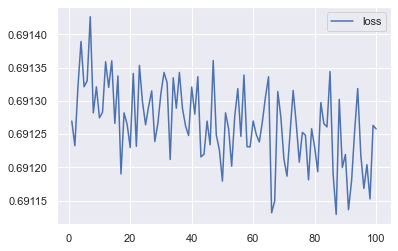

In [31]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

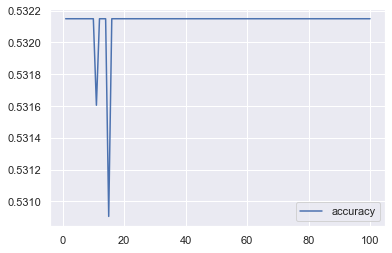

In [32]:
# Plot the Accuracy
history_df.plot(y="accuracy")

In [33]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_tests,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 1.0475 - accuracy: 0.4497 - 464ms/epoch - 2ms/step
Loss: 1.0474921464920044, Accuracy: 0.44967931509017944


In [34]:
# Export our model to HDF5 file
nn.save("./trained_models/ AlphabetSoupCharity.h5")